# Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installs and Imports

In [2]:
!pip install scanpy
!pip install aiofiles
!pip install python-igraph louvain

!pip install gseapy==1.1.6
!pip install pydeseq2
!pip install leidenalg
!pip install fastcluster
!pip install kneed
!pip install conorm
!pip install pytorch_wavelets pywavelets

#!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
#!pip install git+https://github.com/evolutionaryscale/esm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.2 MB/s eta 0:00:

In [3]:
import os
import sys
import gzip
import asyncio
import logging
import requests
from tabulate import tabulate
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import glob
import torch
#from torch_geometric.data import HeteroData
from scipy.sparse import csr_matrix
import json
import anndata as ad
import re
import io
import aiofiles
import aiohttp
import tqdm.asyncio
import asyncio
from collections import Counter, defaultdict
from typing import Dict, List, Optional
from itertools import chain
from concurrent.futures import ThreadPoolExecutor, as_completed
import traceback
import scanpy as sc
from sklearn.feature_extraction.text import CountVectorizer
import h5py
import scipy.sparse as sp
from matplotlib.cm import coolwarm
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from matplotlib.lines import Line2D
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import fisher_exact
import gseapy as gp
import xgboost as xgb

from matplotlib.colors import to_rgba
from sklearn.model_selection import KFold
import tqdm
from tqdm import tqdm
from uuid import uuid4

import ast
import gc
import threading
from threading import Lock

import itertools

import cupy as cp

import shap

import xgboost.callback

from scipy.stats import zscore
from scipy.sparse import csr_matrix, issparse

import torch.nn as nn
import torch.optim as optim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import multiprocessing
from functools import partial
import fcntl
import pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.default_inference import DefaultInference

from scipy import sparse

import textwrap

from matplotlib.gridspec import GridSpec

from sklearn.metrics import adjusted_rand_score
import umap.umap_ as umap

import umap
import scanpy as sc
import igraph as ig
import leidenalg
from sklearn.neighbors import kneighbors_graph
from IPython.display import display

import seaborn as sns
import networkx as nx
from scipy import sparse
import community.community_louvain as community_louvain

import scipy
from seaborn import lineplot
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib.patches import Patch

from sklearn.metrics.pairwise import cosine_similarity

import pickle

from scipy.spatial.distance import cdist

# Data Integration

## Annotations

### KEGG

In [4]:
class KEGGAnnotation:
    def __init__(self, org_code: str):
        self.org_code = org_code
        self.data = {}
        self.integrated = None
        self.genes = pd.DataFrame()
        self.paths = pd.DataFrame()
        self.annotation_types = ["path", "md", "br", "ko", "ACCESSION"]

        self.expected_counts = {}
        self.endpoints = {
            "genes": f"https://rest.kegg.jp/list/{org_code}", # id = KEGG gene ID

            "ACCESSION": f"https://rest.kegg.jp/conv/uniprot/{org_code}",
            "path": f"https://rest.kegg.jp/link/pathway/{org_code}",
            "path_desc": f"https://rest.kegg.jp/list/pathway/{org_code}",
            "md": f"https://rest.kegg.jp/link/module/{org_code}",
            "br": f"https://rest.kegg.jp/link/brite/{org_code}",
            "ko": f"https://rest.kegg.jp/link/orthology/{org_code}",
        }
        logging.info(f"Initialized KEGGAnnotation for organism: {org_code}")


    async def fetch_data(self):
        """Fetch KEGG data asynchronously with rate limiting."""
        logging.info("Starting KEGG data fetch (async)")

        gene_map = {"genes": (5, ["ID", "type", "coordinates", "symbol", "gene_description"])}
        annotation_map = {ann: (2, ["ID", ann]) for ann in self.annotation_types}
        path_desc_map = {"path_desc": (2, ["path_list", "path_desc"])}

        tasks = []
        semaphore = asyncio.Semaphore(3)  # Limit concurrent requests to 3

        async with aiohttp.ClientSession() as session:
            for key, url in self.endpoints.items():
                if key == "genes":
                    tasks.append(self.fetch_endpoint(session, url, gene_map[key], key, semaphore))
                elif key in self.annotation_types:
                    tasks.append(self.fetch_endpoint(session, url, annotation_map[key], key, semaphore))
                elif key == "path_desc":
                    tasks.append(self.fetch_endpoint(session, url, path_desc_map[key], key, semaphore))

            results = []

            progress_bar = tqdm(total=len(tasks), desc="Fetching KEGG data", unit="batch")
            for i in range(0, len(tasks), 3):
                batch = tasks[i:i + 3]  # Get a batch of 3 requests
                results.extend(await asyncio.gather(*batch))
                await asyncio.sleep(1)  # Respect KEGG's rate limit
                progress_bar.update(len(batch))
            progress_bar.close()

        gene_stats = []
        relationship_stats = []

        # Process fetched data
        for key, df in zip(self.endpoints.keys(), results):
            if not df.empty:
                if key == "genes":
                    df.drop(columns=['type', 'coordinates', 'symbol', 'gene_description'], inplace=True, errors="ignore")
                    df.drop_duplicates(subset=["ID"], inplace=True)
                    self.data[key] = df
                    self.genes = set(df["ID"])

                elif key in self.annotation_types:
                    if key == "ACCESSION":
                        df["ACCESSION"] = df[key].str.replace(r"^up:", "", regex=True)
                    if key == "path":
                        self.paths = set(df[key])
                    self.data[key] = df

                elif key == "path_desc":
                    df["path_list"] = "path:" + df["path_list"]
                    self.data[key] = df

                self.collect_stats(key, gene_stats, relationship_stats)

        self.print_stats(gene_stats, relationship_stats)

        self.integrated = self.integrate()
        logging.info("KEGG Integration complete!")
        return self.integrated


    ''' utils'''

    async def fetch_endpoint(self, session, url, expected_columns, name, semaphore):
        """Fetch data asynchronously with retry logic and rate limiting."""
        retries = 5
        async with semaphore:  # Ensures only 3 requests run concurrently
            for attempt in range(retries):
                try:
                    async with session.get(url, timeout=10) as response:
                        if response.status == 200:
                            lines = await response.text()
                            valid_rows = self.parse_lines(lines.strip().splitlines(), expected_columns[0])
                            return pd.DataFrame(valid_rows, columns=expected_columns[1])
                        else:
                            logging.warning(f"Failed to fetch {name}. Status: {response.status}")
                except Exception as e:
                    logging.error(f"Error fetching {name}: {str(e)}")
                    if attempt == retries - 1:
                        return pd.DataFrame(columns=expected_columns[1])
                    await asyncio.sleep(2**attempt)
            return pd.DataFrame(columns=expected_columns[1])

    def parse_lines(self, lines, expected_columns):
        """Parse KEGG API response lines into structured format dynamically."""
        valid_rows = []

        for line in lines:
            fields = line.strip().split("\t")

            # Handle "genes" endpoint specifically
            if expected_columns == 5:  # Gene annotation (ID, type, coordinates, symbol, description)
                if len(fields) < 4:  # Malformed line, skip
                    logging.error(f"Skipping malformed line: {line}")
                    continue

                # Extract gene symbol if present
                gene_description = fields[3] if len(fields) == 4 else fields[4]
                if ";" in gene_description:
                    symbol, description = gene_description.split(";", 1)  # Split symbol from description
                    symbol = symbol.strip()
                    description = description.strip()
                else:
                    symbol = ""
                    description = gene_description.strip()

                # Ensure we always return 5 columns
                if len(fields) == 4:
                    fields.append("")  # Add empty gene description column

                # Store extracted values properly
                fields[3] = symbol  # Replace symbol column
                fields[4] = description  # Store cleaned description

            # Handle endpoints with only 2 columns (ID, value)
            elif expected_columns == 2:
                if len(fields) < 2:
                    logging.error(f"Skipping malformed line for 2-column endpoint: {line}")
                    continue  # Skip malformed lines
                # No modification needed for simple two-column format

            # Handle unexpected cases
            else:
                if len(fields) != expected_columns:
                    logging.warning(f"Unexpected number of columns ({len(fields)}) in line: {line}")
                    continue  # Skip rows with incorrect structure

            valid_rows.append(fields)

        return valid_rows


    ''' integrate '''

    def integrate(self):
        """Integrate all annotations into a single DataFrame."""
        if "genes" not in self.data or self.data["genes"].empty:
            logging.warning("No gene data available.")
            return pd.DataFrame()

        # Base gene dataframe
        base_df = self.data["genes"].copy()

        # Merge UniProt ACCESSION IDs
        if "ACCESSION" in self.data:
            base_df = base_df.merge(self.data["ACCESSION"], on="ID", how="left")

        # Merge pathway mappings and descriptions
        if "path" in self.data and "path_desc" in self.data:
            path_df = self.data["path"].copy()
            path_desc_df = self.data["path_desc"].rename(columns={"path_list": "path"})

            # Merge without losing order
            path_mapping = path_df.merge(path_desc_df, on="path", how="left")

            # Ensure paths stay in order per gene
            path_mapping = path_mapping.sort_values(["ID", "path"])  # Ensuring order
            path_mapping["paired"] = list(zip(path_mapping["path"], path_mapping["path_desc"]))

            # Grouping while preserving order
            path_mapping = path_mapping.groupby("ID")["paired"].apply(list).reset_index()

            # Splitting back into two columns (ensuring order is kept)
            path_mapping["path"] = path_mapping["paired"].apply(lambda x: [i[0] for i in x])
            path_mapping["path_desc"] = path_mapping["paired"].apply(lambda x: [i[1] for i in x])
            path_mapping.drop(columns=["paired"], inplace=True)

            # Merge into base dataframe
            base_df = base_df.merge(path_mapping, on="ID", how="left")

            # Ensure missing values are replaced with empty lists
            base_df["path"] = base_df["path"].apply(lambda x: x if isinstance(x, list) else [])
            base_df["path_desc"] = base_df["path_desc"].apply(lambda x: x if isinstance(x, list) else [])

        # Merge other annotations (KO, modules, Brite, etc.)
        for ann_type in self.annotation_types:
            if ann_type in ["ACCESSION", "path"]:  # Already handled
                continue

            if ann_type in self.data and not self.data[ann_type].empty:
                tmp_df = self.data[ann_type].groupby("ID")[ann_type].agg(list).reset_index()
                base_df = base_df.merge(tmp_df, on="ID", how="left")
                base_df[ann_type] = base_df[ann_type].apply(lambda x: x if isinstance(x, list) else [])

        logging.info(f"Integrated data for {len(base_df)} genes.")
        return base_df


        ''' stats '''

    def collect_stats(self, name, gene_stats, relationship_stats):
        """Collect statistics for genes and relationships"""
        if name not in self.data or self.data[name].empty:
            logging.warning(f"No data found for {name}, skipping statistics.")
            return

        df = self.data[name]
        num_genes = len(self.genes)

        if name == "genes":
            logging.info(f"Total unique KEGG genes: {num_genes}")
            return

        annotation_column = name if name in self.annotation_types else None

        if annotation_column:
            annotated_genes = set(df["ID"])
            num_annotated_genes = len(annotated_genes)
            num_unique_annotations = df[name].nunique()
            num_total_annotations = len(df)
            num_avg_annotations = num_total_annotations / num_annotated_genes if num_annotated_genes > 0 else 0
            num_perc_annotations = (num_annotated_genes / num_genes) if num_genes > 0 else 0

            gene_stats.append([
                name,
                num_annotated_genes,
                num_unique_annotations,
                num_total_annotations,
                round(num_avg_annotations, 2),
                round(num_perc_annotations * 100, 2)
            ])

            logging.info(f"Stats for {name}:")
            logging.info(f"  Genes with {name}: {num_annotated_genes}")
            logging.info(f"  Unique {name}: {num_unique_annotations}")
            logging.info(f"  Total {name} annotations: {num_total_annotations}")
            logging.info(f"  Average {name} per annotated gene: {round(num_avg_annotations, 2)}")
            logging.info(f"  % Completion of {name}: {round(num_perc_annotations * 100, 2)}%")

    def print_stats(self, gene_stats, relationship_stats):
        """Prints gene annotation and relationship statistics"""
        print(f"\nTotal unique KEGG genes: {len(self.genes)}")

        if gene_stats:
            print("\nGene Annotation Statistics:")
            print(tabulate(
                gene_stats,
                headers=[
                    "Annotation", "Num Annotated Genes", "Num Unique Annotations",
                    "Total Annotations", "Avg Annotations / Gene", "% Genes Annotated"
                ],
                tablefmt="grid"
            ))

        if relationship_stats:
            print("\nRelationship Statistics:")
            print(tabulate(
                relationship_stats,
                headers=["Edge Type", "Unique Sources", "Unique Targets", "Total Relationships"],
                tablefmt="grid"
            ))

### Ensembl/GO

In [5]:
class EnsemblAnnotation:
    def __init__(self, cdna_file: str, pep_file: str, go_file: str):
        """Initialize Ensembl annotation manager."""
        self.cdna_file = cdna_file
        self.pep_file = pep_file
        self.go_file = go_file

        # Standardized data storage
        self.data = {}
        self.integrated = None
        self.expected_counts = {}
        self.stats = []

        # GO mappings
        self.go_terms = {}  # Stores GO term metadata (name, definition, domain)
        self.go_domains = {}  # Maps GO Accession → Domain (GO_MF, GO_BP, GO_CC)
        self.go_slim = {}  # Maps GO Accession → GO Slim category

        self.go_accessions = set()  # All unique GO term accessions

        logging.info("Initialized EnsemblAnnotation")

    async def fetch_data(self):
        """Fetch and integrate all Ensembl data."""
        logging.info("Fetching Ensembl data...")

        # Fetch data concurrently
        cdna_data, pep_data, go_data = await asyncio.gather(
            self.load_fasta_gz(self.cdna_file, "cdna"),
            self.load_fasta_gz(self.pep_file, "pep"),
            self.parse_go_csv(self.go_file),
        )

        # Store parsed data
        self.data["cdna"] = cdna_data  # ID (Ensembl), UniProt Accession, nt sequence, gene biotype, gene description
        self.data["pep"] = pep_data  # ID (Ensembl), UniProt Accession, aa sequence, gene biotype, gene description
        self.data["go"] = go_data  # ID (Ensembl), UniProt Accession, GO Accessions, GO Slim, GO Domains

        # Integrate all data into a single DataFrame
        self.integrated = self.integrate()
        self.generate_stats()
        logging.info("Ensembl Integration complete!")
        # rename descripion to gene_description
        self.integrated.rename(columns={"description": "gene_description"}, inplace=True)
        return self.integrated

    async def load_fasta_gz(self, file_path: str, seq_type: str):
        """Load cDNA or peptide sequences from a gzipped FASTA file."""
        results = []

        async with aiofiles.open(file_path, "rb") as f:
            contents = await f.read()
            with gzip.open(io.BytesIO(contents), "rt") as gz:
                current_header = None
                sequence = []
                for line in gz:
                    line = line.strip()
                    if line.startswith(">"):
                        if current_header:
                            results.append(self.parse_entry(current_header, "".join(sequence), seq_type))
                        current_header = line[1:]
                        sequence = []
                    else:
                        sequence.append(line)

                if current_header:
                    results.append(self.parse_entry(current_header, "".join(sequence), seq_type))

        logging.info(f"Loaded {len(results)} entries from {seq_type} file")
        return pd.DataFrame(results)

    def parse_entry(self, header: str, sequence: str, seq_type: str) -> dict:
        """Parse a FASTA header and extract Ensembl metadata."""
        entry = {"sequence": sequence, "type": seq_type}
        parts = header.split()

        # Extract Ensembl gene ID (removes version)
        entry["ID"] = parts[0].split(".")[0]
        entry["ACCESSION"] = None
        entry["description"] = None  # Default to None if missing

        # Regex pattern to extract the full description, stopping at [Source:] or end of line
        description_match = re.search(r"description:(.+?)(?:\s*\[Source:|\s*$)", header)

        for part in parts:
            if part.startswith("gene:"):
                entry["ID"] = part.split(":")[1]
            elif part.startswith("gene_biotype:"):
                entry["gene_biotype"] = part.split(":")[1]
            elif part.startswith("gene_symbol:"):
                entry["symbol"] = part.split(":")[1]
            elif "UniProtKB/TrEMBL" in part:
                match = re.search(r'Acc:([^]]+)', part)
                entry["ACCESSION"] = match.group(1).strip() if match else part.split(":")[-1].strip("]")

        # Extract and clean description
        if description_match:
            description = description_match.group(1).strip()
            # Remove anything inside {} (e.g., "{ECO:0000313|EMBL:ABY63657.1}")
            description = re.sub(r"\{.*?\}", "", description).strip()
            entry["description"] = description

        return entry

    async def parse_go_csv(self, go_file: str):
        """Parse GO annotations from a CSV file, ensuring all domains (BP, MF, CC) are properly structured."""
        async with aiofiles.open(go_file, mode="r") as f:
            content = await f.read()

        df = pd.read_csv(io.StringIO(content))

        if df.empty:
            logging.warning(f"GO file {go_file} is empty. No annotations will be added.")
            return pd.DataFrame()

        # Drop irrelevant columns
        df = df.drop(columns=["GO term evidence code"], errors="ignore")

        # Remove duplicates
        df = df.drop_duplicates(subset=["Gene stable ID", "GO term accession"])

        # Rename columns
        df.rename(columns={
            "Gene stable ID": "ID",
            "UniProtKB/TrEMBL ID": "ACCESSION",
            "GO term name": "GO_name",
            "GO term definition": "GO_definition",
            "GO term accession": "GO_ID",
            "GOSlim GOA Description": "GO_Slim_Description",
            "GOSlim GOA Accession(s)": "GO_Slim_ID",
            "GO domain": "GO_Domain"
        }, inplace=True)

        # Ensure all expected columns exist
        expected_columns = {"ID", "GO_ID", "GO_name", "GO_definition", "GO_Slim_ID", "GO_Slim_Description", "GO_Domain"}
        missing_columns = expected_columns - set(df.columns)
        if missing_columns:
            logging.error(f"Missing columns in GO file: {missing_columns}")
            return pd.DataFrame()

        # Extract unique ACCESSION values (one per gene)
        accession_df = df[["ID", "ACCESSION"]].drop_duplicates(subset=["ID"])

        # Split GO domains separately and rename each aggregated column properly.
        go_bp_df = df[df["GO_Domain"] == "biological_process"].groupby("ID").agg({
            "GO_ID": lambda x: list(x.dropna()),
            "GO_name": lambda x: list(x.dropna()),
            "GO_definition": lambda x: list(x.dropna()),
            "GO_Slim_ID": lambda x: list(x.dropna()),
            "GO_Slim_Description": lambda x: list(x.dropna())
        }).rename(columns={
            "GO_ID": "GO_BP_ID",
            "GO_name": "GO_BP_name",
            "GO_definition": "GO_BP_definition",
            "GO_Slim_ID": "GO_BP_Slim_ID",
            "GO_Slim_Description": "GO_BP_Slim_Description"
        })

        go_mf_df = df[df["GO_Domain"] == "molecular_function"].groupby("ID").agg({
            "GO_ID": lambda x: list(x.dropna()),
            "GO_name": lambda x: list(x.dropna()),
            "GO_definition": lambda x: list(x.dropna()),
            "GO_Slim_ID": lambda x: list(x.dropna()),
            "GO_Slim_Description": lambda x: list(x.dropna())
        }).rename(columns={
            "GO_ID": "GO_MF_ID",
            "GO_name": "GO_MF_name",
            "GO_definition": "GO_MF_definition",
            "GO_Slim_ID": "GO_MF_Slim_ID",
            "GO_Slim_Description": "GO_MF_Slim_Description"
        })

        go_cc_df = df[df["GO_Domain"] == "cellular_component"].groupby("ID").agg({
            "GO_ID": lambda x: list(x.dropna()),
            "GO_name": lambda x: list(x.dropna()),
            "GO_definition": lambda x: list(x.dropna()),
            "GO_Slim_ID": lambda x: list(x.dropna()),
            "GO_Slim_Description": lambda x: list(x.dropna())
        }).rename(columns={
            "GO_ID": "GO_CC_ID",
            "GO_name": "GO_CC_name",
            "GO_definition": "GO_CC_definition",
            "GO_Slim_ID": "GO_CC_Slim_ID",
            "GO_Slim_Description": "GO_CC_Slim_Description"
        })

        # Merge all GO domain data into a single DataFrame
        go_grouped = pd.merge(go_bp_df, go_mf_df, on="ID", how="outer")
        go_grouped = pd.merge(go_grouped, go_cc_df, on="ID", how="outer")

        # Merge back ACCESSION values
        go_grouped = pd.merge(go_grouped, accession_df, on="ID", how="left")

        # Concatenate the GO_ID lists across domains
        def safe_concat_lists(row):
            return (
                (row["GO_BP_ID"] if isinstance(row["GO_BP_ID"], list) else []) +
                (row["GO_MF_ID"] if isinstance(row["GO_MF_ID"], list) else []) +
                (row["GO_CC_ID"] if isinstance(row["GO_CC_ID"], list) else [])
            )
        go_grouped["GO_ID"] = go_grouped.apply(safe_concat_lists, axis=1)

        # Track unique GO accessions
        self.go_accessions.update(set(df["GO_ID"].dropna().explode()))

        logging.info(f"Parsed {len(go_grouped)} gene GO annotations successfully.")

        return go_grouped

    def integrate(self):
        """Integrate cDNA, Peptide, and GO data into a structured DataFrame."""
        if not self.data:
            logging.warning("No data available for integration.")
            return pd.DataFrame()

        # Drop unnecessary columns
        self.data["pep"] = self.data["pep"].drop(columns=["ACCESSION", "type", "gene_biotype", "description", "symbol"])
        self.data["cdna"] = self.data["cdna"].drop(columns=["type"])
        self.data["go"] = self.data["go"].drop(columns=["ACCESSION"])

        self.data["cdna"] = self.data["cdna"].rename(columns={"sequence": "nt_seq"})
        self.data["pep"] = self.data["pep"].rename(columns={"sequence": "aa_seq"})

        # Merge data
        merged_df = pd.merge(
            self.data["cdna"],
            self.data["pep"],
            on="ID",
            how="outer"
        )
        merged_df = pd.merge(
            merged_df,
            self.data["go"],
            on="ID",
            how="outer"
        )

        logging.info(f"Integrated {len(merged_df)} genes with separate BP, MF, CC annotations.")
        return merged_df

    def generate_stats(self):
        """Generate extensive statistics on annotation completeness, relationships, and hierarchy depth."""
        df = self.integrated

        if df is None or df.empty:
            logging.warning("Warning: Integrated DataFrame is empty. Cannot generate stats.")
            return

        total_genes = len(df)

        # Count genes with any GO annotation using the unified GO_ID column.
        if "GO_ID" not in df.columns:
            logging.warning("Warning: 'GO_ID' column is missing in the integrated DataFrame.")
            genes_with_go = 0
        else:
            # Count a gene as annotated if GO_ID is a non-empty list/array or non-empty string.
            genes_with_go = df["GO_ID"].apply(
                lambda x: 1 if (
                    (isinstance(x, list) and len(x) > 0) or
                    (isinstance(x, np.ndarray) and x.size > 0) or
                    (isinstance(x, str) and x.strip() not in ("", "[]"))
                ) else 0
            ).sum()

        # Helper function to check if a value has at least one annotation.
        def has_annotation(x):
            if isinstance(x, np.ndarray):
                # Convert array to list and check each element.
                return any(has_annotation(item) for item in x.tolist())
            try:
                if pd.isna(x):
                    return False
            except Exception:
                pass
            if isinstance(x, list):
                return any(has_annotation(item) for item in x)
            if isinstance(x, str):
                return x.strip() not in ("", "[]")
            return False

        # Count genes with at least one annotation for each GO domain separately.
        domain_counts = {}
        for domain in ["BP", "MF", "CC"]:
            col_name = f"GO_{domain}_ID"
            if col_name in df.columns:
                count = df[col_name].apply(lambda x: 1 if has_annotation(x) else 0).sum()
            else:
                logging.warning(f"Warning: '{col_name}' column is missing in the integrated DataFrame.")
                count = 0
            domain_counts[domain] = count

        # Count how many genes have cDNA and peptide sequences.
        genes_with_cdna = df["nt_seq"].notna().sum() if "nt_seq" in df.columns else 0
        genes_with_peptide = df["aa_seq"].notna().sum() if "aa_seq" in df.columns else 0

        # Prepare overall statistics as a list of metric-value pairs.
        stats = [
            ["Total Genes", total_genes],
            ["Genes with cDNA", genes_with_cdna],
            ["Genes with Peptide", genes_with_peptide],
            ["Genes with any GO Annotation", genes_with_go],
            ["Genes with Biological Process", domain_counts.get("GO_BP_ID", 0)],
            ["Genes with Molecular Function", domain_counts.get("GO_MF_ID", 0)],
            ["Genes with Cellular Component", domain_counts.get("GO_CC_ID", 0)],
        ]

        # Count genes without any GO annotation.
        num_genes_without_go = df["GO_ID"].apply(lambda x: 0 if has_annotation(x) else 1).sum()
        logging.info(f"Genes without any GO annotation: {num_genes_without_go}")

        # Also log genes missing domain-specific annotations.
        genes_without_BP = total_genes - domain_counts.get("GO_BP_ID", 0)
        genes_without_MF = total_genes - domain_counts.get("GO_MF_ID", 0)
        genes_without_CC = total_genes - domain_counts.get("GO_CC_ID", 0)
        logging.info(f"Genes without Biological Process annotation: {genes_without_BP}")
        logging.info(f"Genes without Molecular Function annotation: {genes_without_MF}")
        logging.info(f"Genes without Cellular Component annotation: {genes_without_CC}")

        logging.info("\nGeneral Annotation Statistics:")
        logging.info(tabulate(stats, headers=["Metric", "Value"], tablefmt="grid"))

        return stats, domain_counts

### AnnotationIntegrator

In [6]:
class AnnotationIntegrator:
    def __init__(self, org_code: str, cdna_file: str, pep_file: str, go_file: str):
        self.org_code = org_code
        self.kegg = KEGGAnnotation(org_code)
        self.ensembl = EnsemblAnnotation(cdna_file, pep_file, go_file)

        self.integrated_df = pd.DataFrame()
        self.ref_var_index_df = pd.DataFrame()
        self.var_df = pd.DataFrame()
        self.varm_path_df = pd.DataFrame()
        self.varm_GO_ID_df = pd.DataFrame()

        # Define column groups
        self.var_fields = ['ID_ENSEMBL', 'gene_description', 'symbol', 'ACCESSION', 'nt_seq', 'aa_seq']  # all strings
        self.varm_path_fields = ['path', 'path_desc']  # list fields
        self.varm_GO_ID_fields = [
            'GO_BP_ID', 'GO_BP_name', 'GO_BP_definition', 'GO_BP_Slim_ID', 'GO_BP_Slim_Description',
            'GO_MF_ID', 'GO_MF_name', 'GO_MF_definition', 'GO_MF_Slim_ID', 'GO_MF_Slim_Description',
            'GO_CC_ID', 'GO_CC_name', 'GO_CC_definition', 'GO_CC_Slim_ID', 'GO_CC_Slim_Description'
        ]  # Separate BP, MF, CC fields

    async def run(self):
        """Main pipeline execution"""

        kegg_df = await self.kegg.fetch_data()
        ensembl_df = await self.ensembl.fetch_data()

        logging.info(f"KEGG data shape: {kegg_df.shape}")
        logging.info(f"KEGG data columns: {kegg_df.columns}")
        logging.info(f"Ensembl data shape: {ensembl_df.shape}")
        logging.info(f"Ensembl data columns: {ensembl_df.columns}")

        self.assign_unique_accessions(kegg_df, ensembl_df)

        self.integrated_df = pd.merge(kegg_df, ensembl_df, on="ACCESSION", how="outer", suffixes=("_KEGG", "_ENSEMBL"))
        self.integrated_df = self.integrated_df.drop_duplicates(subset="ACCESSION")

        self.var_df, self.varm_path_df, self.varm_GO_ID_df = self.prepare_annotations(self.integrated_df.copy())

        logging.info(f"Integrated data shape: {self.integrated_df.shape}")
        logging.info(f"Integrated data columns: {self.integrated_df.columns}")

        self.validate()
        return self.integrated_df, self.var_df, self.varm_path_df, self.varm_GO_ID_df

    def prepare_annotations(self, integrated_df):

        logging.info("Starting annotation preprocessing...")

        # Drop rows where ID_ENSEMBL is NaN or empty
        integrated_df = integrated_df.dropna(subset=['ID_ENSEMBL'])
        integrated_df = integrated_df[integrated_df['ID_ENSEMBL'] != '']

        # Remove duplicate ID_ENSEMBL entries, keeping first occurrence
        integrated_df['ID_ENSEMBL'] = integrated_df['ID_ENSEMBL'].astype(str).str.strip()
        integrated_df = integrated_df.drop_duplicates(subset=['ID_ENSEMBL'], keep='first')

        # Extract and set the cleaned index
        integrated_df = integrated_df.set_index('ID_ENSEMBL')
        ref_var_index = integrated_df.index
        integrated_df = integrated_df.reset_index()

        # Helper function to clean up list fields
        def convert_to_list(x):
            if isinstance(x, list):
                return x
            if isinstance(x, str) and (x.startswith("[") and x.endswith("]")):
                try:
                    return ast.literal_eval(x)
                except Exception:
                    return []
            return []

        # fill na with ''
        var_df = integrated_df[self.var_fields].fillna('').set_index('ID_ENSEMBL').reindex(ref_var_index)

        varm_path_df = integrated_df.set_index('ID_ENSEMBL')[self.varm_path_fields].map(convert_to_list).reindex(ref_var_index)
        varm_GO_ID_df = integrated_df.set_index('ID_ENSEMBL')[self.varm_GO_ID_fields].map(convert_to_list).reindex(ref_var_index)

        logging.info("Annotation preprocessing complete. DataFrames are indexed and cleaned.")
        return var_df, varm_path_df, varm_GO_ID_df

    def assign_unique_accessions(self, kegg_df, ensembl_df):

        kegg_nan_mask = kegg_df["ACCESSION"].isna()
        ensembl_nan_mask = ensembl_df["ACCESSION"].isna()

        total_missing = kegg_nan_mask.sum() + ensembl_nan_mask.sum()
        unique_ids = [f"TAP{str(i).zfill(6)}" for i in range(total_missing)]

        kegg_df.loc[kegg_nan_mask, "ACCESSION"] = unique_ids[:kegg_nan_mask.sum()]
        ensembl_df.loc[ensembl_nan_mask, "ACCESSION"] = unique_ids[kegg_nan_mask.sum():]


    # validation
    def validate(self):
        """Validate the structure and completeness of merged data."""

        if self.integrated_df is None or self.integrated_df.empty:
            raise ValueError("Merged annotation data is empty.")

        stats = {
            "gene_stats": {},
            "annotation_stats": {},
            "warnings": [],
        }

        # Gene-Level Stats
        stats["gene_stats"] = {
            "num_genes": len(self.integrated_df),
            "num_unique_accessions": self.integrated_df["ACCESSION"].nunique(),
            "num_genes_with_kegg": self.integrated_df["ID_KEGG"].notna().sum(),
            "num_genes_with_ensembl": self.integrated_df["ID_ENSEMBL"].notna().sum(),
        }

        # Annotation Coverage Stats
        for domain in ["BP", "MF", "CC"]:
            go_id_field = f"GO_{domain}_ID"
            if go_id_field in self.integrated_df:
                valid_entries = self.integrated_df[go_id_field].dropna().apply(lambda x: x if isinstance(x, list) else [])
                total_annotations = sum(len(x) for x in valid_entries)
                unique_annotations = valid_entries.explode().nunique()

                completeness = round((unique_annotations / max(1, unique_annotations)) * 100, 2)
                stats["annotation_stats"][f"{go_id_field}_completeness"] = completeness

                if completeness < 80:
                    stats["warnings"].append(f"Low completeness for '{go_id_field}': {completeness:.1f}%.")

        # Print Validation Summary
        logging.info("\n Validation Summary:")
        logging.info(tabulate(stats["gene_stats"].items(), headers=["Metric", "Value"], tablefmt="grid"))
        logging.info(tabulate(stats["annotation_stats"].items(), headers=["Annotation Type", "Details"], tablefmt="grid"))

        if stats["warnings"]:
            logging.warning("\n Warnings Detected:")
            for warning in stats["warnings"]:
                logging.warning(f" - {warning}")

        return stats

## H5Manager

In [7]:
class H5Manager:
    """Manages all HDF5 operations efficiently and safely."""

    def __init__(self, exp_path, h5_path, batch_size, chunk_size, adata_path, annotation_type, var_df=None, varm_path_df=None, varm_GO_ID_df=None):

        self.h5_file = h5_path
        self.chunk_size = chunk_size
        self.batch_size = batch_size
        self.annotation_type = annotation_type
        self.adata_path = adata_path
        self.h5_lock = threading.Lock()

        try:
            if var_df is None:
                raise ValueError("No var_df provided.")
            self.var_df = var_df.set_index('ID_ENSEMBL')

            self.varm_path_df = varm_path_df.set_index('ID_ENSEMBL')
            self.varm_GO_ID_df = varm_GO_ID_df.set_index('ID_ENSEMBL')

            self.GO_MAPPING = {
                "GO_BP_ID": self.varm_GO_ID_df[['GO_BP_ID', 'GO_BP_name', 'GO_BP_definition', 'GO_BP_Slim_ID', 'GO_BP_Slim_Description']],

                "GO_MF_ID": self.varm_GO_ID_df[['GO_MF_ID', 'GO_MF_name', 'GO_MF_definition', 'GO_MF_Slim_ID', 'GO_MF_Slim_Description']],

                "GO_CC_ID": self.varm_GO_ID_df[['GO_CC_ID', 'GO_CC_name', 'GO_CC_definition', 'GO_CC_Slim_ID', 'GO_CC_Slim_Description']]
            }

            if self.annotation_type == "path":
                self.varm_annotation_df = self.varm_path_df
            elif self.annotation_type in self.GO_MAPPING:
                self.varm_annotation_df = self.GO_MAPPING[self.annotation_type]
            else:
                raise ValueError(f"Unsupported annotation type: {self.annotation_type}")

        except Exception as e:
            logging.error(f"Error processing annotations: {e}")
            raise e

        self.condition_map = {}
        self.process_experimental_data(exp_path)

    def initialize_h5(self, gene_ids):
        """Creates an HDF5 file and initializes all necessary datasets,storing uns metadata in HDF5 groups/datasets."""
        logging.info("Starting HDF5 initialization...")

        gene_ids = [str(g).strip() for g in gene_ids]
        num_genes = len(gene_ids)
        logging.info(f"Processing {num_genes} gene IDs for HDF5 storage.")

        def clean_list(x):
            """Ensures a proper list format, removing NaN and empty values."""
            if isinstance(x, list):
                return [y for y in x if str(y).lower() != "nan" and y]
            if isinstance(x, str) and x.startswith("[") and x.endswith("]"):
                try:
                    parsed = ast.literal_eval(x)
                    return [y for y in parsed if str(y).lower() != "nan" and y] if isinstance(parsed, list) else []
                except Exception:
                    return []
            return []

        var_meta = self.var_df.reindex(gene_ids).fillna("")
        varm_annotation = self.varm_annotation_df.reindex(gene_ids).map(clean_list)

        with h5py.File(self.h5_file, "w", libver='latest') as h5f:
            logging.info(f"Creating datasets in HDF5 file: {self.h5_file}")

            var_dtype = np.dtype([
                ('ID_ENSEMBL', h5py.string_dtype()),
                ('gene_description', h5py.string_dtype()),
                ('symbol', h5py.string_dtype()),
                ("ACCESSION", h5py.string_dtype()),
                ("nt_seq", h5py.string_dtype()),
                ("aa_seq", h5py.string_dtype()),
            ])
            var_data = np.array(var_meta.to_records(index=True), dtype=var_dtype)

            h5f.create_dataset("X", shape=(0, num_genes), maxshape=(None, num_genes), dtype=np.float32, compression="gzip")

            obs_dtype = np.dtype([
                ("replicate_ID", h5py.string_dtype()),
                ("condition", h5py.string_dtype()),
                ("condition_ID", np.int32),
            ])
            h5f.create_dataset("obs", shape=(0,), maxshape=(None,), dtype=obs_dtype, compression="gzip")

            var_ds = h5f.create_dataset("var", data=var_data, compression="gzip")
            var_ds.attrs["index"] = "ID_ENSEMBL"
            h5f["obs"].attrs["index"] = "replicate_ID"

            logging.info(f"Initialized HDF5 structure with keys: {list(h5f.keys())}")

            # Create groups for embeddings and uns metadata
            varm_grp = h5f.require_group("varm")
            varm_annotation_grp = varm_grp.require_group(self.annotation_type)

            # Generate BoW Representation
            def generate_bow(varm_df, field_name, varm_subgrp):
                """Generates and stores a BoW representation for a given field in varm."""
                # Explode list values into separate rows before vectorization
                exploded_varm = varm_df.explode(field_name)

                # Ensure valid string format and remove NaN/empty values
                exploded_varm[field_name] = exploded_varm[field_name].astype(str).str.strip()
                exploded_varm = exploded_varm[
                    exploded_varm[field_name].notna() &
                    (exploded_varm[field_name] != "nan") &
                    (exploded_varm[field_name] != "")
                ]

                # Create vocabulary (excluding NaNs and empty values)
                vocab = sorted(set(exploded_varm[field_name].dropna().unique().tolist()))

                if not vocab:
                    logging.warning(f"No valid vocabulary found for {field_name}. Skipping BoW generation.")
                    return

                def custom_tokenizer(text):
                    """Tokenizes text into list format for BoW."""
                    if isinstance(text, list):
                        return text  # If already a list, return as is
                    elif isinstance(text, str):
                        try:
                            parsed_list = ast.literal_eval(text)  # Convert stringified list to real list
                            return parsed_list if isinstance(parsed_list, list) else []
                        except:
                            return text.split()  # Default
                    return []

                # Create the CountVectorizer.
                vectorizer = CountVectorizer(
                    tokenizer=custom_tokenizer,
                    token_pattern=None,
                    vocabulary=vocab,
                    lowercase=False if field_name.startswith("GO")  else True
                )

                # Ensure input is a properly formatted
                bow_input = varm_df[field_name].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

                bow_matrix = vectorizer.transform(bow_input.fillna(""))
                logging.info(f" BoW Matrix shape for {field_name}: {bow_matrix.shape}, Sum: {bow_matrix.sum()}")

                varm_subgrp.create_dataset("bow", data=bow_matrix.toarray(), dtype=np.int32, compression="gzip")

            generate_bow(varm_annotation, self.annotation_type, varm_annotation_grp)

            uns_grp = h5f.require_group("uns")
            uns_annotation_grp = uns_grp.require_group(self.annotation_type)

            # Uns
            if self.annotation_type.startswith("GO_"):
                # get second str between _ _ in self.annotation_type
                type_id = self.annotation_type.split("_")[1]
                varm_annotation_filtered = varm_annotation[
                    (varm_annotation[self.annotation_type].astype(str) != "[]") &
                    (varm_annotation[f"GO_{type_id}_name"].astype(str) != "[]") &
                    (varm_annotation[f"GO_{type_id}_Slim_ID"].astype(str) != "[]")&
                    (varm_annotation[f"GO_{type_id}_Slim_Description"].astype(str) != "[]")
                ]
                unique_terms = varm_annotation_filtered.explode([self.annotation_type, f"GO_{type_id}_name", f"GO_{type_id}_Slim_ID", f"GO_{type_id}_Slim_Description"]).dropna()
                gene_sets_annotation = unique_terms.groupby(
                    self.annotation_type, group_keys=False
                ).apply(lambda df: list(df.index), include_groups=False).to_dict()

                meta_mappings = {
                    f"GO_{type_id}_name": unique_terms.set_index(self.annotation_type)[f"GO_{type_id}_name"].to_dict(),
                    f"GO_{type_id}_Slim_ID": unique_terms.set_index(self.annotation_type)[f"GO_{type_id}_Slim_ID"].to_dict(),
                    f"GO_{type_id}_Slim_Description": unique_terms.set_index(self.annotation_type)[f"GO_{type_id}_Slim_Description"].to_dict(),
                }
                for field, mapping in meta_mappings.items():
                    if mapping:
                        uns_annotation_grp.create_dataset(
                              field,
                              data=np.array([json.dumps(mapping)], dtype=h5py.string_dtype()),
                              compression="gzip"
                        )
                if gene_sets_annotation:
                   uns_annotation_grp.create_dataset(
                        "gene_sets",
                        data=np.array([json.dumps(gene_sets_annotation)], dtype=h5py.string_dtype()),
                        compression="gzip"
                    )
                else:
                    logging.warning(" No GO term gene sets found. Storing empty dictionary.")
                    uns_annotation_grp.create_dataset(
                        "gene_sets",
                        data=np.array([json.dumps({})], dtype=h5py.string_dtype()),
                        compression="gzip"
                    )

            elif self.annotation_type == "path":
                varm_path_filtered = varm_annotation[
                    (varm_annotation["path"].astype(str) != "[]") & (varm_annotation["path_desc"].astype(str) != "[]")
                ]

                # Explode `path` and `path_desc` together to maintain one-to-one mapping
                unique_pathways = varm_path_filtered.explode(["path", "path_desc"]).dropna()

                gene_sets_path = unique_pathways.groupby("path", group_keys=False).apply(lambda df: list(df.index), include_groups=False).to_dict()

                # Store ordered pathway metadata
                path_vocab = unique_pathways["path"].drop_duplicates().sort_values().tolist()

                # Store pathway descriptions mapped one-to-one
                path_desc_mapping = unique_pathways.set_index("path")["path_desc"].to_dict()
                if path_desc_mapping:
                    uns_annotation_grp.create_dataset(
                        "descriptions",
                        data=np.array([json.dumps(path_desc_mapping)], dtype=h5py.string_dtype()),
                        compression="gzip"
                    )

                # Store ordered gene sets by pathways
                if gene_sets_path:
                    uns_annotation_grp.create_dataset(
                        "gene_sets",
                        data=np.array([json.dumps(gene_sets_path)], dtype=h5py.string_dtype()),
                        compression="gzip"
                    )
                else:
                    logging.warning(" No pathway gene sets found. Storing empty dictionary.")
                    uns_annotation_grp.create_dataset(
                        "gene_sets",
                        data=np.array([json.dumps({})], dtype=h5py.string_dtype()),
                        compression="gzip"
                    )

            # Set file-level attribute
            h5f.attrs["annotation_type"] = self.annotation_type
            # Final Logging for Confirmation
            logging.info("HDF5 file initialization completed successfully.")

            # Log top-level dataset and group structures
            logging.info(f"HDF5 file contains: {list(h5f.keys())}")
            logging.info(f"Var dataset shape: {h5f['var'].shape}")
            logging.info(f"Obs dataset shape: {h5f['obs'].shape}")
            logging.info(f"Varm keys: {list(h5f['varm'].keys()) if 'varm' in h5f else 'No varm data'}")
            logging.info(f"Uns keys: {list(h5f['uns'].keys()) if 'uns' in h5f else 'No uns data'}")

            # Log annotation-specific dataset details
            if self.annotation_type in h5f["varm"]:
                varm_group = h5f["varm"][self.annotation_type]
                logging.info(f"Varm annotation group '{self.annotation_type}' contains: {list(varm_group.keys())}")

                if "bow" in varm_group:
                    logging.info(f"BoW Matrix shape for '{self.annotation_type}': {varm_group['bow'].shape}")

            if self.annotation_type in h5f["uns"]:
                uns_group = h5f["uns"][self.annotation_type]
                logging.info(f"Uns annotation group '{self.annotation_type}' contains: {list(uns_group.keys())}")

                if "gene_sets" in uns_group:
                    gene_sets_data = uns_group["gene_sets"][:]
                    num_gene_sets = len(json.loads(gene_sets_data[0].decode())) if gene_sets_data else 0
                    logging.info(f"Number of gene sets in '{self.annotation_type}': {num_gene_sets}")

            logging.info("Final HDF5 structure verification completed successfully.")


    def process_experimental_data(self, data_folder):
        """Processes raw experimental data and writes directly to HDF5 in parallel."""
        logging.info(f"Starting experimental data processing for folder: {data_folder}")

        tsv_files = glob.glob(f"{data_folder}/*.tsv")

        if not tsv_files:
            logging.error("No TSV files found.")
            logging.error(traceback.format_exc())
            return

        logging.info(f"Found {len(tsv_files)} TSV files. Processing in batches of {self.batch_size}...")
        tsv_sample = pd.read_csv(tsv_files[0], sep="\t", index_col=0)
        # Ensure the gene ids from the experimental data are strings and stripped.
        tsv_sample.index = tsv_sample.index.astype(str).str.strip()

        self.initialize_h5(tsv_sample.index)

        file_batches = itertools.zip_longest(*[iter(tsv_files)] * self.batch_size, fillvalue=None)

        # Process files concurrently.
        with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
            with tqdm(total=len(tsv_files), desc="Processing Files") as pbar:
                futures = {
                    executor.submit(self.process_and_append_file, file): file
                    for batch in file_batches
                    for file in batch if file is not None
                }

                for future in as_completed(futures):
                    file = futures[future]
                    try:
                        future.result()
                    except Exception as e:
                        logging.error(f"Error processing {file}: {e}")
                        logging.error(traceback.format_exc())
                    pbar.update(1)

        logging.info("Experimental data successfully processed")

    def process_and_append_file(self, file: str):
        """Reads a TSV file, processes the data, and appends it to the HDF5 file."""
        try:
            df = pd.read_csv(file, sep="\t", index_col=0).T
            raw_counts_df = df.copy()

            condition = os.path.basename(file).replace(".tsv", "")

            if condition not in self.condition_map:
                self.condition_map[condition] = len(self.condition_map)

            condition_id = self.condition_map[condition]

            obs = pd.DataFrame({
                "replicate_ID": df.index,
                "condition": condition,
                "condition_ID": condition_id,
            }, index=df.index)

            with self.h5_lock, h5py.File(self.h5_file, "a", libver='latest') as h5f:
                dataset_X = h5f["X"]
                dataset_obs = h5f["obs"]

                current_size_X = dataset_X.shape[0]
                new_size_X = current_size_X + raw_counts_df.shape[0]
                dataset_X.resize((new_size_X, dataset_X.shape[1]))
                dataset_X[current_size_X:new_size_X, :] = raw_counts_df.values

                current_size_obs = dataset_obs.shape[0]
                new_size_obs = current_size_obs + obs.shape[0]
                dataset_obs.resize((new_size_obs,))
                dataset_obs[current_size_obs:new_size_obs] = obs.to_records(index=False)

        except Exception as e:
            logging.error(f"Error processing file {file}: {e}")
            logging.error(traceback.format_exc())

    def load_expression_matrix(self):
        """Loads expression data in chunks."""
        with h5py.File(self.h5_file, "r",libver="latest") as h5f:
            dataset = h5f["X"]
            for i in range(0, dataset.shape[0], self.chunk_size):
                yield dataset[i : i + self.chunk_size]

    def load_h5_to_anndata(self):
        """Loads HDF5 data."""
        logging.info(f"Loading HDF5 file: {self.h5_file}")

        with h5py.File(self.h5_file, "r") as h5f:
            # Load Expression Data (Streaming in Chunks)
            X_chunks = [chunk for chunk in self.load_expression_matrix()]
            X = np.vstack(X_chunks) if X_chunks else np.array([])

            # Load Sample Metadata
            obs = pd.DataFrame(h5f["obs"][:])
            obs.index = obs["replicate_ID"].astype(str)  # Ensure string index
            obs.drop(columns=["replicate_ID"], inplace=True)

            if "condition" in obs.columns:
                obs["condition"] = obs["condition"].apply(lambda x: x.decode() if isinstance(x, bytes) else str(x))

            # Load `var` Dataset (Gene Metadata)
            try:
                var_data = h5f["var"][:]
                if isinstance(var_data, np.ndarray) and var_data.dtype.names:
                    var = pd.DataFrame.from_records(var_data)
                else:
                    raise ValueError("Unexpected format: 'var' dataset is not structured correctly")

                # Convert byte strings
                for col in var.select_dtypes(include=[object]):
                    var[col] = var[col].apply(lambda x: x.decode() if isinstance(x, bytes) else x)

                # Set index to `ID_ENSEMBL` for correct gene mapping
                if "ID_ENSEMBL" in var.columns:
                    var.index = var["ID_ENSEMBL"].astype(str)
                    var.drop(columns=["ID_ENSEMBL"], inplace=True)

            except Exception as e:
                logging.error(f"Error loading 'var': {str(e)}")
                return None

            # Ensure all metadata is correctly nested inside `uns`
            uns = {self.annotation_type: {}}

            # Pathway-specific handling
            if self.annotation_type == "path":
                path_group = h5f["uns"].get("path", {})
                uns["path"]["descriptions"] = json.loads(path_group.get("descriptions", ["{}"])[0].decode())
                gene_sets_data = path_group.get("gene_sets", ["{}"])
                uns["path"]["gene_sets"] = json.loads(gene_sets_data[0].decode()) if gene_sets_data else {}

            else:
                go_group = h5f["uns"].get(self.annotation_type, {})
                gene_sets_data = go_group.get("gene_sets", ["{}"])
                uns[self.annotation_type]["gene_sets"] = json.loads(gene_sets_data[0].decode()) if gene_sets_data else {}

                # Get GO Metadata Fields
                type_id = self.annotation_type.split("_")[1]
                go_fields = [
                    f"GO_{type_id}_name",
                    f"GO_{type_id}_definition",
                    f"GO_{type_id}_Slim_ID",
                    f"GO_{type_id}_Slim_Description"
                ]
                for field in go_fields:
                    field_data = go_group.get(field, ["{}"])[0]
                    if isinstance(field_data, bytes):
                        field_data = field_data.decode()
                    uns[self.annotation_type][field] = json.loads(field_data)

            # Load BoW Features (`varm`)
            varm = {}

            if "varm" in h5f and self.annotation_type in h5f["varm"]:
                varm_group = h5f["varm"][self.annotation_type]
                if 'bow' in varm_group:
                    bow_matrix = varm_group['bow'][:]
                    bow_matrix = csr_matrix(bow_matrix)
                    varm[self.annotation_type] = bow_matrix
                else:
                    logging.info("Warning: 'bow' not found in varm group")
            else:
                logging.info("Warning: Annotation type not found in HDF5 file.")

            adata = ad.AnnData(X=X, obs=obs, var=var, uns=uns, varm=varm)

            adata.X = adata.X.astype(int)
            adata.obs["condition"] = adata.obs["condition"].astype("category")
            adata.write_h5ad(self.adata_path)

            logging.info(f"Successfully loaded AnnData: {adata.shape[0]} samples, {adata.shape[1]} genes")
            return adata

## DataHandler

In [8]:
class DataHandler:
    def __init__(self, adata, annotation_type, intermediate_metabolites_gene_sets, custom_sets, adata_path):
        self.adata = adata
        self.adata_path = adata_path
        self.annotation_type = annotation_type
        self.type_ID = annotation_type.split("_")[1] if "_" in annotation_type else None
        self.intermediate_metabolites_gene_sets = intermediate_metabolites_gene_sets
        self.custom_sets = custom_sets

        # Filter Genes
        self.min_count_threshold = 100
        self.min_samples_threshold = 10

        # Filter Samples
        self.min_library_size = 0 # has issues rn, keep 0
        self.min_expressed_genes = 0 # has issues rn, keep 0
        self.batch_size_threshold = 2

        # TMM of Raw
        self.log_ratio_trim = 0.3
        self.sum_trim = 0.05

        # GSVA classification
        self.min_effect_size = 0.3

        # PyDESeq2
        self.n_genes = 500

        # GSVA / PyDESeq2
        self.pvalue_threshold = .05
        self.cor_thresh = 0.3
        self.louvain_resolution = 1.5

        # UMAP Visualization
        self.umap_n_neighbors = 12
        self.umap_min_dist = .15
        self.umap_spread = 1.0

        # GSEA
        self.coverage_threshold=0.7 # work in progress

        # Log parameters
        logging.info("=" * 80)
        logging.info("DataHandler Initialization with Parameters:")
        logging.info("-" * 80)

        # Dataset information
        logging.info(f"Dataset Path: {self.adata_path}")
        logging.info(f"Annotation Type: {self.annotation_type}")
        logging.info(f"Data Shape: {self.adata.shape[0]} samples × {self.adata.shape[1]} genes")

        # Gene sets information
        logging.info(f"Gene Sets: {len(self.intermediate_metabolites_gene_sets)}")
        for i, gs in enumerate(self.intermediate_metabolites_gene_sets, 1):
            logging.info(f"  {i}. {gs}")

        logging.info(f"Custom Sets: {len(self.custom_sets)} gene sets with {sum(len(genes) for genes in self.custom_sets.values())} total genes")
        for gene_set, genes in self.custom_sets.items():
            logging.info(f"  • {gene_set}: {len(genes)} genes")

        logging.info("-" * 80)
        logging.info("Filtering Parameters:")
        logging.info(f"  Gene Min Count: {self.min_count_threshold} (min reads for gene to be considered expressed)")
        logging.info(f"  Gene Min Samples: {self.min_samples_threshold} (min samples where gene must be expressed)")
        logging.info(f"  Sample Min Library Size: {self.min_library_size} (min total counts per sample)")
        logging.info(f"  Sample Min Expressed Genes: {self.min_expressed_genes} (min detected genes per sample)")

        logging.info("-" * 80)
        logging.info("Normalization Parameters:")
        logging.info(f"  TMM Log Ratio Trim: {self.log_ratio_trim} (proportion of extreme log FCs to trim)")
        logging.info(f"  TMM Sum Trim: {self.sum_trim} (proportion of extreme expression values to trim)")

        logging.info("-" * 80)
        logging.info("Analysis Parameters:")
        logging.info(f"  GSVA Min Effect Size: {self.min_effect_size} (Cohen's d threshold for biological relevance)")
        logging.info(f"  DESeq2 Top Genes: {self.n_genes} (number of top DEGs for clustering)")
        logging.info(f"  P-value Threshold: {self.pvalue_threshold} (statistical significance cutoff)")
        logging.info(f"  Correlation Threshold: {self.cor_thresh} (threshold for network edges)")
        logging.info(f"  Louvain Resolution: {self.louvain_resolution} (community detection granularity)")

        logging.info("-" * 80)
        logging.info("Visualization Parameters:")
        logging.info(f"  UMAP Neighbors: {self.umap_n_neighbors} (balance between local and global structure)")
        logging.info(f"  UMAP Min Distance: {self.umap_min_dist} (controls point packing density)")
        logging.info("=" * 80)

        self.filter_genes()
        self.filter_samples()
        self.preprocess()
        self.filter_samples_pre_gsva()
        self.run_gsva()
        self.run_deseq2()
        self.process_data()

    def filter_genes(self):

        logging.info("Performing data-driven gene filtering...")
        init_count = self.adata.n_vars

        # Drop duplicated variable names.
        self.adata.var_names_make_unique()
        self.adata = self.adata[:, ~self.adata.var_names.duplicated()].copy()

        # Filter genes with missing nt_seq
        if 'nt_seq' in self.adata.var.columns:
            self.adata = self.adata[:, self.adata.var['nt_seq'] != ''].copy()

        # Extract SRR/ERR identifiers safely
        def extract_run_accession(x):
            match = re.search(r'(SRR|ERR|DRR)\d+', x)
            return match.group(0) if match else None

        self.adata.obs['run_accession'] = self.adata.obs.index.to_series().apply(extract_run_accession)

        # Create batch groups safely
        self.adata.obs['batch'] = self.adata.obs['run_accession'].apply(lambda x: x[:-2] if pd.notnull(x) else None)

        # Check for batch confounding with conditions
        condition_counts = pd.crosstab(self.adata.obs['batch'], self.adata.obs['condition'])
        if (condition_counts > 0).sum(axis=1).max() == 1:
            logging.warning("Batches perfectly confounded with conditions...")

        logging.info(f'num unique studies / batches: {self.adata.obs["batch"].nunique()}')

        batch_sizes = self.adata.obs['batch'].value_counts()

        if (batch_sizes < self.batch_size_threshold).any():
            logging.warning(f"Some batches have fewer than {self.batch_size_threshold} samples. Merging small batches.")
            self.adata.obs['batch'] = self.adata.obs['batch'].apply(lambda x: 'merged' if batch_sizes[x] < self.batch_size_threshold else x)

        # Extract raw counts
        if sparse.issparse(self.adata.X):  # samples x genes
            raw_counts = self.adata.X.toarray()
        else:
            raw_counts = np.array(self.adata.X)

        # Filter low-expression genes
        low_expression_mask = (raw_counts >= self.min_count_threshold).sum(axis=0) >= self.min_samples_threshold

        # Apply filtering to AnnData object
        self.adata = self.adata[:, low_expression_mask].copy()
        filtered_raw_counts = raw_counts[:, low_expression_mask]
        self.adata.X = filtered_raw_counts
        self.adata.layers['raw_counts'] = filtered_raw_counts

        gene_variance = np.var(self.adata.X, axis=0)
        min_variance_threshold = 1e-8
        non_zero_var_mask = gene_variance > min_variance_threshold
        n_filtered = np.sum(~non_zero_var_mask)
        if n_filtered > 0:
            logging.info(f"Filtering out {n_filtered} genes with variance < {min_variance_threshold}")
            self.adata = self.adata[:, non_zero_var_mask].copy()

        # Log retained genes
        logging.info(f"Retaining {self.adata.n_vars} genes out of {init_count}")

        # add custom_sets to adata.uns['annotation_type']['gene_sets']
        for gene_set, genes in self.custom_sets.items():
            self.adata.uns[self.annotation_type]['gene_sets'][gene_set] = genes

        self.update_gene_sets()

        logging.info("Gene filtering complete.")

    def update_gene_sets(self):
        logging.info("Updating gene set information in adata.uns...")
        gene_sets = self.adata.uns.get(self.annotation_type, {}).get("gene_sets", {})
        var_names = self.adata.var_names

        filtered_gene_sets = {k: [g for g in v if g in var_names] for k, v in gene_sets.items()}
        filtered_gene_sets = {k: v for k, v in filtered_gene_sets.items() if len(v) > 0}
        self.adata.uns["gene_sets"] = filtered_gene_sets
        logging.info(f"Updated gene sets; {len(filtered_gene_sets)} sets retained.")

    def filter_samples(self):

        try:
            logging.info("Performing sample quality filtering...")
            initial_samples = self.adata.n_obs

            # Calculate library size (total counts per sample)
            if sparse.issparse(self.adata.X):
                library_sizes = np.asarray(self.adata.X.sum(axis=1)).flatten()
            else:
                library_sizes = np.sum(self.adata.X, axis=1)

            # Calculate number of expressed genes per sample
            if sparse.issparse(self.adata.X):
                n_expressed = np.asarray((self.adata.X > 0).sum(axis=1)).flatten()
            else:
                n_expressed = np.sum(self.adata.X > 0, axis=1)

            # Create quality metrics DataFrame
            self.adata.obs['n_counts'] = library_sizes
            self.adata.obs['n_genes'] = n_expressed

            # Create quality filter
            keep_samples = (
                (library_sizes >= self.min_library_size) &

                (n_expressed >= self.min_expressed_genes)
            )

            # Apply filter
            self.adata = self.adata[keep_samples, :].copy()

            # Create sample quality plots
            fig, axs = plt.subplots(1, 2, figsize=(15, 5))

            # Library size distribution
            sns.histplot(library_sizes, ax=axs[0])
            axs[0].axvline(x=self.min_library_size, color='red', linestyle='--')
            axs[0].set_title('Library Size Distribution')
            axs[0].set_xlabel('Library Size (Red Line - Min Library Size)')

            # Genes detected distribution
            sns.histplot(n_expressed, ax=axs[1])
            axs[1].axvline(x=self.min_expressed_genes, color='red', linestyle='--')
            axs[1].set_title('Genes Detected Distribution (Red Line - Min Expressed Genes)')
            axs[1].set_xlabel('Number of Genes')

            plt.tight_layout()
            plt.savefig('sample_quality_filtering.png', dpi=300)
            plt.close(fig)

            logging.info(f"Sample filtering complete: kept {self.adata.n_obs} out of {initial_samples} samples")

        except Exception as e:
              logging.error(f"Sample filtering failed: {e}")
              logging.error(traceback.format_exc())

    def tmm_normalize(self, counts_matrix):
        """
        Parameters:
        counts_matrix (numpy.ndarray): Gene expression count matrix (n_genes x n_samples)
        log_ratio_trim (float): Proportion of M-values to trim
        sum_trim (float): Proportion of A-values to trim

        Returns:
        dict: Contains TMM scaling factors and normalized library sizes
        """

        # Calculate library sizes
        library_sizes = np.sum(counts_matrix, axis=0)  # Sum counts for each sample

        # Reference sample (closest to median library size)
        median_lib_size = np.median(library_sizes)
        ref_sample = np.argmin(np.abs(library_sizes - median_lib_size))

        # Initialize TMM factors
        n_samples = counts_matrix.shape[1]
        tmm_factors = np.ones(n_samples)

        # For each sample
        for i in range(n_samples):
            if i == ref_sample:
                continue

            # Filter genes with positive counts in both samples
            keep = (counts_matrix[:, i] > 0) & (counts_matrix[:, ref_sample] > 0)

            if np.sum(keep) <= 1:
                logging.warning(f"Sample {i} has too few common genes with the reference")
                continue

            # Calculate M and A values
            sample_rel = counts_matrix[keep, i] / library_sizes[i]
            ref_rel = counts_matrix[keep, ref_sample] / library_sizes[ref_sample]

            M = np.log2(sample_rel / ref_rel)  # Log fold changes
            A = 0.5 * np.log2(sample_rel * ref_rel)  # Average abundances

            # Remove any NaN or Inf values
            valid = np.isfinite(M) & np.isfinite(A)
            M = M[valid]
            A = A[valid]

            if len(M) <= 1:
                logging.warning(f"Sample {i} has insufficient valid M-A values")
                continue

            # Determine which values to keep after trimming
            n_genes = len(M)
            M_sorted = np.argsort(M)
            A_sorted = np.argsort(A)

            lo_M = int(np.floor(n_genes * self.log_ratio_trim)) + 1
            hi_M = n_genes - int(np.floor(n_genes * self.log_ratio_trim))
            lo_A = int(np.floor(n_genes * self.sum_trim)) + 1
            hi_A = n_genes - int(np.floor(n_genes * self.sum_trim))

            keep_M = np.zeros(n_genes, dtype=bool)
            keep_M[M_sorted[lo_M:hi_M]] = True

            keep_A = np.zeros(n_genes, dtype=bool)
            keep_A[A_sorted[lo_A:hi_A]] = True

            final_keep = keep_M & keep_A

            if np.sum(final_keep) <= 1:
                logging.warning(f"Sample {i} has too few genes after trimming")
                continue

            # Calculate weights
            sample_counts = counts_matrix[keep, i][valid]
            ref_counts = counts_matrix[keep, ref_sample][valid]

            weights = ((library_sizes[i] - sample_counts) / (library_sizes[i] * sample_counts) +
                      (library_sizes[ref_sample] - ref_counts) / (library_sizes[ref_sample] * ref_counts))

            weights = 1 / weights
            weights[~np.isfinite(weights)] = 0

            # Calculate TMM factor
            tmm_factors[i] = 2 ** (np.sum(M[final_keep] * weights[final_keep]) / np.sum(weights[final_keep]))

        # Normalize factors to have geometric mean of 1
        tmm_factors = tmm_factors / np.exp(np.mean(np.log(tmm_factors)))

        # Calculate normalized library sizes
        normalized_lib_sizes = library_sizes * tmm_factors

        return {
            'scaling_factors': tmm_factors,
            'normalized_lib_sizes': normalized_lib_sizes
        }

    def standardize_data(self, data, copy=True):
        if copy:
            data = data.copy()

        scaler = StandardScaler()
        return scaler.fit_transform(data)

    def visualize_pca(self, data, title, batch_column='batch', n_components=2):

        # standardization and PCA
        scaled_data = self.standardize_data(data)
        pca = PCA(n_components=n_components)
        coords = pca.fit_transform(scaled_data)

        # Visualize
        fig, ax = plt.subplots(figsize=(8, 6))
        for batch in self.adata.obs[batch_column].unique():
            mask = self.adata.obs[batch_column] == batch
            ax.scatter(coords[mask, 0], coords[mask, 1], label=batch, alpha=0.7)

        ax.set_title(f'PCA {title}')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        plt.tight_layout()
        plt.show()

        return coords

    def visualize_mean_sd_hexbin(self, data, title, transpose=False):

        data_for_analysis = data.copy()
        if transpose:
            data_for_analysis = data_for_analysis.T

        # Calculate mean and standard deviation
        mean_values = np.mean(data_for_analysis, axis=1)
        std_values = np.std(data_for_analysis, axis=1)

        # plot
        plt.figure(figsize=(8, 6))
        plt.hexbin(mean_values, std_values, gridsize=50)
        plt.xlabel('Mean Expression')
        plt.ylabel('Standard Deviation')
        plt.title(f'Sample Mean-SD Relationship in {title}')
        plt.colorbar(label='Count')
        plt.show()

    def preprocess(self):
        try:
            logging.info("Preprocessing data...")
            # Copy the AnnData object
            adata = self.adata.copy() # samples (n_obs) x genes (n_var)

            # Raw counts
            raw_counts = adata.layers['raw_counts'].copy().T # n_var x n_obs

            # Visualize raw counts
            self.visualize_mean_sd_hexbin(raw_counts, "Raw Counts", transpose=True) # pass data as obs x var

            # PCA on raw counts
            self.visualize_pca(adata.layers['raw_counts'], "Raw Counts")

            # Library sizes
            library_sizes = raw_counts.sum(axis=0) # n_obs,

            # CPM
            cpm = (raw_counts / library_sizes[None, :]) * 1e6 # n_var x n_obs
            adata.layers['cpm'] = cpm.T

            # Visualize CPM
            self.visualize_mean_sd_hexbin(cpm, "CPM", transpose=True)

            # PCA on CPM
            self.visualize_pca(adata.layers['cpm'], "CPM")

            # Log-CPM
            log_cpm = np.log2(cpm + 1) # n_var x n_obs
            adata.layers['log_cpm'] = log_cpm.T

            # Visualize Log-CPM
            self.visualize_mean_sd_hexbin(log_cpm, "Log-Transformed CPM", transpose=True)

            # PCA on Log-CPM
            self.visualize_pca(adata.layers['log_cpm'], "log_cpm")

            # TMM
            logging.info("Performing TMM normalization...")
            tmm_results = self.tmm_normalize(raw_counts)
            normalized_lib_sizes = tmm_results['normalized_lib_sizes']

            adata.obs['tmm_scaling_factors'] = tmm_results['scaling_factors']

            plt.figure(figsize=(8, 6))
            plt.bar(range(len(tmm_results['scaling_factors'])), tmm_results['scaling_factors'])
            plt.axhline(y=1, color='r', linestyle='-')
            plt.xlabel('Sample')
            plt.ylabel('TMM Scaling Factor')
            plt.title('TMM Normalization Factors')
            plt.show()

            # TMM-CPM
            tmm_cpm = (raw_counts / normalized_lib_sizes[None, :]) * 1e6 # n_var x n_obs
            adata.layers['tmm_cpm'] = tmm_cpm.T

            # Visualize TMM-CPM
            self.visualize_mean_sd_hexbin(tmm_cpm, "TMM-normalized CPM", transpose=True)

            # PCA on TMM-CPM
            self.visualize_pca(adata.layers['tmm_cpm'], "tmm_cpm")

            # Log-TMM-CPM
            log_tmm_cpm = np.log2(tmm_cpm + 1) # n_var x n_obs
            adata.layers['log_tmm_cpm'] = log_tmm_cpm.T

            # Visualize Log-TMM-CPM
            self.visualize_mean_sd_hexbin(log_tmm_cpm, "Log-Transformed TMM-normalized CPM", transpose=True)

            # PCA on Log-TMM-CPM
            self.visualize_pca(adata.layers['log_tmm_cpm'], "log_tmm_cpm")

            # VST
            dds = DeseqDataSet(
                counts=adata.layers['raw_counts'].copy(), # n_obs x n_var
                metadata=pd.DataFrame({'batch': adata.obs['batch']}),
                design='~ batch',
                n_cpus=os.cpu_count()
            )
            dds.deseq2()
            dds.vst(use_design=True, fit_type='parametric')
            adata.layers["vst_counts"] = dds.layers["vst_counts"].copy() # n_obs x n_var

            # Visualize VST
            self.visualize_mean_sd_hexbin(adata.layers["vst_counts"], "VST of raw")

            # PCA on VST
            self.visualize_pca(adata.layers["vst_counts"], "VST of raw")

            adata.X = adata.layers["log_tmm_cpm"].copy()

            # filter near zero var out
            gene_variance = np.var(adata.X, axis=0)
            min_variance_threshold = 1e-8
            non_zero_var_mask = gene_variance > min_variance_threshold
            n_filtered = np.sum(~non_zero_var_mask)
            init_count = adata.n_vars
            if n_filtered > 0:
                logging.info(f"Filtering out {n_filtered} genes with variance < {min_variance_threshold}")
                adata = adata[:, non_zero_var_mask].copy()
                logging.info(f"Retaining {adata.n_vars} genes out of {init_count}")

            # Batch Correct log_tmm_cpm
            sc.pp.combat(adata, key='batch')
            adata.layers["batch_corrected_log_tmm_cpm"] = adata.X.copy()

            # Visualize batch-corrected data
            self.visualize_mean_sd_hexbin(adata.layers["batch_corrected_log_tmm_cpm"], "Combat of log_tmm_cpm")

            # PCA on batch-corrected data
            self.visualize_pca(adata.layers["batch_corrected_log_tmm_cpm"], "After Combat of log_tmm_cpm")

            # Get gene sets of interest from uns
            self.adata = adata.copy()
            self.update_gene_sets()
            gene_sets = adata.uns[self.annotation_type]['gene_sets']
            self.gene_sets = {k: v for k, v in gene_sets.items() if k in self.intermediate_metabolites_gene_sets}

            logging.info(f"Number of gene sets: {len(self.gene_sets)}")
            logging.info(f"Gene sets: {list(self.gene_sets.keys())}")
            for gene_set, genes in self.gene_sets.items():
                logging.info(f"Gene set {gene_set} has {len(genes)} genes")

        except Exception as e:
            logging.error(f"Error in preprocessing: {e}")
            logging.error(traceback.format_exc())

    def filter_samples_pre_gsva(self):
        """
        Filter samples after normalization but before GSVA analysis.
        Removes outliers in batch-corrected data and samples that still show
        strong batch effects after correction.
        """
        try:
            logging.info("Performing pre-GSVA sample filtering...")
            initial_samples = self.adata.n_obs

            # Get batch-corrected data
            if sparse.issparse(self.adata.layers["batch_corrected_log_tmm_cpm"]):
                expr_data = self.adata.layers["batch_corrected_log_tmm_cpm"].toarray()
            else:
                expr_data = self.adata.layers["batch_corrected_log_tmm_cpm"].copy()

            # PCA for outlier detection
            outlier_scaler = StandardScaler()
            scaled_expr_data = outlier_scaler.fit_transform(expr_data)
            pca = PCA(n_components=10)
            pca_result = pca.fit_transform(scaled_expr_data)

            # Calculate distances in PCA space
            center = np.mean(pca_result, axis=0)
            distances = cdist([center], pca_result)[0]

            # Define outliers as samples with distance > mean + 2*std
            distance_threshold = np.mean(distances) + 2 * np.std(distances)
            outliers = distances > distance_threshold

            # Filter out condition-specific outliers
            keep_samples = ~outliers

            # Additional condition-specific filtering
            for condition in self.adata.obs['condition'].unique():
                condition_mask = self.adata.obs['condition'] == condition
                if sum(condition_mask) < 3:  # Skip conditions with few samples
                    continue

                # Find outliers within each condition
                condition_expr = expr_data[condition_mask]
                condition_scaler = StandardScaler()
                scaled_condition_expr = condition_scaler.fit_transform(condition_expr)
                condition_pca = PCA(n_components=min(5, sum(condition_mask)-1))
                condition_pca_result = condition_pca.fit_transform(scaled_condition_expr)

                condition_center = np.mean(condition_pca_result, axis=0)
                condition_distances = cdist([condition_center], condition_pca_result)[0]

                # Define condition-specific outliers
                condition_threshold = np.mean(condition_distances) + 2 * np.std(condition_distances)
                condition_outliers = np.zeros(self.adata.n_obs, dtype=bool)
                condition_outliers[np.where(condition_mask)[0]] = condition_distances > condition_threshold

                # Update keep_samples
                keep_samples = keep_samples & ~condition_outliers

            # Apply filter
            self.adata = self.adata[keep_samples, :].copy()

            # Create visualization of filtered samples in PCA space
            plt.figure(figsize=(10, 8))
            plt.scatter(pca_result[~outliers, 0], pca_result[~outliers, 1], alpha=0.7, label='Kept')
            if np.any(outliers):
                plt.scatter(pca_result[outliers, 0], pca_result[outliers, 1], alpha=0.7, color='red', label='Filtered')
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            plt.title('Sample Filtering Before GSVA (PCA)')
            plt.legend()
            plt.savefig('pre_gsva_sample_filtering.png', dpi=300)
            plt.close()

            logging.info(f"Pre-GSVA filtering complete: kept {self.adata.n_obs} out of {initial_samples} samples")

        except Exception as e:
            logging.error(f"Error in pre-GSVA filtering: {e}")
            logging.error(traceback.format_exc())

    def run_gsva(self):
        try:

            # Prepare DataFrame for GSVA
            counts_df = pd.DataFrame(
                self.adata.layers["batch_corrected_log_tmm_cpm"].T,  # genes x samples
                index=self.adata.var_names,
                columns=self.adata.obs_names
            )

            # Run GSVA on the entire dataset
            logging.info(f"Running GSVA with {counts_df.shape[1]} samples...")
            gsva_res = gp.gsva(
                data=counts_df, # genes x samples
                gene_sets=self.gene_sets,
                min_size=0, # intermediate sets are very small
                kcdf="gaussian", # continuous data
                parallel_sz=os.cpu_count(),
                verbose=False
            )

            # Extract enrichment scores (gene sets x samples)
            gsva_scores = gsva_res.res2d.pivot(index='Term', columns='Name', values='ES')

            # Map samples back to conditions for analysis
            sample_to_condition = dict(zip(self.adata.obs_names, self.adata.obs['condition']))

            # Create dictionary for condition-level GSVA scores
            gsva_dict = {}
            for gene_set in gsva_scores.index:
                gsva_dict[gene_set] = {}

                # For each condition, average the enrichment scores of its samples
                for condition in self.adata.obs['condition'].unique():
                    # Get samples belonging to this condition
                    condition_samples = [s for s, c in sample_to_condition.items() if c == condition]

                    # Average enrichment scores for these samples
                    if condition_samples:
                        sample_scores = gsva_scores.loc[gene_set, condition_samples]
                        gsva_dict[gene_set][condition] = sample_scores.mean()
                    else:
                        gsva_dict[gene_set][condition] = np.nan

            # Build a DataFrame for condition-level results
            condition_results = pd.DataFrame.from_dict(gsva_dict, orient="index")
            condition_results.fillna(0, inplace=True)

            logging.info(f"GSVA results by condition shape: {condition_results.shape}")
            logging.info(f"GSVA results by condition: {condition_results.head()}")

            # Store both sample-level and condition-level results
            self.adata.uns['gsva_by_sample'] = gsva_scores
            self.adata.uns['gsva_by_condition'] = condition_results

            # Classify conditions based on enrichment scores
            self.classify_conditions_by_gsva(condition_results)

            return True

        except Exception as e:
            logging.error(f"Error running GSVA: {e}")
            logging.error(traceback.format_exc())
            return None

    def run_louvain_clustering(self):
        """
        Performs Louvain community detection on GSVA score vectors to identify activity profiles.

        - Converts GSVA scores to a similarity network using correlation
        - Applies Louvain community detection to find optimal communities
        - Evaluates cluster quality using metrics at the end (Silhouette, Calinski-Harabasz, Davies-Bouldin)
        - Performs stability analysis via bootstrapping to ensure cluster robustness
        - Assigns clusters per sample (`adata.obs["louvain_cluster"]`)
        - Assigns clusters per condition (`adata.uns["louvain_cluster_by_condition"]`)
        - Plots UMAP visualization of the clusters and hierarchical clustering heatmap

        Returns:
        --------
        dict:
            A dictionary mapping sample names to cluster labels.
        """
        try:

            logging.info("Running Louvain clustering on GSVA scores...")

            if "gsva_by_sample" not in self.adata.uns or "gsva_by_condition" not in self.adata.uns:
                logging.error("GSVA scores not found. Run GSVA before clustering.")
                return None

            gsva_scores = self.adata.uns['gsva_by_sample']
            gsva_scores_by_condition = self.adata.uns['gsva_by_condition']

            # Select most variable gene sets for clustering
            gsva_scores_var = gsva_scores.var(axis=1)
            top_n_variable = min(50, gsva_scores.shape[0])
            top_variable_sets = gsva_scores_var.sort_values(ascending=False).index[:top_n_variable]

            logging.info(f"Using {len(top_variable_sets)} most variable gene sets for clustering")

            # Filter matrices to only include variable gene sets
            gsva_scores_filtered = gsva_scores.loc[top_variable_sets] # gene sets x samples
            gsva_scores_by_condition_filtered = gsva_scores_by_condition.loc[top_variable_sets]
            X_samples = np.array(gsva_scores_filtered.T.values, dtype=float) # samples x gene sets
            X_conditions = np.array(gsva_scores_by_condition_filtered.T.values, dtype=float)

            logging.info(f"Sample matrix shape: {X_samples.shape}")
            logging.info(f"Condition matrix shape: {X_conditions.shape}")

            # Apply StandardScaler to both matrices
            scaler_samples = StandardScaler()
            X_samples_scaled = scaler_samples.fit_transform(X_samples)

            scaler_conditions = StandardScaler()
            X_conditions_scaled = scaler_conditions.fit_transform(X_conditions)

            # Create similarity matrices using cosine similarity
            sample_correlation = pd.DataFrame(
                data=cosine_similarity(X_samples_scaled),
                index=gsva_scores_filtered.columns, # samples
                columns=gsva_scores_filtered.columns # samples
            )

            condition_correlation = pd.DataFrame(
                data=cosine_similarity(X_conditions_scaled),
                index=gsva_scores_by_condition_filtered.columns,
                columns=gsva_scores_by_condition_filtered.columns
            )

            # Create a graph from the sample correlation matrix
            G = nx.Graph()

            # Add nodes
            for sample in gsva_scores_filtered.columns:
                G.add_node(sample)

            # Add edges based on correlation threshold
            threshold = self.cor_thresh
            for i, sample1 in enumerate(gsva_scores_filtered.columns):
                for j, sample2 in enumerate(gsva_scores_filtered.columns):
                    if i < j:  # duplicate edges
                        correlation = sample_correlation.loc[sample1, sample2]
                        if correlation > threshold:
                            G.add_edge(sample1, sample2, weight=correlation)

            # Apply Louvain community detection
            logging.info("Applying Louvain community detection...")
            partition = community_louvain.best_partition(G, resolution= self.louvain_resolution)

            # Convert the partition dictionary to a list of cluster labels
            cluster_labels_samples = np.array([partition[sample] for sample in gsva_scores_filtered.columns])

            # Create a graph for conditions
            G_conditions = nx.Graph()

            # Add nodes and edges for conditions
            for condition in gsva_scores_by_condition_filtered.columns:
                G_conditions.add_node(condition)

            for i, cond1 in enumerate(gsva_scores_by_condition_filtered.columns):
                for j, cond2 in enumerate(gsva_scores_by_condition_filtered.columns):
                    if i < j:
                        correlation = condition_correlation.loc[cond1, cond2]
                        if correlation > threshold:
                            G_conditions.add_edge(cond1, cond2, weight=correlation)

            # Apply Louvain community detection for conditions
            partition_conditions = community_louvain.best_partition(G_conditions, resolution= self.louvain_resolution)

            # Store the clusters in the AnnData object
            self.adata.obs["louvain_cluster"] = pd.Categorical(
                [partition.get(sample, -1) for sample in self.adata.obs_names]
            )

            # Store condition clusters
            self.adata.uns["louvain_cluster_by_condition"] = partition_conditions

            # Calculate validation metrics for the Louvain clustering result
            unique_clusters = np.unique(cluster_labels_samples)
            n_clusters = len(unique_clusters)
            logging.info(f"Louvain clustering found {n_clusters} communities")

            if n_clusters >= 2:
                # Calculate validation metrics once at the end
                silhouette = silhouette_score(X_samples_scaled, cluster_labels_samples, metric='cosine')
                ch_score = calinski_harabasz_score(X_samples_scaled, cluster_labels_samples)
                db_score = davies_bouldin_score(X_samples_scaled, cluster_labels_samples)

                logging.info(f"Validation metrics for Louvain clustering:")
                logging.info(f"Silhouette Score: {silhouette:.4f}")
                logging.info(f"Calinski-Harabasz Score: {ch_score:.4f}")
                logging.info(f"Davies-Bouldin Score: {db_score:.4f}")
            else:
                logging.warning("Found fewer than 2 clusters, skipping validation metrics")

            # Assess cluster stability
            logging.info("Assessing cluster stability...")
            bootstrap_iterations = 100
            stability_matrix = np.zeros((len(gsva_scores_filtered.columns), len(gsva_scores_filtered.columns)))
            pair_counts = np.zeros((len(gsva_scores_filtered.columns), len(gsva_scores_filtered.columns)))

            for i in range(bootstrap_iterations):
                # Sample with replacement
                sample_indices = np.random.choice(range(len(gsva_scores_filtered.columns)),
                                                len(gsva_scores_filtered.columns),
                                                replace=True)
                sampled_samples = [gsva_scores_filtered.columns[i] for i in sample_indices]

                # Create subgraph with sampled nodes
                subgraph = G.subgraph([s for s in sampled_samples if s in G]).copy()

                # Apply Louvain to the subgraph
                subgraph_partition = community_louvain.best_partition(subgraph, resolution= self.louvain_resolution)

                # Update stability matrix
                for i, sample1 in enumerate(gsva_scores_filtered.columns):
                    for j, sample2 in enumerate(gsva_scores_filtered.columns):
                        if i < j and sample1 in subgraph_partition and sample2 in subgraph_partition:
                            stability_matrix[i, j] += (subgraph_partition[sample1] == subgraph_partition[sample2])
                            stability_matrix[j, i] = stability_matrix[i, j]
                            pair_counts[i, j] += 1
                            pair_counts[j, i] = pair_counts[i, j]

            # Normalize stability matrix
            pair_counts[pair_counts == 0] = 1
            stability_matrix = stability_matrix / pair_counts
            avg_stability = np.mean(stability_matrix)
            logging.info(f"Average cluster stability: {avg_stability:.4f}")

            # Identify top discriminating gene sets
            if n_clusters >= 2:
                selector = SelectKBest(f_classif, k=min(20, gsva_scores_filtered.shape[0]))
                selector.fit(X_samples_scaled, cluster_labels_samples)
                discriminating_indices = selector.get_support(indices=True)
                discriminating_sets = [gsva_scores_filtered.index[i] for i in discriminating_indices]

                logging.info(f"Top discriminating gene sets between clusters: {discriminating_sets}")
                self.adata.uns["top_discriminating_gene_sets"] = discriminating_sets

            # Create dictionary mapping sample names to cluster labels
            cluster_dict = partition

            # UMAP visualization
            reducer = umap.UMAP(
                n_neighbors=self.umap_n_neighbors,
                metric="cosine",
                init='pca',
                min_dist=self.umap_min_dist ,
                spread=self.umap_spread
            )
            embedding = reducer.fit_transform(X_samples_scaled)

            # Store UMAP results
            self.adata.obsm["X_umap_louvain"] = embedding

            # Create UMAP scatter plot
            plt.figure(figsize=(10, 8))
            palette = sns.color_palette("husl", len(unique_clusters))

            # Create a mapping of community IDs to colors
            community_colors = {}
            for i, comm_id in enumerate(unique_clusters):
                community_colors[comm_id] = palette[i]

            # Get colors for each point in the embedding
            point_colors = [community_colors[cluster_labels_samples[i]] for i in range(len(cluster_labels_samples))]

            # Plot UMAP
            plt.scatter(embedding[:, 0], embedding[:, 1], c=point_colors, alpha=0.7, edgecolors='k')

            plt.xlabel("UMAP 1")
            plt.ylabel("UMAP 2")
            plt.title("UMAP Projection of Louvain Communities")

            # Create legend patches
            legend_elements = [Patch(facecolor=community_colors[cluster], label=f'Community {cluster}')
                              for cluster in unique_clusters]

            plt.legend(handles=legend_elements, title="Communities", bbox_to_anchor=(1.05, 1), loc="upper left")
            plt.tight_layout()
            plt.savefig("umap_louvain_clusters.png", dpi=300, bbox_inches='tight')
            plt.close()

            # Prepare cluster color annotations for heatmap
            row_colors_df = pd.DataFrame(
                {'Cluster': cluster_labels_samples},
                index=gsva_scores_filtered.columns
            )

            # Create heatmap with hierarchical clustering
            gsva_scores_filtered_clean = gsva_scores_filtered.astype(float)

            # Scale the data for heatmap
            heatmap_scaler = StandardScaler()
            gsva_scores_scaled = pd.DataFrame(
                heatmap_scaler.fit_transform(gsva_scores_filtered_clean.T).T,
                index=gsva_scores_filtered_clean.index,
                columns=gsva_scores_filtered_clean.columns
            )

            # Create ordered list of samples grouped by community
            communities = {}
            for sample, cluster in partition.items():
                if sample in gsva_scores_filtered.columns:
                    if cluster not in communities:
                        communities[cluster] = []
                    communities[cluster].append(sample)

            # Create a list of samples ordered by community
            ordered_samples = []
            for cluster in sorted(communities.keys()):
                ordered_samples.extend(communities[cluster])

            # Create the clustermap with ordered samples
            g = sns.clustermap(
                gsva_scores_scaled.T.loc[ordered_samples],
                method='ward',
                metric='cosine',
                cmap='viridis',
                z_score=None,
                figsize=(12, len(gsva_scores_filtered_clean)/2 + 5),
                col_cluster=False,
                row_cluster=False,
                row_colors=row_colors_df.loc[ordered_samples]['Cluster'].map(community_colors),
                dendrogram_ratio=0.1,
                colors_ratio=0.05,
                cbar_pos=(0.02, 0.65, 0.05, 0.2)
            )
            g.ax_heatmap.set_xlabel("Gene Sets")
            g.ax_heatmap.set_ylabel("Samples")
            g.fig.suptitle("Hierarchical Clustering with Louvain Community Annotations", y=0.98)

            g.fig.legend(handles=legend_elements, title="Louvain Communities",
                        loc='upper right', bbox_to_anchor=(0.98, 0.96))

            plt.savefig("heatmap_louvain_clusters.png", dpi=300, bbox_inches='tight')
            plt.close(g.fig)

            logging.info("Louvain clustering completed. Visualizations saved.")

            return cluster_dict

        except Exception as e:
            logging.error(f"Error running Louvain clustering: {e}")
            logging.error(traceback.format_exc())


    def classify_conditions_by_gsva(self, gsva_scores):
        """
        Classify conditions as 'up', 'down', or 'neutral' for each gene set
        based on GSVA enrichment scores using statistical significance and effect size.

        Parameters:
        -----------
        gsva_scores : pandas.DataFrame
            DataFrame with gene sets as rows and conditions as columns.
        adata : AnnData
            AnnData object to store the classifications.

        Returns:
        --------
        AnnData
            Updated AnnData object with classifications stored.
        """
        try:
            logging.info(f"Classifying conditions using 'louvain' clustering...")

            # Dictionary to store classifications
            classifications = {}

            # Run clustering and obtain cluster assignments
            cluster_dict = self.run_louvain_clustering()

            self.adata.obs["louvain_cluster"] = self.adata.obs_names.map(cluster_dict).astype(int)

            condition_cluster_dict = self.adata.uns.get("louvain_cluster_by_condition", None)
            if condition_cluster_dict is None:
                logging.error("Condition-level K-Means clustering not found.")

            # Get all GSVA scores by sample for statistical testing
            sample_gsva_scores = self.adata.uns["gsva_by_sample"]

            # Calculate global statistics for each gene set
            global_stats = {}
            for gene_set in gsva_scores.index:
                if gene_set in sample_gsva_scores.index:
                    scores = sample_gsva_scores.loc[gene_set].values
                    global_stats[gene_set] = {
                        'mean': np.mean(scores),
                        'std': np.std(scores),
                        'median': np.median(scores)
                    }

            # For each gene set, perform statistical tests and calculate effect sizes for each cluster
            for gene_set in gsva_scores.index:
                if gene_set not in global_stats:
                    logging.warning(f"Skipping {gene_set}: No global statistics available.")
                    continue

                # Create a dictionary to store cluster statistics for this gene set
                cluster_stats = {}

                # Get samples for each cluster and perform statistical testing
                unique_clusters = np.unique(list(cluster_dict.values()))
                for cluster in unique_clusters:
                    # Get samples in this cluster
                    cluster_samples = [s for s, c in cluster_dict.items() if c == cluster]

                    if len(cluster_samples) < 2:
                        logging.warning(f"Cluster {cluster} has fewer than 2 samples. Statistical testing skipped.")
                        cluster_stats[cluster] = {'p_value': 1.0, 'effect_size': 0, 'mean': global_stats[gene_set]['mean']}
                        continue

                    # Get GSVA scores for these samples
                    cluster_scores = sample_gsva_scores.loc[gene_set, cluster_samples].values
                    cluster_scores = np.array(cluster_scores, dtype=np.float64)

                    # Perform t-test against global mean
                    t_stat, p_value = scipy.stats.ttest_1samp(
                        cluster_scores,
                        global_stats[gene_set]['mean']
                    )

                    # Calculate Cohen's d effect size
                    effect_size = (np.mean(cluster_scores) - global_stats[gene_set]['mean']) / global_stats[gene_set]['std']

                    # Store statistics
                    cluster_stats[cluster] = {
                        'p_value': p_value,
                        'effect_size': effect_size,
                        'mean': np.mean(cluster_scores)
                    }

                # Assign labels based on statistical significance and effect size
                cluster_to_label = {}
                for cluster, stats in cluster_stats.items():
                    # Consider both significance and effect size
                    if stats['p_value'] < self.pvalue_threshold and abs(stats['effect_size']) >= self.min_effect_size:
                        # Statistically significant and biologically meaningful
                        if stats['effect_size'] > 0:
                            cluster_to_label[cluster] = 'up'
                        else:
                            cluster_to_label[cluster] = 'down'
                    else:
                        # Not significant or small effect size
                        cluster_to_label[cluster] = 'neutral'

                logging.info(f"Gene set {gene_set} cluster-to-label mapping: {cluster_to_label}")

                # Do the same for condition-level clusters
                condition_cluster_stats = {}
                condition_to_label = {}

                # For each condition, get its cluster and assign a label
                for condition, condition_cluster in condition_cluster_dict.items():
                    # Get samples for this condition
                    condition_samples = self.adata.obs[self.adata.obs['condition'] == condition].index.tolist()

                    if len(condition_samples) < 2:
                        # For conditions with few samples, use the cluster label
                        condition_to_label[condition] = cluster_to_label.get(condition_cluster, 'neutral')
                        continue

                    condition_scores = sample_gsva_scores.loc[gene_set, condition_samples].values
                    condition_scores = np.array(condition_scores, dtype=np.float64)

                    # Perform t-test against global mean
                    t_stat, p_value = scipy.stats.ttest_1samp(
                        condition_scores,
                        global_stats[gene_set]['mean']
                    )

                    # Calculate Cohen's d effect size
                    effect_size = (np.mean(condition_scores) - global_stats[gene_set]['mean']) / global_stats[gene_set]['std']

                    # Assign label based on significance and effect size
                    if p_value < self.pvalue_threshold and abs(effect_size) >= self.min_effect_size:
                        if effect_size > 0:
                            condition_to_label[condition] = 'up'
                        else:
                            condition_to_label[condition] = 'down'
                    else:
                        condition_to_label[condition] = 'neutral'

                # Store final classifications
                classifications[gene_set] = condition_to_label

            # Store classifications in AnnData object
            self.adata.uns["gsva_classifications"] = classifications

            # Create a DataFrame for easier access and visualization
            classification_df = pd.DataFrame(classifications)
            self.adata.uns["gsva_classification_table"] = classification_df

            # Generate summary statistics
            up_counts = (classification_df == 'up').sum(axis=0)
            down_counts = (classification_df == 'down').sum(axis=0)
            neutral_counts = (classification_df == 'neutral').sum(axis=0)

            summary_stats = pd.DataFrame({
                'up': up_counts,
                'down': down_counts,
                'neutral': neutral_counts
            })

            self.adata.uns["gsva_classification_summary"] = summary_stats

            logging.info(f"Classification complete. Found {up_counts.sum()} 'up', {down_counts.sum()} 'down', "
                        f"and {neutral_counts.sum()} 'neutral' classifications across all gene sets.")

            # Store classifications in AnnData
            self.adata.uns['gsva_classifications'] = classifications

            # Generate sample-level classifications
            self.generate_sample_gsva_labels(classifications)

            # Log classification summary
            self.log_classification_summary(classifications)

        except Exception as e:
          logging.error(f"Error running classification: {e}")
          logging.error(traceback.format_exc())

    def generate_sample_gsva_labels(self, classifications):
        """
        Generate sample-level classifications based on condition classifications.
        Adds a new column to adata.obs for each gene set.

        Parameters:
        -----------
        adata : AnnData
            AnnData object to update
        classifications : dict
            Dict mapping gene sets to dicts of condition:classification pairs
        """
        logging.info("Generating sample-level GSVA classifications...")

        # Get the condition for each sample
        sample_conditions = self.adata.obs['condition']

        # For each gene set, create a new column in adata.obs
        for gene_set, condition_classifications in classifications.items():

            # Create classifications for each sample based on its condition
            sample_labels = [
                condition_classifications.get(condition, 'neutral')
                for condition in sample_conditions
            ]

            # Add to adata.obs as a categorical column
            self.adata.obs[gene_set] = pd.Categorical(
                sample_labels,
                categories=['up', 'neutral', 'down']
            )

            # Count the number of samples in each category
            label_counts = self.adata.obs[gene_set].value_counts()
            logging.info(f"Gene set {gene_set} classifications: {dict(label_counts)}")

        return

    def log_classification_summary(self, classifications):
        """Log a summary of the classifications."""
        logging.info("GSVA classification summary:")

        for gene_set, condition_classifications in classifications.items():
            up_count = sum(1 for label in condition_classifications.values() if label == 'up')
            down_count = sum(1 for label in condition_classifications.values() if label == 'down')
            neutral_count = sum(1 for label in condition_classifications.values() if label == 'neutral')

            logging.info(f"Gene set {gene_set}: {up_count} up, {down_count} down, {neutral_count} neutral conditions")

    def run_deseq2(self):
        """
        Run DESeq2 differential expression analysis using GSVA classifications as factors.
        - Compares "up" vs "down", "up" vs "neutral", and "down" vs "neutral"
        """
        logging.info("Running DESeq2 analysis with GSVA classifications...")

        self.inference = DefaultInference(n_cpus=os.cpu_count())
        index = self.adata.obs_names[~self.adata.obs_names.str.startswith('gsva_')]

        self.labeled_raw_counts = pd.DataFrame(
            self.adata.layers["raw_counts"], index=index, columns=self.adata.var_names
        )

        gsva_columns = self.intermediate_metabolites_gene_sets
        logging.info(f"GSVA classification columns: {gsva_columns}")

        results, top_degs = {}, {}

        for gene_set_name in gsva_columns:
            logging.info(f"Running DESeq2 analysis for gene set: {gene_set_name}")

            # Create metadata DataFrame with condition and this gene set's classification
            # Ensure the column is converted to string type for PyDESeq2
            col_name = gene_set_name.replace(':', '_')
            metadata = pd.DataFrame({col_name: self.adata.obs[gene_set_name].astype(str)})

            contrasts = [("up", "down"), ("up", "neutral"), ("down", "neutral")]

            # Get the categories present in the dataset
            available_groups = metadata[col_name].unique()
            logging.info(f"Available GSVA categories for {gene_set_name}: {available_groups}")

            for group1, group2 in contrasts:
                if group1 in available_groups and group2 in available_groups:
                    design = f"~ {col_name}"
                    logging.info(f"Running DESeq2 for {gene_set_name}: {group1} vs {group2}")

                    try:

                        # Create a new metadata dataframe with the reference level set explicitly
                        temp_metadata = metadata.copy()
                        # Make group2 the reference level by setting it as the first category
                        cat_order = [group2] + [g for g in available_groups if g != group2]
                        temp_metadata[col_name] = pd.Categorical(temp_metadata[col_name], categories=cat_order)

                        dds = DeseqDataSet(
                            counts=self.labeled_raw_counts,
                            metadata=temp_metadata,
                            design=design,
                            refit_cooks=True,
                            inference=self.inference
                        )

                        dds.deseq2()
                        ds = DeseqStats(
                            dds=dds, contrast=[col_name, group1, group2], inference=self.inference
                        )
                        ds.summary()
                        expected_coef = f"{col_name}[T.{group1}]"
                        ds.lfc_shrink(coeff=expected_coef)

                        key = f"{gene_set_name}_{group1}_vs_{group2}"
                        results[key] = ds.results_df

                        significant = ds.results_df[ds.results_df['padj'] < self.pvalue_threshold].copy()
                        significant = significant.sort_values('log2FoldChange', ascending=False)

                        if not significant.empty:
                            top_up = list(significant.head(self.n_genes).index)
                            top_down = list(significant.tail(self.n_genes).index)
                            top_degs[key] = {'up': top_up, 'down': top_down}
                        else:
                            logging.info(f"No significant genes found for {key}")

                        self.gsva_dds_dict = getattr(self, 'gsva_dds_dict', {})
                        self.gsva_dds_dict[key] = dds
                    except Exception as e:
                        logging.error(f"Error analyzing {gene_set_name}: {e}")
                        logging.error(traceback.format_exc())

        self.adata.uns['deseq2_gsva_results'] = results
        self.adata.uns['deseq2_gsva_top_degs'] = top_degs

        # Create visualization for each gene set's top DEGs
        if top_degs:
            self.visualize_top_degs_with_louvain(top_degs)

        return results

    def create_readable_gene_labels(self, adata_subset):
        logging.info("Constructing gene labels for the subset...")

        genes = adata_subset.var_names.to_list()
        var_columns = adata_subset.var.columns

        # Get the most relevant columns for gene symbols and descriptions
        symbol_col = next((col for col in ['symbol', 'gene_symbols', 'gene_symbol', 'symbols', 'hgnc_symbol'] if col in var_columns), None)
        desc_col = next((col for col in ['gene_description', 'description', 'gene_desc', 'desc'] if col in var_columns), None)

        # Extract values from AnnData safely
        gene_symbols = adata_subset.var[symbol_col].to_dict() if symbol_col and symbol_col in var_columns else {}
        gene_descriptions = adata_subset.var[desc_col].to_dict() if desc_col and desc_col in var_columns else {}

        if not gene_symbols:
            logging.warning("No valid gene symbols found. Falling back to descriptions or gene IDs.")
        if not gene_descriptions:
            logging.warning("No valid gene descriptions found. Only gene IDs will be used.")

        labels = []
        seen_labels = Counter()

        for gene_id in genes:
            if gene_id in gene_symbols and gene_symbols[gene_id]:
                label = str(gene_symbols[gene_id])
            elif gene_id in gene_descriptions and gene_descriptions[gene_id]:
                desc = str(gene_descriptions.get(gene_id, ""))
                label = desc[:50] + "..." if len(desc) > 50 else desc
            else:
                label = gene_id

            # Ensure unique labels
            if label in seen_labels:
                label = f"{label} ({seen_labels[label]})"
            seen_labels[label] += 1

            labels.append(label)

        return labels

    def visualize_top_degs_with_louvain(self, top_degs):
        """
        Create visualization and analysis of top differentially expressed genes with Louvain clustering.

        This function:
        1. Creates visualizations for top DEGs with Louvain community detection
        2. Saves top genes (up/down) to CSV files for each comparison
        3. Highlights genes that are part of intermediate gene sets
        4. Removes neutral samples from visualizations
        5. Saves classified samples with their communities to CSV files
        """
        # Create a folder to store CSVs and plots
        output_dir = "louvain_results"
        os.makedirs(output_dir, exist_ok=True)

        logging.info("Creating visualizations with Louvain clustering...")

        # Initialize lists to store sample classifications with community info
        all_up_samples = []
        all_down_samples = []
        all_neutral_samples = []

        # Get all genes in intermediate gene sets for highlighting
        all_set_genes = []
        for gene_set_name in self.intermediate_metabolites_gene_sets:
            if gene_set_name in self.gene_sets:
                all_set_genes.extend(self.gene_sets[gene_set_name])
        all_set_genes = list(set(all_set_genes))  # Remove duplicates

        for gene_set, genes_dict in top_degs.items():
            try:
                # Get top n_genes for up and down directions
                top_up = genes_dict.get('up', [])[:self.n_genes]
                top_down = genes_dict.get('down', [])[:self.n_genes]
                top_genes = list(dict.fromkeys(top_up + top_down))
                if not top_genes:
                    logging.warning(f"No top genes for {gene_set}, skipping visualization")
                    continue

                # Extract just the GO term part (e.g., "GO:0016116" from "GO:0016116_up_vs_down")
                if "_up_vs_" in gene_set:
                    gsva_col = gene_set.split("_up_vs_")[0]
                elif "_down_vs_" in gene_set:
                    gsva_col = gene_set.split("_down_vs_")[0]
                else:
                    # Fallback to using the gene set as is
                    gsva_col = gene_set

                logging.info(f"Looking for GSVA classification in column: {gsva_col}")

                if gsva_col not in self.adata.obs.columns:
                    logging.warning(f"GSVA column {gsva_col} not found in adata.obs")
                    continue

                if sparse.issparse(self.adata.layers["batch_corrected_log_tmm_cpm"]):
                    expr_data = self.adata.layers["batch_corrected_log_tmm_cpm"].toarray()
                else:
                    expr_data = self.adata.layers["batch_corrected_log_tmm_cpm"]

                # Find indices for genes in top_genes that exist in var_names
                var_names_list = list(self.adata.var_names)
                gene_indices = []
                valid_genes = []
                for g in top_genes:
                    try:
                        idx = var_names_list.index(g)
                        gene_indices.append(idx)
                        valid_genes.append(g)
                    except ValueError:
                        logging.warning(f"Gene {g} not found in var_names, skipping")
                if not gene_indices:
                    logging.warning(f"No valid genes found for {gene_set}, skipping visualization")
                    continue

                # Use a temporary AnnData subset
                temp_adata = self.adata[:, valid_genes].copy()
                gene_labels = self.create_readable_gene_labels(temp_adata)
                gene_id_to_label = {gene: label for gene, label in zip(valid_genes, gene_labels)}
                readable_gene_labels = [gene_id_to_label.get(g, g) for g in valid_genes]

                # Create a DataFrame of expression data for the valid genes
                expr_df = pd.DataFrame(expr_data[:, gene_indices],
                                      index=self.adata.obs_names,
                                      columns=valid_genes)
                expr_df_labeled = expr_df.copy()
                expr_df_labeled.columns = readable_gene_labels

                # Scale the data for visualization
                expr_viz_scaler = StandardScaler()
                expr_df_labeled_scaled = pd.DataFrame(
                    expr_viz_scaler.fit_transform(expr_df_labeled),
                    index=expr_df_labeled.index,
                    columns=expr_df_labeled.columns
                )

                # Save top up and down genes to CSV with set membership information
                csv_path_up_down = os.path.join(output_dir, f"{gene_set}_top_degs.csv")
                top_degs_df = pd.DataFrame({
                    "Gene_ID": top_up + top_down,
                    "Direction": ["Up"] * len(top_up) + ["Down"] * len(top_down),
                    "In_Set": [g in all_set_genes for g in top_up + top_down]
                })
                top_degs_df.to_csv(csv_path_up_down, index=False)
                logging.info(f"Saved top DEGs CSV for {gene_set} at {csv_path_up_down}")

                # Filter samples to exclude neutral classifications
                filtered_samples = self.adata.obs[self.adata.obs[gsva_col] != 'neutral']
                filtered_indices = filtered_samples.index

                # Create sample-sample correlation matrix
                sample_corr_scaler = StandardScaler()
                expr_samples_scaled = sample_corr_scaler.fit_transform(expr_df)  # Samples x genes

                # Calculate sample-to-sample correlation using cosine similarity
                sample_corr = pd.DataFrame(
                    data=cosine_similarity(expr_samples_scaled),  # Samples x samples correlation
                    index=expr_df.index,       # Sample names
                    columns=expr_df.index      # Sample names
                )

                # Create graph for Louvain community detection
                G_samples = nx.Graph()
                threshold = self.cor_thresh

                # Add nodes (samples)
                for sample in sample_corr.index:
                    G_samples.add_node(sample)

                # Add edges based on correlation threshold
                for i, sample1 in enumerate(sample_corr.index):
                    for j, sample2 in enumerate(sample_corr.columns):
                        if i < j and sample_corr.loc[sample1, sample2] > threshold:
                            G_samples.add_edge(sample1, sample2, weight=sample_corr.loc[sample1, sample2])

                # Apply Louvain clustering
                sample_partition = community_louvain.best_partition(G_samples, resolution=self.louvain_resolution)
                sample_communities = {}
                for sample, community_id in sample_partition.items():
                    sample_communities.setdefault(community_id, []).append(sample)

                # Get ordered samples by community
                ordered_samples = []
                for comm_id in sorted(sample_communities.keys()):
                    ordered_samples.extend(sample_communities[comm_id])

                # Store sample classifications with community info for this gene set
                gene_set_samples = []
                for s in self.adata.obs_names:
                    if s in sample_partition:
                        gsva_class = self.adata.obs.loc[s, gsva_col] if s in self.adata.obs.index else "unknown"
                        comm_id = sample_partition.get(s, -1)
                        gene_set_samples.append({
                            "Sample": s,
                            "GSVA_Class": gsva_class,
                            "Community": comm_id,
                            "Gene_Set": gsva_col
                        })

                        # Add to global lists
                        if gsva_class == "up":
                            all_up_samples.append({
                                "Sample": s,
                                "Community": comm_id,
                                "Gene_Set": gsva_col
                            })
                        elif gsva_class == "down":
                            all_down_samples.append({
                                "Sample": s,
                                "Community": comm_id,
                                "Gene_Set": gsva_col
                            })
                        elif gsva_class == "neutral":
                            all_neutral_samples.append({
                                "Sample": s,
                                "Community": comm_id,
                                "Gene_Set": gsva_col
                            })

                # Save the sample classifications for this gene set
                pd.DataFrame(gene_set_samples).to_csv(
                    os.path.join(output_dir, f"{gene_set}_sample_classifications.csv"), index=False)

                # Map community labels to colors
                sample_comm_colors = pd.Series([sample_partition.get(s, 0) for s in ordered_samples],
                                              index=ordered_samples)
                unique_comms = sorted(sample_comm_colors.unique())
                palette = dict(zip(unique_comms, sns.color_palette("husl", len(unique_comms))))
                sample_comm_colors = sample_comm_colors.map(palette)

                # Get GSVA classification for samples
                gsva_classes = self.adata.obs[gsva_col]
                gsva_lut = {'up': 'red', 'down': 'blue', 'neutral': 'lightgray'}

                sample_colors = pd.Series([
                    gsva_lut.get(gsva_classes.loc[s] if s in gsva_classes.index else 'neutral', 'gray')
                    for s in ordered_samples
                ], index=ordered_samples)

                sample_annot = pd.DataFrame({'GSVA_Class': sample_colors, 'Community': sample_comm_colors},
                                            index=ordered_samples)

                # Set gene colors - red for upregulated, blue for downregulated
                gene_colors = pd.DataFrame({
                    'Regulation': ['red' if g in top_up else 'blue' for g in valid_genes],
                    'In_Set': ['darkred' if g in all_set_genes else 'lightgray' for g in valid_genes]
                }, index=readable_gene_labels)

                # Plot the clustermap
                plt.figure(figsize=(18, 12))
                g = sns.clustermap(expr_df_labeled_scaled.loc[ordered_samples],
                                  method='ward', cmap="viridis", z_score=None, metric='cosine',
                                  row_colors=sample_annot, col_colors=gene_colors,
                                  row_cluster=False, col_cluster=False, figsize=(18, 12))
                plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=8)

                # Add legends
                for label, color in gsva_lut.items():
                    g.ax_row_dendrogram.bar(0, 0, color=color, label=label, linewidth=0)
                g.ax_row_dendrogram.legend(title="GSVA Classification", loc="center", ncol=3, bbox_to_anchor=(0.5, 0.85))

                for label, color in {'Upregulated': 'red', 'Downregulated': 'blue'}.items():
                    g.ax_col_dendrogram.bar(0, 0, color=color, label=label, linewidth=0)
                g.ax_col_dendrogram.bar(0, 0, color='darkred', label='In Set', linewidth=0)
                g.ax_col_dendrogram.legend(title="Gene Properties", loc="center", bbox_to_anchor=(0.5, 0.85))

                plt.suptitle(f"Top DEGs for {gene_set} (Louvain clustering)", y=1.02, fontsize=16)
                plt.tight_layout()
                plt.savefig(os.path.join(output_dir, f"{gene_set}_clustermap.png"), dpi=300, bbox_inches='tight')
                plt.close(g.fig)
                logging.info(f"Created Louvain visualization for {gene_set} top DEGs")

                # Create clustermap WITHOUT neutral samples
                ordered_samples_no_neutral = [s for s in ordered_samples if s in filtered_indices]

                if ordered_samples_no_neutral:
                    plt.figure(figsize=(18, 12))
                    filtered_sample_annot = sample_annot.loc[ordered_samples_no_neutral]

                    g_filtered = sns.clustermap(expr_df_labeled_scaled.loc[ordered_samples_no_neutral],
                                      method='ward', cmap="viridis", z_score=None, metric='cosine',
                                      row_colors=filtered_sample_annot, col_colors=gene_colors,
                                      row_cluster=False, col_cluster=False, figsize=(18, 12))
                    plt.setp(g_filtered.ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=8)

                    # Add legends (excluding neutral)
                    for label, color in {k: v for k, v in gsva_lut.items() if k != 'neutral'}.items():
                        g_filtered.ax_row_dendrogram.bar(0, 0, color=color, label=label, linewidth=0)
                    g_filtered.ax_row_dendrogram.legend(title="GSVA Classification", loc="center", ncol=2, bbox_to_anchor=(0.5, 0.85))

                    for label, color in {'Upregulated': 'red', 'Downregulated': 'blue'}.items():
                        g_filtered.ax_col_dendrogram.bar(0, 0, color=color, label=label, linewidth=0)
                    g_filtered.ax_col_dendrogram.bar(0, 0, color='darkred', label='In Set', linewidth=0)
                    g_filtered.ax_col_dendrogram.legend(title="Gene Properties", loc="center", bbox_to_anchor=(0.5, 0.85))

                    plt.suptitle(f"Top DEGs for {gene_set} (Excluding Neutral Samples)", y=1.02, fontsize=16)
                    plt.tight_layout()
                    plt.savefig(os.path.join(output_dir, f"{gene_set}_clustermap_no_neutral.png"), dpi=300, bbox_inches='tight')
                    plt.close()

                    # Save the up samples used in this clustermap
                    up_in_clustermap = [s for s in ordered_samples_no_neutral if self.adata.obs.loc[s, gsva_col] == 'up']
                    up_samples_df = pd.DataFrame({
                        'Sample': up_in_clustermap,
                        'Community': [sample_partition.get(s, -1) for s in up_in_clustermap],
                        'GSVA_Score': [self.adata.obs.loc[s, f"{gsva_col}_score"] if f"{gsva_col}_score" in self.adata.obs.columns else 'NA' for s in up_in_clustermap]
                    })
                    up_samples_df.to_csv(os.path.join(output_dir, f"{gene_set}_up_samples.csv"), index=False)
                    logging.info(f"Saved {len(up_in_clustermap)} up-regulated samples for {gene_set}")

                # Use a new scaler for UMAP visualization
                umap_scaler = StandardScaler()
                expr_for_umap = umap_scaler.fit_transform(expr_df)  # Scale samples for UMAP

                # Create UMAP visualization of communities
                embedding = umap.UMAP(
                    n_neighbors=self.umap_n_neighbors,
                    init='pca',
                    min_dist=self.umap_min_dist,
                    spread=1.0,
                    metric="cosine"
                ).fit_transform(expr_for_umap)

                plt.figure(figsize=(10, 8))
                community_indices = np.array([sample_partition.get(s, 0) for s in expr_df.index])
                plt.scatter(embedding[:, 0], embedding[:, 1], c=community_indices, cmap="viridis", alpha=0.7)
                plt.title(f"UMAP Projection of Louvain Clusters - {gene_set}")
                plt.colorbar(label="Cluster ID")
                plt.savefig(os.path.join(output_dir, f"{gene_set}_umap.png"), dpi=300, bbox_inches='tight')
                plt.close()

                # Create UMAP colored by GSVA classification
                plt.figure(figsize=(10, 8))
                # Get classification values
                gsva_class_numeric = np.array([
                    {'up': 2, 'down': 0, 'neutral': 1}.get(
                        gsva_classes.loc[s] if s in gsva_classes.index else 'neutral',
                        1  # Default to neutral (1) if classification is unknown
                    )
                    for s in expr_df.index
                ])
                scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=gsva_class_numeric, cmap="RdBu", alpha=0.7)
                plt.title(f"UMAP with GSVA Classification - {gene_set}")
                plt.colorbar(scatter, ticks=[0, 1, 2], label="GSVA Class")
                plt.clim(-0.5, 2.5)
                labels = ['Down', 'Neutral', 'Up']
                colors = ['blue', 'lightgray', 'red']
                for i, label in enumerate(labels):
                    plt.plot([], [], 'o', color=colors[i], label=label)
                plt.legend(title="GSVA Classification")
                plt.savefig(os.path.join(output_dir, f"{gene_set}_umap_gsva_classes.png"), dpi=300, bbox_inches='tight')
                plt.close()

                # Create visualization of gene expression vs log2FC with set genes highlighted
                if gene_set in self.adata.uns['deseq2_gsva_results']:
                    deseq_results = self.adata.uns['deseq2_gsva_results'][gene_set]
                    mean_expr = expr_df.mean(axis=0)

                    # Scale mean expression values with a new scaler instance
                    mean_expr_scaler = StandardScaler()
                    mean_expr_scaled = mean_expr_scaler.fit_transform(mean_expr.values.reshape(-1, 1)).flatten()
                    mean_expr_dict = {gene: value for gene, value in zip(mean_expr.index, mean_expr_scaled)}

                    log2fc_values = []
                    for gene in valid_genes:
                        if gene in deseq_results.index:
                            log2fc_values.append(deseq_results.loc[gene, 'log2FoldChange'])
                        else:
                            log2fc_values.append(np.nan)

                    is_in_set = [g in all_set_genes for g in valid_genes]

                    plt.figure(figsize=(10, 8))
                    # Plot non-set genes first
                    for i, gene in enumerate(valid_genes):
                        if not is_in_set[i]:
                            plt.scatter(mean_expr_dict[gene], log2fc_values[i],
                                      c='gray', alpha=0.5, edgecolors='none')

                    # Plot set genes on top with labels
                    for i, gene in enumerate(valid_genes):
                        if is_in_set[i]:
                            plt.scatter(mean_expr_dict[gene], log2fc_values[i],
                                      c='red', alpha=0.9, edgecolors='black')
                            plt.text(mean_expr_dict[gene], log2fc_values[i],
                                  readable_gene_labels[i], fontsize=8)

                    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
                    plt.xlabel("Scaled Mean Expression")
                    plt.ylabel("log2 Fold Change")
                    plt.title(f"DESeq2 Results for {gene_set} with Set Genes Highlighted")

                    # Add legend
                    legend_elements = [
                        Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
                              markeredgecolor='black', label='In Set', markersize=10),
                        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                              label='Other Genes', markersize=10)
                    ]
                    plt.legend(handles=legend_elements)

                    plt.savefig(os.path.join(output_dir, f"{gene_set}_gene_expression_vs_log2fc.png"),
                              dpi=300, bbox_inches='tight')
                    plt.close()

            except Exception as e:
                logging.error(f"Error creating Louvain visualization for {gene_set}: {e}")
                logging.error(traceback.format_exc())
                plt.close()

        # Save all classified samples to summary CSVs
        if all_up_samples:
            pd.DataFrame(all_up_samples).to_csv(os.path.join(output_dir, "all_up_samples.csv"), index=False)
        if all_down_samples:
            pd.DataFrame(all_down_samples).to_csv(os.path.join(output_dir, "all_down_samples.csv"), index=False)
        if all_neutral_samples:
            pd.DataFrame(all_neutral_samples).to_csv(os.path.join(output_dir, "all_neutral_samples.csv"), index=False)

        logging.info(f"Completed visualizations with {len(all_up_samples)} up samples, {len(all_down_samples)} down samples, and {len(all_neutral_samples)} neutral samples")

    def run_gsea(self, contrast_name):
        """
        Run GSEA preranked analysis focusing on top up vs top down genes.

        Parameters:
        -----------
        contrast_name : str
            Name of the contrast to analyze

        Returns:
        --------
        list
            Selected gene sets based on significance and coverage
        """
        logging.info(f"Running GSEA preranked for {contrast_name}")

        if 'deseq2_gsva_results' not in self.adata.uns or contrast_name not in self.adata.uns['deseq2_gsva_results']:
            logging.error(f"Contrast {contrast_name} not found in DESeq2 results")
            return []

        # Extract DESeq2 results for this contrast
        deseq_results = self.adata.uns['deseq2_gsva_results'][contrast_name]

        try:

            deseq_df = pd.DataFrame(deseq_results) if not isinstance(deseq_results, pd.DataFrame) else deseq_results

            # Select genes with significant p-values
            significant_genes = deseq_df[deseq_df['padj'] < 0.05]

            # Get top up-regulated genes (positive log2FC)
            top_up_genes = significant_genes[significant_genes['log2FoldChange'] > 0].sort_values(
                'log2FoldChange', ascending=False
            ).head(500)

            # Get top down-regulated genes (negative log2FC)
            top_down_genes = significant_genes[significant_genes['log2FoldChange'] < 0].sort_values(
                'log2FoldChange', ascending=True
            ).head(500)

            # Combine into a single rank dataframe
            combined_genes = pd.concat([top_up_genes, top_down_genes])

            if len(combined_genes) < 20:
                # Fall back to using all genes if we don't have enough significant ones
                logging.warning(f"Not enough significant genes found ({len(combined_genes)}). Using all genes instead.")
                combined_genes = deseq_df
            else:
                logging.info(f"Using {len(top_up_genes)} top up-regulated and {len(top_down_genes)} top down-regulated genes")

            # Create ranking dataframe
            rnk_df = pd.DataFrame(
                {'metric': combined_genes['log2FoldChange']},
                index=combined_genes.index
            )

            # Remove any NaN values
            rnk_df = rnk_df.dropna()

            # Sort by fold change
            rnk_df = rnk_df.sort_values('metric', ascending=False)

            logging.info(f"Created ranking DataFrame with {rnk_df.shape[0]} genes")

            # Get gene sets from annotation type
            all_gene_sets = self.adata.uns[self.annotation_type]['gene_sets']

            # Filter and validate gene sets
            filtered_gene_sets = {}
            genes_in_ranking = set(rnk_df.index)

            for k, v in all_gene_sets.items():
                if k in self.intermediate_metabolites_gene_sets:
                    continue

                # Keep only genes that exist in the ranking
                valid_genes = [g for g in v if g in genes_in_ranking]

                # Only include gene sets with sufficient genes
                if len(valid_genes) >= 5:
                    filtered_gene_sets[k] = valid_genes

            logging.info(f"Filtered to {len(filtered_gene_sets)} valid gene sets")

            if not filtered_gene_sets:
                logging.error("No valid gene sets after filtering. Aborting GSEA.")
                return []

            # Run preranked GSEA with conservative parameters
            pre_res = gp.prerank(
                rnk=rnk_df,
                gene_sets=filtered_gene_sets,
                min_size=0,
                max_size=500,
                permutation_num=1000,
                parallel_sz=os.cpu_count(),
                verbose=False
            )

            # Get the results DataFrame
            results_df = pre_res.res2d

            # Log number of enriched gene sets
            significant_sets = results_df[results_df['FDR q-val'] < 0.25]
            logging.info(f"Found {len(significant_sets)} significantly enriched gene sets at FDR < 0.25")

            # Select gene sets based on FDR and coverage threshold
            selected_sets = []
            covered_genes = set()

            # Select by FDR and track gene coverage
            for _, row in results_df.sort_values('FDR q-val').iterrows():
                if row['FDR q-val'] > 0.25:
                    continue

                term = row['Term']

                # Get leading edge genes
                if 'Lead_genes' in row and pd.notna(row['Lead_genes']):
                    term_genes = set(row['Lead_genes'].split(';'))
                else:
                    term_genes = set(filtered_gene_sets[term])

                # Calculate overlap with ranked genes
                overlap = term_genes.intersection(genes_in_ranking)

                # Add term if we haven't reached coverage threshold
                if len(covered_genes) / len(genes_in_ranking) < self.coverage_threshold:
                    selected_sets.append(term)
                    covered_genes.update(overlap)
                else:
                    break

            coverage_pct = len(covered_genes)/len(rnk_df.index) * 100
            logging.info(f"Selected {len(selected_sets)} gene sets covering {len(covered_genes)}/{len(rnk_df.index)} genes ({coverage_pct:.1f}%)")

            return selected_sets

        except Exception as e:
            logging.error(f"Error running GSEA preranked: {e}")
            logging.error(traceback.format_exc())
            return []

    def process_data(self):
        """
        Processes the final filtered dataset and ensures alignment across all attributes.
        This method prepares data for machine learning by:
        1. Creating human-readable gene labels
        2. Organizing condition information
        3. Preparing expression data tensors
        4. Performing train-validation split
        5. Building annotation membership matrix from GSVA results
        6. Ensuring alignment across all data structures
        """
        logging.info("Starting data processing...")

        try:
            # Extract gene metadata
            genes = self.adata.var_names.to_list()

            # Check which gene identifier columns exist in the var dataframe
            var_columns = self.adata.var.columns
            symbol_col = next((col for col in ['symbol', 'gene_symbols', 'gene_symbol'] if col in var_columns), None)
            desc_col = next((col for col in ['gene_description', 'description', 'gene_desc'] if col in var_columns), None)

            # Get the data as dictionaries (with empty dictionaries as defaults)
            gene_symbols = self.adata.var[symbol_col].to_dict() if symbol_col else {}
            gene_descriptions = self.adata.var[desc_col].to_dict() if desc_col else {}

            # Construct readable gene labels
            logging.info("Constructing gene labels...")
            labels = []
            seen_labels = set()
            for gene_id in genes:
                if gene_id in gene_symbols and gene_symbols[gene_id]:
                    label = str(gene_symbols[gene_id])
                elif gene_id in gene_descriptions and gene_descriptions[gene_id]:
                    # Truncate long descriptions
                    desc = str(gene_descriptions[gene_id])
                    label = desc[:50] + "..." if len(desc) > 50 else desc
                else:
                    label = str(gene_id)

                if label in seen_labels:
                    label = f"{label} ({gene_id})"
                seen_labels.add(label)
                labels.append(label)

            self.gene_descriptions = labels
            # Also add to var dataframe for easier access
            self.adata.var['readable_name'] = labels
            logging.info(f"Gene labels constructed. Total genes: {len(labels)}")

            # Set final genes to var_names
            self.final_genes = list(self.adata.var_names)

            # Setup condition information
            logging.info("Setting up condition information...")
            if not hasattr(self, 'control_conditions'):
                self.control_conditions = []
            if not hasattr(self, 'stimulated_conditions'):
                self.stimulated_conditions = []

            logging.info("Mapping batch IDs...")

            # ungroup grouped batches
            def extract_run_accession(x):
                match = re.search(r'(SRR|ERR|DRR)\d+', x)
                return match.group(0) if match else None

            self.adata.obs['run_accession'] = self.adata.obs.index.to_series().apply(extract_run_accession)

            # Create batch groups safely
            self.adata.obs['batch'] = self.adata.obs['run_accession'].apply(lambda x: x[:-2] if pd.notnull(x) else None)

            self.condition_ids, uniques = pd.factorize(self.adata.obs['batch'])
            self.num_conditions = len(uniques)
            self.cdim = self.num_conditions
            logging.info(f"Condition batchs mapped. Number of unique batch (study): {self.num_conditions}")

            # Process gene set results from GSVA
            logging.info("Processing gene set information...")
            # Setup final annotations from GSVA results if available
            if hasattr(self, 'gene_sets') and self.gene_sets:
                self.final_annotations = list(self.gene_sets.keys())
                logging.info(f"Using {len(self.final_annotations)} gene sets from GSVA")
            else:
                # Try to find gene sets in uns
                gene_sets = self.adata.uns.get(self.annotation_type, {}).get('gene_sets', {})
                if gene_sets:
                    self.final_annotations = list(gene_sets.keys())
                    logging.info(f"Using {len(self.final_annotations)} gene sets from uns")
                else:
                    # Fallback: use intermediate_metabolites_gene_sets
                    self.final_annotations = list(self.intermediate_metabolites_gene_sets)
                    logging.info(f"Using {len(self.final_annotations)} gene sets from intermediate_metabolites_gene_sets")

            # Build membership mask for custom gene sets instead of annotation_type
            logging.info("Building custom gene set membership matrix...")
            membership_data = np.zeros((len(self.final_genes), len(self.intermediate_metabolites_gene_sets)))

            # Build membership matrix using custom gene sets
            for i, gene_set_name in enumerate(self.intermediate_metabolites_gene_sets):
                if gene_set_name in self.custom_sets:
                    genes_in_set = self.custom_sets[gene_set_name]
                    for gene in genes_in_set:
                        if gene in self.final_genes:
                            j = self.final_genes.index(gene)
                            membership_data[j, i] = 1

            self.membership_mask = torch.tensor(membership_data, dtype=torch.float32)
            logging.info(f"Custom gene sets membership matrix shape: {self.membership_mask.shape}")
            self.final_annotations = self.intermediate_metabolites_gene_sets  # Use custom gene sets as final annotations

            # Convert expression matrix to tensors
            logging.info("Converting expression matrix to tensors...")

            # Extract expression data
            if sparse.issparse(self.adata.layers['batch_corrected_log_tmm_cpm']):
                self.X = torch.from_numpy(self.adata.layers['batch_corrected_log_tmm_cpm'].toarray()).float()
            else:
                self.X = torch.from_numpy(self.adata.layers['batch_corrected_log_tmm_cpm']).float()

            # Extract raw counts
            self.raw = self.adata.layers['raw_counts']
            if sparse.issparse(self.raw):
                self.raw = torch.from_numpy(self.raw.toarray()).float()
            else:
                self.raw = torch.from_numpy(self.raw).float()

            raw_cpu = self.raw.cpu().numpy()

            # Convert condition IDs to one-hot encoding
            condition_tensor = torch.tensor(self.condition_ids, dtype=torch.long)
            self.c_data = torch.nn.functional.one_hot(condition_tensor, num_classes=self.num_conditions).float()
            self.c_data_np = self.c_data.cpu().numpy()
            c_cpu = self.c_data_np
            logging.info(f"Expression matrix shape: {self.X.shape}, Condition matrix shape: {self.c_data.shape}")

            # Extract sample metadata
            logging.info("Extracting sample metadata...")
            X_cpu = self.X.cpu().numpy()
            sample_names = self.adata.obs_names.to_numpy()
            condition_names = self.adata.obs['condition'].to_numpy()

            logging.info(f"Sample metadata extracted. Total samples: {len(sample_names)}")

            # Train-validation split
            logging.info("Performing train-validation split...")
            (self.X_train, self.X_val, self.c_train, self.c_val, self.raw_train, self.raw_val, train_indices, val_indices) = train_test_split(X_cpu, c_cpu, raw_cpu, np.arange(len(X_cpu)), test_size=0.1, random_state=42)
            logging.info(f"Training set size: {self.X_train.shape[0]}, Validation set size: {self.X_val.shape[0]}")

            # Store sample and condition metadata for train and validation sets
            self.train_sample_names = sample_names[train_indices]
            self.val_sample_names = sample_names[val_indices]
            self.train_condition_names = condition_names[train_indices]
            self.val_condition_names = condition_names[val_indices]

            # Convert back to tensors for PyTorch usage
            self.X_train = torch.tensor(self.X_train, dtype=torch.float32)
            self.X_val = torch.tensor(self.X_val, dtype=torch.float32)
            self.c_train = torch.tensor(self.c_train, dtype=torch.float32)
            self.c_val = torch.tensor(self.c_val, dtype=torch.float32)
            self.raw_train = torch.tensor(self.raw_train, dtype=torch.float32)
            self.raw_val = torch.tensor(self.raw_val, dtype=torch.float32)
            logging.info("Train-validation split successfully applied.")

            if hasattr(self.adata.uns, 'deseq2_gsva_top_degs'):
                logging.info("Organizing differential expression results...")

                # Create a dictionary mapping gene sets to their contrasts
                self.gene_set_to_contrasts = {}
                for contrast in self.adata.uns['deseq2_gsva_top_degs'].keys():
                    # Extract gene set name
                    if "_up_vs_" in contrast:
                        gene_set = contrast.split("_up_vs_")[0]
                    elif "_down_vs_" in contrast:
                        gene_set = contrast.split("_down_vs_")[0]
                    else:
                        gene_set = contrast

                    if gene_set not in self.gene_set_to_contrasts:
                        self.gene_set_to_contrasts[gene_set] = []
                    self.gene_set_to_contrasts[gene_set].append(contrast)

                # Log the mapping
                for gene_set, contrasts in self.gene_set_to_contrasts.items():
                    logging.info(f"Gene set {gene_set}: {len(contrasts)} contrasts")
                    for contrast in contrasts:
                        up_genes = len(self.adata.uns['deseq2_gsva_top_degs'][contrast].get('up', []))
                        down_genes = len(self.adata.uns['deseq2_gsva_top_degs'][contrast].get('down', []))
                        logging.info(f"  - {contrast}: {up_genes} up, {down_genes} down genes")

            if 'deseq2_gsva_top_degs' in self.adata.uns:
                # Get target contrast dynamically
                target_contrast = "xanthophyll_forward_up_vs_down"

                # Run GSEA-based gene set selection
                selected_sets = self.run_gsea(target_contrast)

                # Filter annotations to GSEA-selected sets
                self.final_annotations = selected_sets
                logging.info(f"Using {len(selected_sets)} gene sets from GSEA analysis")

                # Rebuild membership matrix with selected sets
                membership_data = np.zeros((len(self.final_genes), len(selected_sets)))
                for i, term in enumerate(selected_sets):
                    genes_in_set = self.adata.uns[self.annotation_type]['gene_sets'][term]
                    for gene in genes_in_set:
                        if gene in self.final_genes:
                            j = self.final_genes.index(gene)
                            membership_data[j, i] = 1

                self.membership_mask = torch.tensor(membership_data, dtype=torch.float32)
                logging.info(f"Final membership mask shape: {self.membership_mask.shape}")

            # Perform sanity checks with improved error handling
            logging.info("Performing alignment checks...")
            try:
                membership_mask_genes = list(self.adata.var_names)
                assert len(self.final_genes) == len(membership_mask_genes), "Different number of genes!"
                assert self.membership_mask.shape[1] == len(self.final_annotations), "Membership mask annotations are misaligned!"

                # Log summarized info for validation
                logging.info(f"Number of genes: {len(self.final_genes)}")
                logging.info(f"Number of annotations: {len(self.final_annotations)}")
                logging.info(f"Sample genes: {self.final_genes[:5]}")
                logging.info(f"Sample annotations: {self.final_annotations[:5]}")
                logging.info("All alignment checks passed.")
            except AssertionError as e:
                logging.warning(f"Alignment check failed: {e}")
                logging.warning("Will continue with processing, but results may be inconsistent.")

            logging.info("Data processing completed successfully.")
            return True

        except Exception as e:
            logging.error(f"Error in process_data: {e}")
            logging.error(traceback.format_exc())
            return False


    def summary(self):
        logging.info(f"Final number of samples: {self.adata.n_obs}")
        logging.info(f"Final number of genes: {self.adata.n_vars}")
        logging.info(f"Final number of {self.annotation_type} annotations: {self.membership_mask.shape[1] if self.membership_mask is not None else 0}")

    def get_cdim(self):
        return self.cdim

    def get_dataset(self):
        return CustomDataset(self.X_train, self.c_train, self.raw_train, self.train_sample_names, self.train_condition_names), CustomDataset(self.X_val, self.c_val, self.raw_val, self.val_sample_names, self.val_condition_names)

    def get_annotation_membership(self):
        return self.membership_mask

    def get_gene_descriptions(self):
        return self.gene_descriptions

    def get_final_genes(self):
        return self.final_genes

    def get_final_annotations(self):
        return self.final_annotations

    def get_adata(self):
        return self.adata

    def get_available_contrasts(self):
        if hasattr(self, 'adata') and 'deseq2_gsva_results' in self.adata.uns:
            return list(self.adata.uns['deseq2_gsva_results'].keys())
        return []

    def get_contrast_dataset(self, contrast_name, include_neutral=False):
        """
        Creates train and validation datasets for a specific contrast using the top N DEGs.

        Parameters:
        -----------
        contrast_name : str
            Name of the contrast (e.g., "fucoxanthin_pathway_up_vs_down")
        n_genes : int, default=100
            Number of top genes to include from each direction (up/down)
        include_neutral : bool, default=False
            Whether to include samples labeled as "neutral"

        Returns:
        --------
        tuple
            (train_dataset, val_dataset) containing only samples and genes relevant to the contrast
        """
        logging.info(f"Creating dataset for contrast: {contrast_name} with top {self.n_genes} genes")

        # Verify contrast exists
        if 'deseq2_gsva_top_degs' not in self.adata.uns or contrast_name not in self.adata.uns['deseq2_gsva_top_degs']:
            logging.error(f"Contrast {contrast_name} not found in DESeq2 results")
            return None, None

        # Extract gene set name (e.g., "fucoxanthin_pathway" from "fucoxanthin_pathway_up_vs_down")
        if "_up_vs_" in contrast_name:
            gene_set = contrast_name.split("_up_vs_")[0]
        elif "_down_vs_" in contrast_name:
            gene_set = contrast_name.split("_down_vs_")[0]
        else:
            gene_set = contrast_name

        # Get the top DEGs for this contrast
        top_degs = self.adata.uns['deseq2_gsva_top_degs'][contrast_name]
        top_up = top_degs.get('up', [])[:self.n_genes]
        top_down = top_degs.get('down', [])[:self.n_genes]
        selected_genes = list(dict.fromkeys(top_up + top_down))  # Remove duplicates while preserving order

        logging.info(f"Selected {len(selected_genes)} genes ({len(top_up)} up, {len(top_down)} down)")

        # Map gene names to indices in the expression matrix
        gene_indices = []
        valid_genes = []
        for gene in selected_genes:
            if gene in self.final_genes:
                gene_indices.append(self.final_genes.index(gene))
                valid_genes.append(gene)

        if not gene_indices:
            logging.error(f"No valid genes found for contrast {contrast_name}")
            return None, None

        # Filter sample indices based on GSVA classification
        up_sample_indices = []
        down_sample_indices = []
        neutral_sample_indices = []

        # Check if gene set exists in obs columns
        if gene_set not in self.adata.obs.columns:
            logging.error(f"Gene set {gene_set} not found in adata.obs columns")
            return None, None

        # Get classification for each sample
        for i, sample_name in enumerate(self.adata.obs_names):
            label = self.adata.obs[gene_set][i]
            if label == 'up':
                up_sample_indices.append(i)
            elif label == 'down':
                down_sample_indices.append(i)
            elif label == 'neutral' and include_neutral:
                neutral_sample_indices.append(i)

        # Combine sample indices
        sample_indices = up_sample_indices + down_sample_indices
        if include_neutral:
            sample_indices += neutral_sample_indices

        logging.info(f"Selected {len(sample_indices)} samples ({len(up_sample_indices)} up, {len(down_sample_indices)} down, {len(neutral_sample_indices if include_neutral else [])} neutral)")

        if not sample_indices:
            logging.error(f"No samples found for contrast {contrast_name}")
            return None, None

        # Create sample labels (1 for up, 0 for down, 0.5 for neutral)
        sample_labels = np.zeros(len(sample_indices))
        sample_labels[:len(up_sample_indices)] = 1.0
        if include_neutral:
            sample_labels[len(up_sample_indices) + len(down_sample_indices):] = 0.5

        # Extract required data
        X_filtered = self.X[sample_indices][:, gene_indices]
        c_filtered = self.c_data[sample_indices]
        raw_filtered = self.raw[sample_indices][:, gene_indices]
        sample_names_filtered = [self.adata.obs_names[i] for i in sample_indices]
        condition_names_filtered = [self.adata.obs['condition'][i] for i in sample_indices]

        # Split into train and validation sets
        indices = np.arange(len(sample_indices))
        train_idx, val_idx = train_test_split(indices, test_size=0.1, random_state=42, stratify=sample_labels)

        # Create datasets with labels
        train_dataset = ContrastDataset(
            X_filtered[train_idx],
            c_filtered[train_idx],
            raw_filtered[train_idx],
            [sample_names_filtered[i] for i in train_idx],
            [condition_names_filtered[i] for i in train_idx],
            sample_labels[train_idx],
            valid_genes,
            contrast_name
        )

        val_dataset = ContrastDataset(
            X_filtered[val_idx],
            c_filtered[val_idx],
            raw_filtered[val_idx],
            [sample_names_filtered[i] for i in val_idx],
            [condition_names_filtered[i] for i in val_idx],
            sample_labels[val_idx],
            valid_genes,
            contrast_name
        )

        logging.info(f"Created datasets with {len(train_dataset)} training and {len(val_dataset)} validation samples")
        return train_dataset, val_dataset

    def get_gene_set_info(self, gene_set):
        """
        Returns information about a gene set including its member genes and GSVA classification results.

        Parameters:
        -----------
        gene_set : str
            Name of the gene set (e.g., "fucoxanthin_pathway")

        Returns:
        --------
        dict
            Information about the gene set
        """
        if gene_set not in self.intermediate_metabolites_gene_sets:
            logging.error(f"Gene set {gene_set} not found in intermediate_metabolites_gene_sets")
            return None

        # Get genes in this set
        genes = self.custom_sets.get(gene_set, [])

        # Get GSVA classification info
        classifications = {}
        if 'gsva_classifications' in self.adata.uns and gene_set in self.adata.uns['gsva_classifications']:
            classifications = self.adata.uns['gsva_classifications'][gene_set]

        # Count up/down/neutral samples
        up_count = sum(1 for v in classifications.values() if v == 'up')
        down_count = sum(1 for v in classifications.values() if v == 'down')
        neutral_count = sum(1 for v in classifications.values() if v == 'neutral')

        return {
            'gene_set': gene_set,
            'genes': genes,
            'gene_count': len(genes),
            'classifications': {
                'up': up_count,
                'down': down_count,
                'neutral': neutral_count
            }
        }

class ContrastDataset(torch.utils.data.Dataset):
    def __init__(self, X, c, raw, sample_names, condition_names, labels, gene_names, contrast_name):
        """
        Dataset for contrast-specific gene expression data with labels.
        """
        self.X = torch.tensor(X, dtype=torch.float32) if isinstance(X, np.ndarray) else X
        self.c = torch.tensor(c, dtype=torch.float32) if isinstance(c, np.ndarray) else c
        self.raw = torch.tensor(raw, dtype=torch.int32) if isinstance(raw, np.ndarray) else raw
        self.sample_names = np.array(sample_names)
        self.condition_names = np.array(condition_names)
        self.labels = torch.tensor(labels, dtype=torch.float32) if isinstance(labels, np.ndarray) else labels
        self.gene_names = gene_names
        self.contrast_name = contrast_name

    def __getitem__(self, idx):
        return self.X[idx], self.c[idx], self.labels[idx]

    def __len__(self):
        return len(self.X)

    def get_sample_name(self, idx):
        return self.sample_names[idx]

    def get_condition_name(self, idx):
        return self.condition_names[idx]

    def get_all_sample_names(self):
        return self.sample_names

    def get_all_condition_names(self):
        return self.condition_names

    def get_gene_names(self):
        return self.gene_names

    def get_label(self, idx):
        return self.labels[idx].item()

    def get_all_labels(self):
        return self.labels

    def get_contrast_name(self):
        return self.contrast_name

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, c, raw, sample_names, condition_names):
        """
        Custom dataset for gene expression and condition metadata.

        Parameters:
        - X: np.ndarray or torch.Tensor - Expression data (samples x genes)
        - c: np.ndarray or torch.Tensor - One-hot encoded conditions (samples x num_conditions)
        - sample_names: list or np.ndarray - Sample names corresponding to each sample
        - condition_names: list or np.ndarray - Condition name for each sample
        """
        self.X = torch.tensor(X, dtype=torch.float32) if isinstance(X, np.ndarray) else X
        self.c = torch.tensor(c, dtype=torch.float32) if isinstance(c, np.ndarray) else c
        self.raw = torch.tensor(raw, dtype=torch.int32) if isinstance(raw, np.ndarray) else raw
        self.sample_names = np.array(sample_names)
        self.condition_names = np.array(condition_names)

    def __getitem__(self, idx):
        return self.X[idx], self.c[idx]

    def __len__(self):
        return len(self.X)

    def get_sample_name(self, idx):
        return self.sample_names[idx]

    def get_condition_name(self, idx):
        return self.condition_names[idx]

    def get_all_sample_names(self):
        return self.sample_names

    def get_all_condition_names(self):
        return self.condition_names

## Annotator

In [9]:
class Annotator:
    def __init__(self, var_df, varm_path_df, varm_GO_ID_df,
                 exp_path, h5_path, adata_path, batch_size, chunk_size,
                 annotation_type,
                 intermediate_metabolites_gene_sets,
                 custom_sets):
        """Initialization & configuration."""
        self.adata_path = adata_path
        self.h5_manager = H5Manager(exp_path, h5_path, batch_size, chunk_size, self.adata_path, annotation_type, var_df, varm_path_df, varm_GO_ID_df)
        self.adata = self.h5_manager.load_h5_to_anndata()

        self.annotation_type = annotation_type  # path, GO_BP_ID, GO_MF_ID, GO_CC_ID
        self.type_ID = annotation_type.split('_')[1] if '_' in annotation_type else None

        self.intermediate_metabolites_gene_sets = intermediate_metabolites_gene_sets
        self.custom_sets = custom_sets
        self.selected_gene_sets = None

        # Ensure proper annotation category handling by initializing inner keys.
        if self.annotation_type in ['GO_BP_ID', 'GO_MF_ID', 'GO_CC_ID']:
            go_metadata_fields = [
                f'GO_{self.type_ID}_name',
                f'GO_{self.type_ID}_definition',
                f'GO_{self.type_ID}_Slim_ID',
                f'GO_{self.type_ID}_Slim_Description'
            ]
            # Ensure `self.adata.uns` contains the necessary structure
            if self.annotation_type not in self.adata.uns:
                self.adata.uns[self.annotation_type] = {'gene_sets': {}}
            elif 'gene_sets' not in self.adata.uns[self.annotation_type]:
                self.adata.uns[self.annotation_type]['gene_sets'] = {}

            for field in go_metadata_fields:
                if field not in self.adata.uns[self.annotation_type]:
                    self.adata.uns[self.annotation_type][field] = {}

        elif self.annotation_type == 'path':
            if 'path' not in self.adata.uns:
                self.adata.uns['path'] = {'gene_sets': {}, 'descriptions': {}}
            elif 'gene_sets' not in self.adata.uns['path']:
                self.adata.uns['path']['gene_sets'] = {}
            if 'descriptions' not in self.adata.uns['path']:
                self.adata.uns['path']['descriptions'] = {}


        # Construct membership matrix (Bag-of-Words encoding).
        sets = self.adata.uns[self.annotation_type]['gene_sets']
        gene_names = self.adata.var_names.tolist()
        set_matrix = np.zeros((len(gene_names), len(sets)), dtype=np.float32)
        if set_matrix.shape[0] != len(self.adata.var_names):
            logging.error("Mismatch in BoW matrix shape and gene count. Data may be inconsistent!")

        for i, (set_name, genes) in enumerate(sets.items()):
            indices = [gene_names.index(gene) for gene in genes if gene in gene_names]
            set_matrix[indices, i] = 1

        # Store BoW matrix in AnnData.varm.
        if self.annotation_type == 'path':
            self.adata.varm['path'] = csr_matrix(set_matrix)
        elif self.annotation_type in ['GO_BP_ID', 'GO_MF_ID', 'GO_CC_ID']:
            self.adata.varm[self.annotation_type] = csr_matrix(set_matrix)
        else:
            raise ValueError(f"Unexpected annotation type: {self.annotation_type}. Cannot store BoW matrix.")


        # Initialize DataHandler.
        self.data_handler = DataHandler(
            self.adata,
            annotation_type=self.annotation_type,
            intermediate_metabolites_gene_sets=self.intermediate_metabolites_gene_sets,
            custom_sets=self.custom_sets,
            adata_path=adata_path
        )

    def run_analysis(self):
        """Runs analysis and logs relevant details."""
        try:
            logging.info("Data successfully loaded.")

            target_set = 'xanthophyll_forward'

            cdim = self.data_handler.get_cdim()
            logging.info(f"cdim: {cdim}")

            # Get all available contrasts
            contrasts = self.data_handler.get_available_contrasts()
            logging.info(f"Available contrasts: {contrasts}")

            # Get information about a specific gene set
            fucox_info = self.data_handler.get_gene_set_info(target_set)
            logging.info(f"Gene set info: {fucox_info}")

            train_dataset, val_dataset = self.data_handler.get_contrast_dataset(
                contrast_name=f"{target_set}_up_vs_down",
                include_neutral=False
            )
            target_contrast = f"{target_set}_up_vs_down"

            # Run GSEA-based gene set selection
            self.selected_gene_sets = self.data_handler.run_gsea(target_contrast)

            # Filter out any terms that don't exist in the annotation database
            available_terms = set(self.adata.uns[self.annotation_type]['gene_sets'].keys())
            filtered_gene_sets = [term for term in self.selected_gene_sets if term in available_terms]

            # Log any terms that were removed
            removed_terms = set(self.selected_gene_sets) - set(filtered_gene_sets)
            if removed_terms:
                logging.warning(f"Removed {len(removed_terms)} terms not found in {self.annotation_type}: {removed_terms}")

            # Rebuild annotation structure with filtered sets
            self.adata.uns[self.annotation_type]['gene_sets'] = {
                term: self.adata.uns[self.annotation_type]['gene_sets'][term]
                for term in filtered_gene_sets
            }


            # Force DataHandler to rebuild membership mask
            self.data_handler.process_data()

            # Get updated membership mask
            membership_mask = self.data_handler.get_annotation_membership()

            logging.info(f"Train dataset size: {len(train_dataset)} | Validation dataset size: {len(val_dataset)}")

            membership_mask = self.data_handler.get_annotation_membership()
            gene_descriptions = self.data_handler.get_gene_descriptions()

            logging.info(f"Vocab size: {membership_mask.shape[1]}")
            logging.info(f"Number of gene descriptions: {len(gene_descriptions)}")

            logging.info(f"X shape: {self.data_handler.X.shape}")
            logging.info(f"Membership mask shape: {membership_mask.shape}")
            logging.info(f"Final genes length: {len(self.data_handler.final_genes)}")
            logging.info(f"Membership mask genes length: {membership_mask.shape[0]}")
            logging.info(f"Expression genes length: {self.data_handler.X.shape[1]}")

            final_genes = self.data_handler.get_final_genes()
            final_annotations = self.data_handler.get_final_annotations()

            adata = self.data_handler.get_adata()

            return adata, cdim, train_dataset, val_dataset, membership_mask, gene_descriptions, final_genes, final_annotations

        except Exception as e:
            logging.error(f"Error during run_analysis: {str(e)}\n{traceback.format_exc()}")
            return None

    def annotate_data(self):
        """Annotate data with optional analysis and pathway completion."""
        try:
            logging.info("Annotating Experimental Data...")
            results = self.run_analysis()

            adata, cdim, train_dataset, val_dataset, membership_mask, gene_descriptions, final_genes, final_annotations = results
            return results

        except Exception as e:
            logging.error(f"Error in annotate_data: {str(e)}\n{traceback.format_exc()}")
            return None


## Run and Save

2025-03-27 09:03:57,922 - INFO - Initialized KEGGAnnotation for organism: pti
2025-03-27 09:03:57,923 - INFO - Initialized EnsemblAnnotation
2025-03-27 09:03:57,925 - INFO - Starting KEGG data fetch (async)


Fetching KEGG data: 100%|██████████| 7/7 [00:07<00:00,  1.07s/batch]

2025-03-27 09:04:05,427 - INFO - Total unique KEGG genes: 10392
2025-03-27 09:04:05,443 - INFO - Stats for ACCESSION:
2025-03-27 09:04:05,444 - INFO -   Genes with ACCESSION: 10391
2025-03-27 09:04:05,444 - INFO -   Unique ACCESSION: 10321
2025-03-27 09:04:05,445 - INFO -   Total ACCESSION annotations: 10391
2025-03-27 09:04:05,446 - INFO -   Average ACCESSION per annotated gene: 1.0
2025-03-27 09:04:05,446 - INFO -   % Completion of ACCESSION: 99.99%
2025-03-27 09:04:05,450 - INFO - Stats for path:
2025-03-27 09:04:05,451 - INFO -   Genes with path: 1500
2025-03-27 09:04:05,451 - INFO -   Unique path: 127
2025-03-27 09:04:05,452 - INFO -   Total path annotations: 3802
2025-03-27 09:04:05,453 - INFO -   Average path per annotated gene: 2.53
2025-03-27 09:04:05,454 - INFO -   % Completion of path: 14.43%
2025-03-27 09:04:05,457 - INFO - Stats for md:
2025-03-27 09:04:05,458 - INFO -   Genes with md: 479
2025-03-27 09:04:05,458 - INFO -   Unique md: 203
2025-03-27 09:04:05,459 - INFO -  


Total unique KEGG genes: 10392

Gene Annotation Statistics:
+--------------+-----------------------+--------------------------+---------------------+--------------------------+---------------------+
| Annotation   |   Num Annotated Genes |   Num Unique Annotations |   Total Annotations |   Avg Annotations / Gene |   % Genes Annotated |
+==============+=======================+==========================+=====================+==========================+=====================+
| ACCESSION    |                 10391 |                    10321 |               10391 |                     1    |               99.99 |
+--------------+-----------------------+--------------------------+---------------------+--------------------------+---------------------+
| path         |                  1500 |                      127 |                3802 |                     2.53 |               14.43 |
+--------------+-----------------------+--------------------------+---------------------+----------------

Processing Files: 100%|██████████| 267/267 [00:17<00:00, 15.41it/s]

2025-03-27 09:04:39,900 - INFO - Experimental data successfully processed
2025-03-27 09:04:39,902 - INFO - Loading HDF5 file: processed_data.h5



... storing 'gene_description' as categorical
... storing 'symbol' as categorical
... storing 'ACCESSION' as categorical
... storing 'nt_seq' as categorical
... storing 'aa_seq' as categorical


2025-03-27 09:04:56,082 - INFO - Successfully loaded AnnData: 733 samples, 12312 genes
2025-03-27 09:04:59,124 - INFO - ================================================================================
2025-03-27 09:04:59,125 - INFO - DataHandler Initialization with Parameters:
2025-03-27 09:04:59,126 - INFO - --------------------------------------------------------------------------------
2025-03-27 09:04:59,126 - INFO - Dataset Path: /content/drive/MyDrive/data/adata/pti_annotated_expression_data.h5ad
2025-03-27 09:04:59,127 - INFO - Annotation Type: GO_MF_ID
2025-03-27 09:04:59,127 - INFO - Data Shape: 733 samples × 12312 genes
2025-03-27 09:04:59,129 - INFO - Gene Sets: 5
2025-03-27 09:04:59,129 - INFO -   1. MEP_pathway
2025-03-27 09:04:59,130 - INFO -   2. carotene_pathway
2025-03-27 09:04:59,131 - INFO -   3. xanthophyll_forward
2025-03-27 09:04:59,131 - INFO -   4. xanthophyll_backward
2025-03-27 09:04:59,132 - INFO -   5. fucoxnathin_proteins
2025-03-27 09:04:59,133 - INFO - Cu

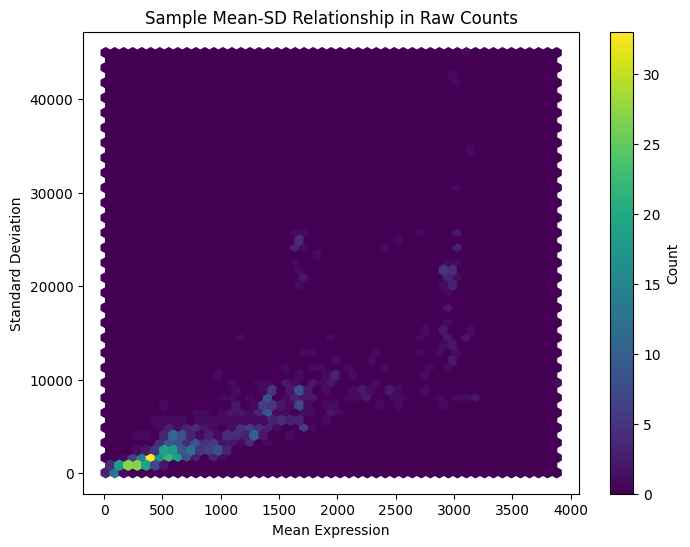

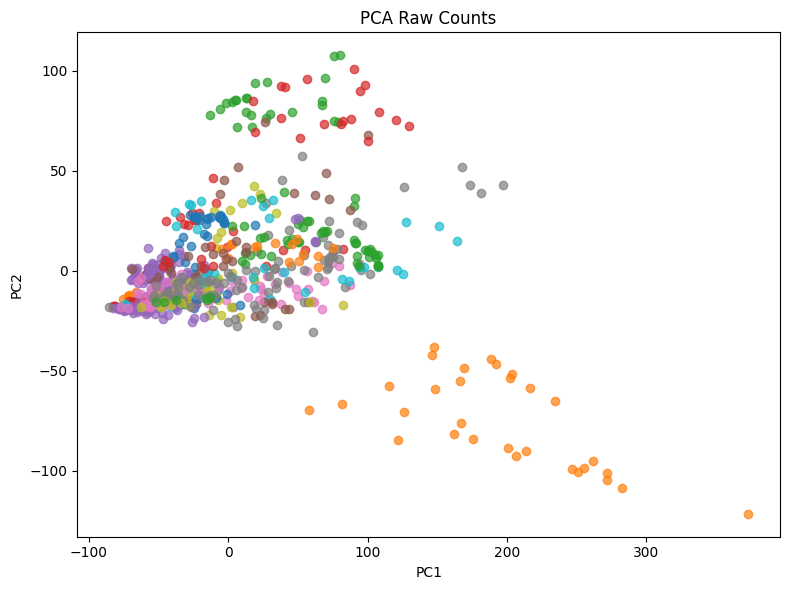

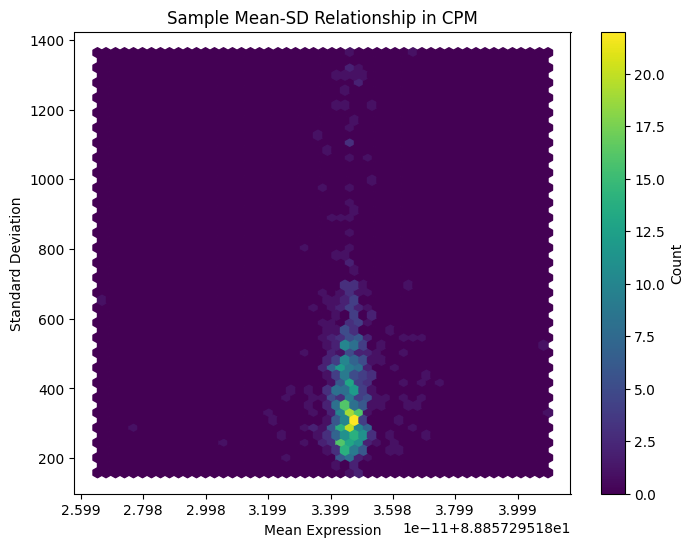

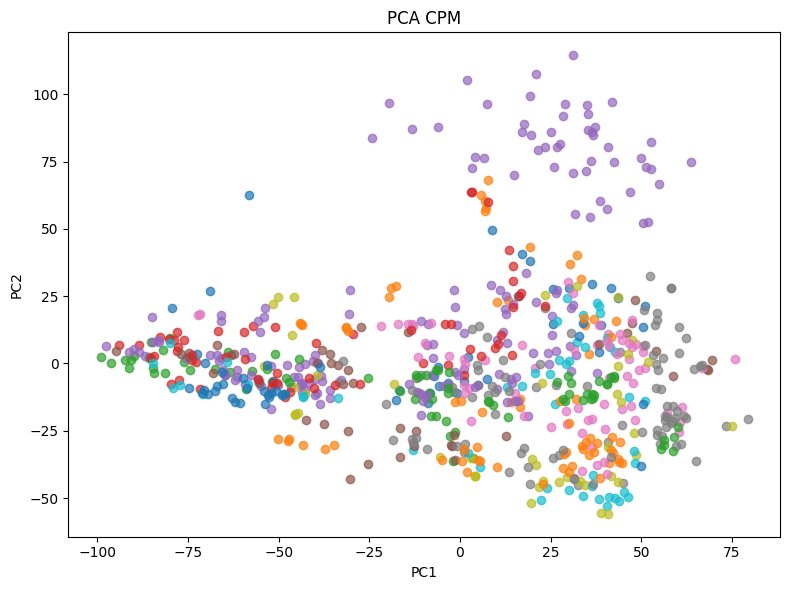

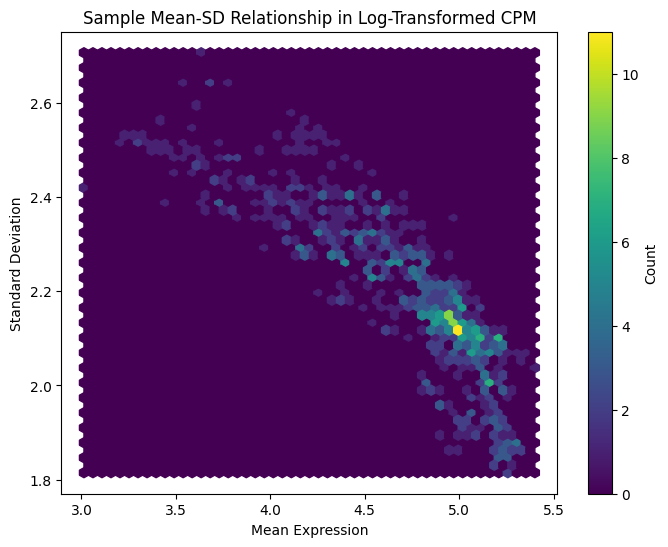

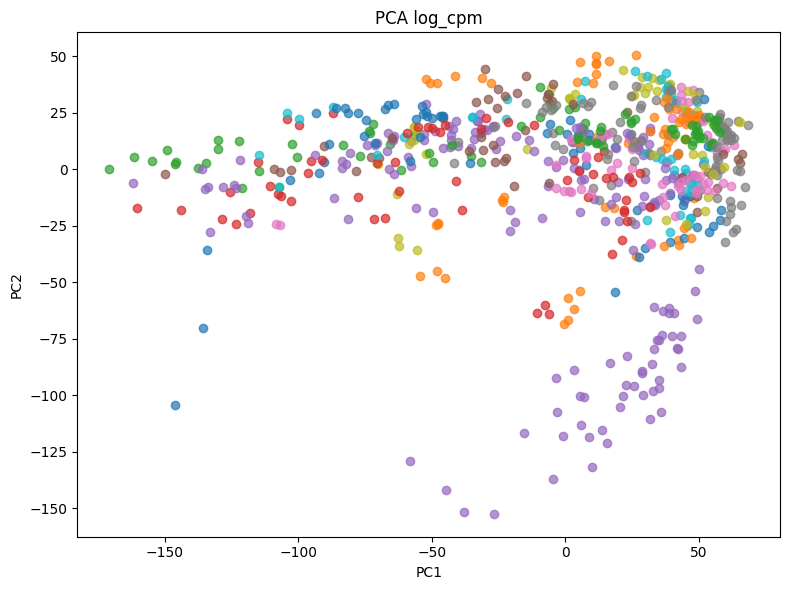

2025-03-27 09:05:05,627 - INFO - Performing TMM normalization...


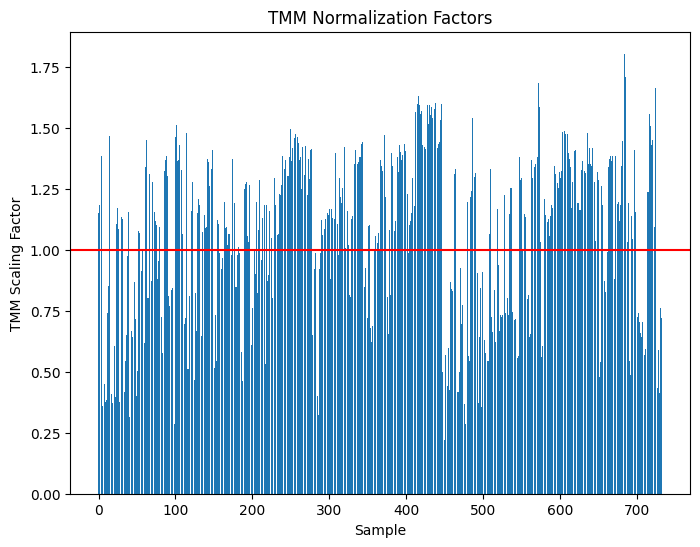

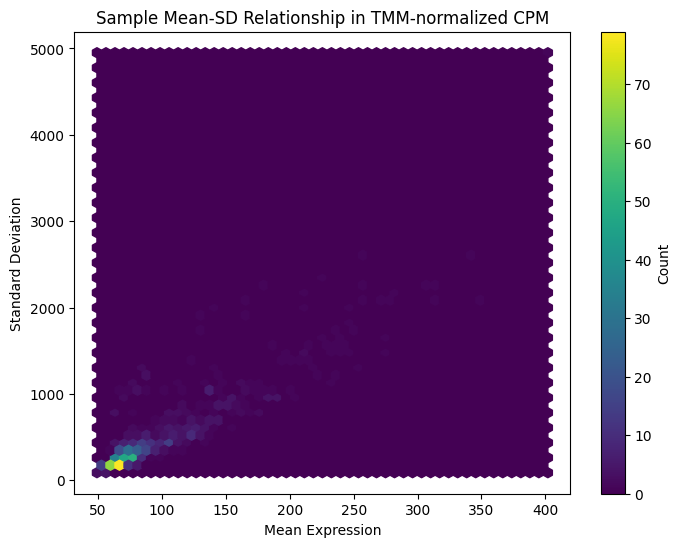

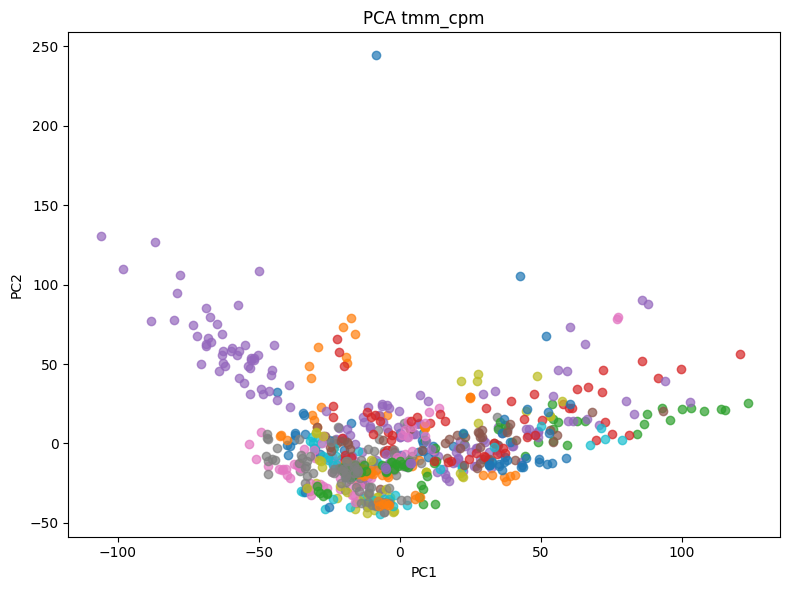

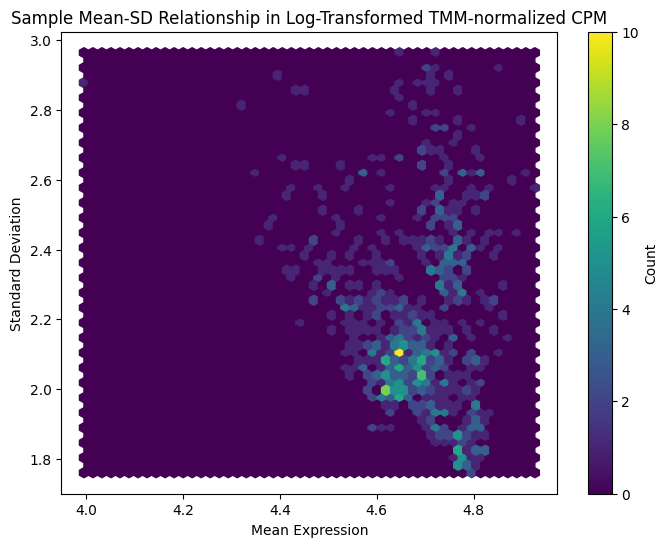

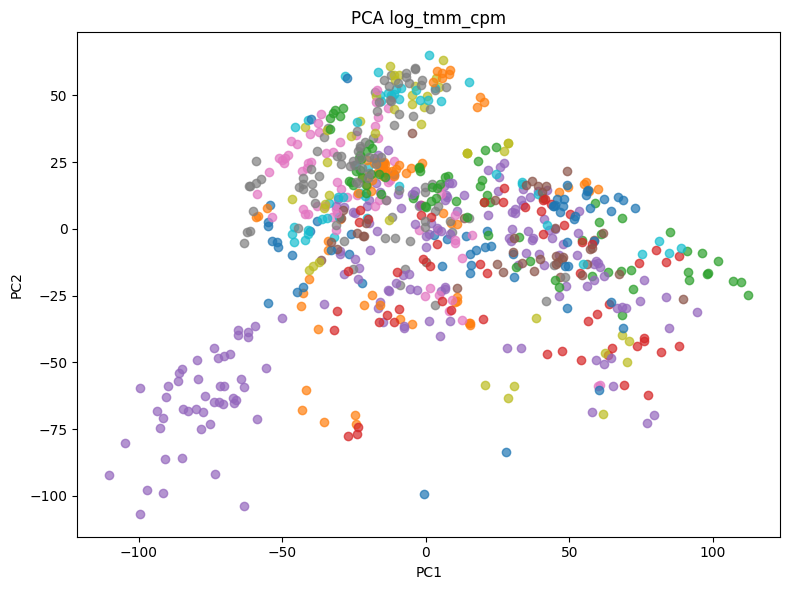

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.46 seconds.

Fitting dispersions...
... done in 18.67 seconds.

Fitting dispersion trend curve...
... done in 0.30 seconds.

Fitting MAP dispersions...
... done in 21.88 seconds.

Fitting LFCs...
... done in 17.97 seconds.

Calculating cook's distance...
... done in 0.73 seconds.

Replacing 16 outlier genes.

Fitting dispersions...
... done in 0.09 seconds.

Fitting MAP dispersions...
... done in 0.07 seconds.

Fitting LFCs...
... done in 0.26 seconds.



Fit type used for VST : parametric


Fitting dispersions...
... done in 18.49 seconds.



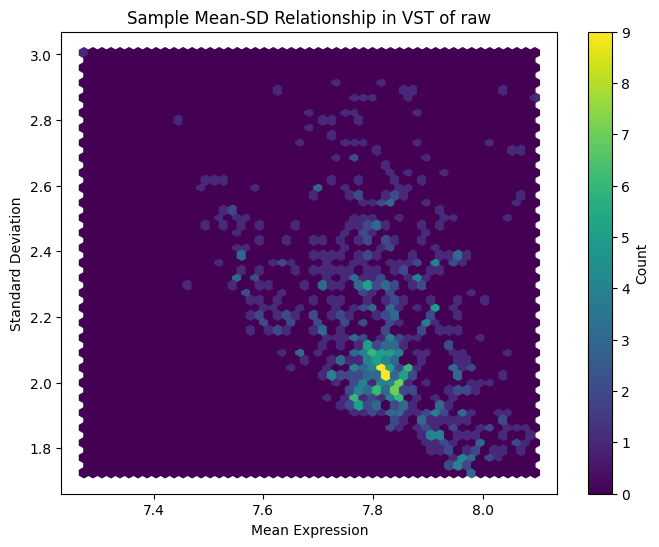

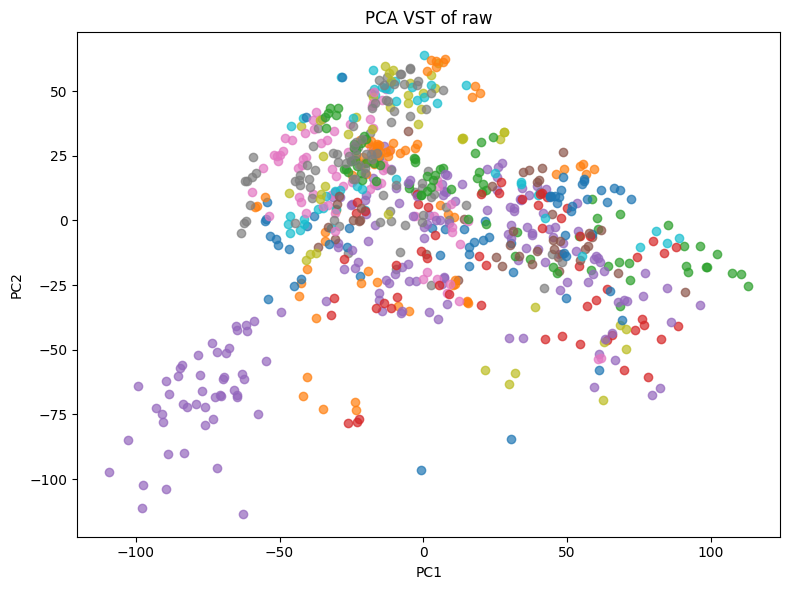

... storing 'batch' as categorical
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_combat.py:350: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


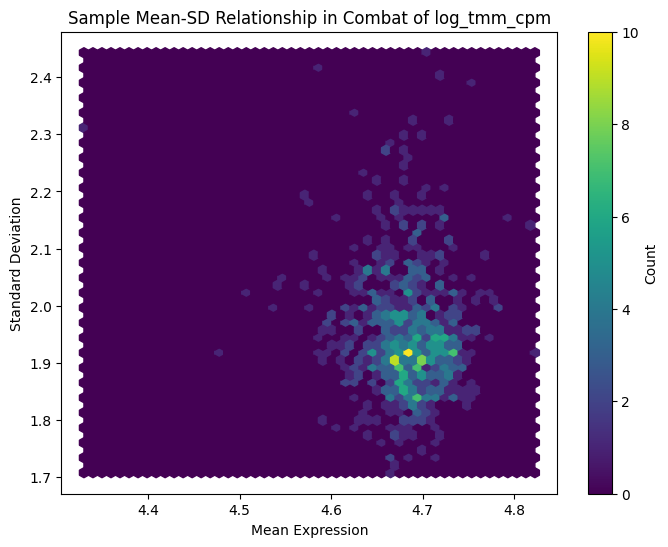

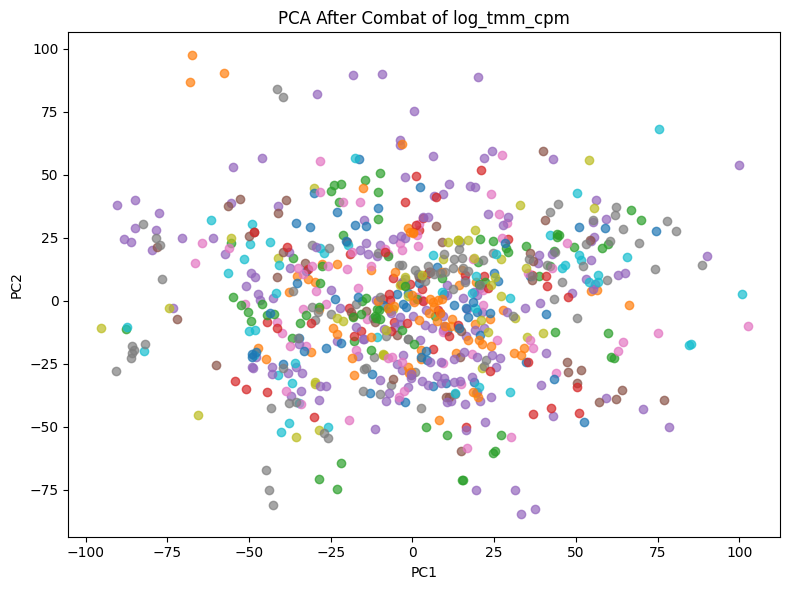

2025-03-27 09:06:50,424 - INFO - Updating gene set information in adata.uns...
2025-03-27 09:06:50,435 - INFO - Updated gene sets; 1449 sets retained.
2025-03-27 09:06:50,437 - INFO - Number of gene sets: 5
2025-03-27 09:06:50,437 - INFO - Gene sets: ['MEP_pathway', 'carotene_pathway', 'xanthophyll_forward', 'xanthophyll_backward', 'fucoxnathin_proteins']
2025-03-27 09:06:50,438 - INFO - Gene set MEP_pathway has 4 genes
2025-03-27 09:06:50,438 - INFO - Gene set carotene_pathway has 5 genes
2025-03-27 09:06:50,439 - INFO - Gene set xanthophyll_forward has 7 genes
2025-03-27 09:06:50,440 - INFO - Gene set xanthophyll_backward has 1 genes
2025-03-27 09:06:50,440 - INFO - Gene set fucoxnathin_proteins has 29 genes
2025-03-27 09:06:50,450 - INFO - Performing pre-GSVA sample filtering...
2025-03-27 09:06:54,576 - INFO - Pre-GSVA filtering complete: kept 702 out of 733 samples
2025-03-27 09:06:54,577 - INFO - Running GSVA with 702 samples...
2025-03-27 09:07:13,565 - INFO - GSVA results by co

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.34 seconds.

Fitting dispersions...
... done in 8.45 seconds.

Fitting dispersion trend curve...
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 10.26 seconds.

Fitting LFCs...
... done in 4.95 seconds.

Calculating cook's distance...
... done in 0.69 seconds.

Replacing 588 outlier genes.

Fitting dispersions...
... done in 0.53 seconds.

Fitting MAP dispersions...
... done in 0.48 seconds.

Fitting LFCs...
... done in 0.43 seconds.

Running Wald tests...
... done in 1.31 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: MEP_pathway up vs down
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.054368  0.275419  0.197399   
Phatr3_draftJ1139        11.189031        0.017328  0.333244  0.051997   
Phatr3_draftJ1501        94.131433       -0.179626  0.142852 -1.257426   
Phatr3_draftJ1541        29.850437       -1.191165  0.309463 -3.849132   
Phatr3_draftJ1666       164.551260        0.020937  0.068163  0.307170   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308        0.151241  0.209309  0.722573   
Phatr3_Jdraft955       1311.690112       -0.176172  0.137341 -1.282736   
Phatr3_Jdraft972        710.980824       -0.568063  0.234538 -2.422052   
Phatr3_Jdraft976        587.245679       -0.218478  0.253043 -0.863402   
Phatr3_Jdraft977       1714.554086        0.550817 

... done in 7.47 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.36 seconds.

Fitting dispersions...
... done in 9.25 seconds.

Fitting dispersion trend curve...
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 8.84 seconds.

Fitting LFCs...
... done in 5.20 seconds.

Calculating cook's distance...
... done in 0.70 seconds.

Replacing 588 outlier genes.

Fitting dispersions...
... done in 0.54 seconds.

Fitting MAP dispersions...
... done in 0.49 seconds.

Fitting LFCs...
... done in 0.43 seconds.

Running Wald tests...
... done in 1.24 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: MEP_pathway up vs neutral
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.689840  0.232973  2.961034   
Phatr3_draftJ1139        11.189031        0.052801  0.281854  0.187336   
Phatr3_draftJ1501        94.131433        0.269598  0.120850  2.230838   
Phatr3_draftJ1541        29.850437       -0.642675  0.261960 -2.453337   
Phatr3_draftJ1666       164.551260        0.048092  0.057705  0.833414   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308       -0.108824  0.176708 -0.615844   
Phatr3_Jdraft955       1311.690112       -0.156111  0.115957 -1.346283   
Phatr3_Jdraft972        710.980824       -0.452401  0.198020 -2.284625   
Phatr3_Jdraft976        587.245679       -0.310460  0.213635 -1.453229   
Phatr3_Jdraft977       1714.554086        0.2357

... done in 7.69 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.36 seconds.

Fitting dispersions...
... done in 8.36 seconds.

Fitting dispersion trend curve...
... done in 0.31 seconds.

Fitting MAP dispersions...
... done in 8.39 seconds.

Fitting LFCs...
... done in 4.63 seconds.

Calculating cook's distance...
... done in 0.71 seconds.

Replacing 588 outlier genes.

Fitting dispersions...
... done in 0.54 seconds.

Fitting MAP dispersions...
... done in 0.47 seconds.

Fitting LFCs...
... done in 0.45 seconds.

Running Wald tests...
... done in 1.20 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: MEP_pathway down vs neutral
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.635472  0.221862  2.864268   
Phatr3_draftJ1139        11.189031        0.035474  0.267923  0.132403   
Phatr3_draftJ1501        94.131433        0.449223  0.114929  3.908712   
Phatr3_draftJ1541        29.850437        0.548490  0.248245  2.209472   
Phatr3_draftJ1666       164.551260        0.027155  0.054765  0.495837   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308       -0.260066  0.168505 -1.543367   
Phatr3_Jdraft955       1311.690112        0.020061  0.110561  0.181445   
Phatr3_Jdraft972        710.980824        0.115662  0.188801  0.612614   
Phatr3_Jdraft976        587.245679       -0.091982  0.203708 -0.451539   
Phatr3_Jdraft977       1714.554086       -0.31

... done in 7.21 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.39 seconds.

Fitting dispersions...
... done in 8.67 seconds.

Fitting dispersion trend curve...
... done in 0.33 seconds.

Fitting MAP dispersions...
... done in 8.51 seconds.

Fitting LFCs...
... done in 4.41 seconds.

Calculating cook's distance...
... done in 0.68 seconds.

Replacing 559 outlier genes.

Fitting dispersions...
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 0.52 seconds.

Fitting LFCs...
... done in 0.47 seconds.

Running Wald tests...
... done in 1.18 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: carotene_pathway up vs down
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076       -0.554665  0.272123 -2.038287   
Phatr3_draftJ1139        11.189031        0.178791  0.327312  0.546239   
Phatr3_draftJ1501        94.131433       -0.165732  0.140979 -1.175576   
Phatr3_draftJ1541        29.850437       -1.464078  0.302249 -4.843943   
Phatr3_draftJ1666       164.551260        0.150067  0.066349  2.261763   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308       -0.358521  0.205938 -1.740914   
Phatr3_Jdraft955       1311.690112       -0.075234  0.135307 -0.556022   
Phatr3_Jdraft972        710.980824       -0.845451  0.230069 -3.674775   
Phatr3_Jdraft976        587.245679       -0.778801  0.248118 -3.138837   
Phatr3_Jdraft977       1714.554086        0.96

... done in 7.15 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.37 seconds.

Fitting dispersions...
... done in 9.97 seconds.

Fitting dispersion trend curve...
... done in 0.31 seconds.

Fitting MAP dispersions...
... done in 8.69 seconds.

Fitting LFCs...
... done in 4.37 seconds.

Calculating cook's distance...
... done in 0.67 seconds.

Replacing 559 outlier genes.

Fitting dispersions...
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 0.51 seconds.

Fitting LFCs...
... done in 0.49 seconds.

Running Wald tests...
... done in 1.28 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: carotene_pathway up vs neutral
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.065087  0.221881  0.293340   
Phatr3_draftJ1139        11.189031       -0.294411  0.266265 -1.105708   
Phatr3_draftJ1501        94.131433       -0.427168  0.114768 -3.722026   
Phatr3_draftJ1541        29.850437       -1.294177  0.246502 -5.250168   
Phatr3_draftJ1666       164.551260       -0.073551  0.054057 -1.360606   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308       -0.295005  0.167426 -1.761998   
Phatr3_Jdraft955       1311.690112        0.037868  0.109999  0.344255   
Phatr3_Jdraft972        710.980824       -0.575129  0.187039 -3.074917   
Phatr3_Jdraft976        587.245679       -0.420233  0.201713 -2.083319   
Phatr3_Jdraft977       1714.554086       -0

... done in 7.54 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.36 seconds.

Fitting dispersions...
... done in 8.12 seconds.

Fitting dispersion trend curve...
... done in 0.30 seconds.

Fitting MAP dispersions...
... done in 8.80 seconds.

Fitting LFCs...
... done in 4.36 seconds.

Calculating cook's distance...
... done in 0.67 seconds.

Replacing 559 outlier genes.

Fitting dispersions...
... done in 0.52 seconds.

Fitting MAP dispersions...
... done in 0.45 seconds.

Fitting LFCs...
... done in 0.41 seconds.

Running Wald tests...
... done in 1.18 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: carotene_pathway down vs neutral
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.619752  0.230819  2.685010   
Phatr3_draftJ1139        11.189031       -0.473201  0.277591 -1.704669   
Phatr3_draftJ1501        94.131433       -0.261437  0.119490 -2.187937   
Phatr3_draftJ1541        29.850437        0.169901  0.255416  0.665193   
Phatr3_draftJ1666       164.551260       -0.223617  0.056313 -3.970978   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308        0.063516  0.174716  0.363538   
Phatr3_Jdraft955       1311.690112        0.113102  0.114804  0.985171   
Phatr3_Jdraft972        710.980824        0.270322  0.195182  1.384977   
Phatr3_Jdraft976        587.245679        0.358568  0.210498  1.703424   
Phatr3_Jdraft977       1714.554086       

... done in 7.64 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.36 seconds.

Fitting dispersions...
... done in 8.32 seconds.

Fitting dispersion trend curve...
... done in 0.33 seconds.

Fitting MAP dispersions...
... done in 8.35 seconds.

Fitting LFCs...
... done in 5.09 seconds.

Calculating cook's distance...
... done in 0.70 seconds.

Replacing 588 outlier genes.

Fitting dispersions...
... done in 0.55 seconds.

Fitting MAP dispersions...
... done in 0.48 seconds.

Fitting LFCs...
... done in 0.44 seconds.

Running Wald tests...
... done in 1.22 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: xanthophyll_forward up vs down
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.042842  0.287479  0.149025   
Phatr3_draftJ1139        11.189031       -0.250662  0.349362 -0.717486   
Phatr3_draftJ1501        94.131433       -0.152033  0.151234 -1.005284   
Phatr3_draftJ1541        29.850437       -0.314770  0.326301 -0.964662   
Phatr3_draftJ1666       164.551260       -0.049935  0.071483 -0.698560   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308       -0.228482  0.219324 -1.041756   
Phatr3_Jdraft955       1311.690112       -0.209649  0.143145 -1.464596   
Phatr3_Jdraft972        710.980824        0.051567  0.246277  0.209388   
Phatr3_Jdraft976        587.245679        0.865022  0.263665  3.280763   
Phatr3_Jdraft977       1664.473875        0

... done in 7.45 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.37 seconds.

Fitting dispersions...
... done in 8.08 seconds.

Fitting dispersion trend curve...
... done in 0.33 seconds.

Fitting MAP dispersions...
... done in 8.62 seconds.

Fitting LFCs...
... done in 4.38 seconds.

Calculating cook's distance...
... done in 0.68 seconds.

Replacing 588 outlier genes.

Fitting dispersions...
... done in 0.60 seconds.

Fitting MAP dispersions...
... done in 0.53 seconds.

Fitting LFCs...
... done in 0.50 seconds.

Running Wald tests...
... done in 1.30 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: xanthophyll_forward up vs neutral
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.799506  0.227333  3.516896   
Phatr3_draftJ1139        11.189031       -0.206994  0.276424 -0.748828   
Phatr3_draftJ1501        94.131433       -0.043939  0.119542 -0.367560   
Phatr3_draftJ1541        29.850437       -0.032014  0.257905 -0.124132   
Phatr3_draftJ1666       164.551260       -0.019300  0.056575 -0.341140   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308       -0.135864  0.173149 -0.784661   
Phatr3_Jdraft955       1311.690112       -0.362763  0.113005 -3.210166   
Phatr3_Jdraft972        710.980824        0.146679  0.194411  0.754480   
Phatr3_Jdraft976        587.245679        0.175839  0.208099  0.844977   
Phatr3_Jdraft977       1664.473875      

... done in 7.19 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.37 seconds.

Fitting dispersions...
... done in 8.01 seconds.

Fitting dispersion trend curve...
... done in 0.32 seconds.

Fitting MAP dispersions...
... done in 8.79 seconds.

Fitting LFCs...
... done in 4.41 seconds.

Calculating cook's distance...
... done in 0.69 seconds.

Replacing 588 outlier genes.

Fitting dispersions...
... done in 0.55 seconds.

Fitting MAP dispersions...
... done in 0.49 seconds.

Fitting LFCs...
... done in 0.45 seconds.

Running Wald tests...
... done in 1.40 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: xanthophyll_forward down vs neutral
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.756664  0.238241  3.176051   
Phatr3_draftJ1139        11.189031        0.043669  0.288526  0.151351   
Phatr3_draftJ1501        94.131433        0.108094  0.125097  0.864081   
Phatr3_draftJ1541        29.850437        0.282756  0.269994  1.047268   
Phatr3_draftJ1666       164.551260        0.030635  0.059040  0.518891   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308        0.092619  0.181664  0.509834   
Phatr3_Jdraft955       1311.690112       -0.153114  0.118561 -1.291432   
Phatr3_Jdraft972        710.980824        0.095112  0.204014  0.466202   
Phatr3_Jdraft976        587.245679       -0.689183  0.218437 -3.155064   
Phatr3_Jdraft977       1664.473875    

... done in 7.43 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.37 seconds.

Fitting dispersions...
... done in 8.52 seconds.

Fitting dispersion trend curve...
... done in 0.33 seconds.

Fitting MAP dispersions...
... done in 8.68 seconds.

Fitting LFCs...
... done in 5.43 seconds.

Calculating cook's distance...
... done in 0.74 seconds.

Replacing 513 outlier genes.

Fitting dispersions...
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 0.45 seconds.

Fitting LFCs...
... done in 0.41 seconds.

Running Wald tests...
... done in 1.25 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: xanthophyll_backward up vs down
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.063731  0.281429  0.226455   
Phatr3_draftJ1139        11.189031        0.375784  0.336980  1.115154   
Phatr3_draftJ1501        94.131433        0.015333  0.145998  0.105023   
Phatr3_draftJ1541        29.850437       -1.163233  0.314218 -3.701996   
Phatr3_draftJ1666       164.551260        0.152797  0.068821  2.220201   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308        0.011202  0.211794  0.052893   
Phatr3_Jdraft955       1311.690112        0.295152  0.138798  2.126496   
Phatr3_Jdraft972        710.980824        0.041337  0.238043  0.173653   
Phatr3_Jdraft976        587.245679       -0.835924  0.252672 -3.308341   
Phatr3_Jdraft977       1714.554086        

... done in 7.75 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.38 seconds.

Fitting dispersions...
... done in 8.23 seconds.

Fitting dispersion trend curve...
... done in 0.31 seconds.

Fitting MAP dispersions...
... done in 8.61 seconds.

Fitting LFCs...
... done in 4.58 seconds.

Calculating cook's distance...
... done in 0.70 seconds.

Replacing 513 outlier genes.

Fitting dispersions...
... done in 0.55 seconds.

Fitting MAP dispersions...
... done in 0.48 seconds.

Fitting LFCs...
... done in 0.42 seconds.

Running Wald tests...
... done in 1.23 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: xanthophyll_backward up vs neutral
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.368745  0.241746  1.525343   
Phatr3_draftJ1139        11.189031        0.418458  0.289452  1.445689   
Phatr3_draftJ1501        94.131433        0.218651  0.125417  1.743394   
Phatr3_draftJ1541        29.850437       -1.189291  0.270198 -4.401553   
Phatr3_draftJ1666       164.551260        0.168768  0.059203  2.850639   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308        0.360796  0.181648  1.986234   
Phatr3_Jdraft955       1311.690112        0.328543  0.119033  2.760095   
Phatr3_Jdraft972        710.980824       -0.328866  0.204137 -1.611006   
Phatr3_Jdraft976        587.245679       -1.307300  0.216709 -6.032524   
Phatr3_Jdraft977       1714.554086     

... done in 7.38 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.37 seconds.

Fitting dispersions...
... done in 8.06 seconds.

Fitting dispersion trend curve...
... done in 0.32 seconds.

Fitting MAP dispersions...
... done in 9.62 seconds.

Fitting LFCs...
... done in 4.51 seconds.

Calculating cook's distance...
... done in 0.68 seconds.

Replacing 513 outlier genes.

Fitting dispersions...
... done in 0.51 seconds.

Fitting MAP dispersions...
... done in 0.49 seconds.

Fitting LFCs...
... done in 0.48 seconds.

Running Wald tests...
... done in 1.38 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: xanthophyll_backward down vs neutral
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.305014  0.219892  1.387109   
Phatr3_draftJ1139        11.189031        0.042674  0.263441  0.161987   
Phatr3_draftJ1501        94.131433        0.203318  0.114018  1.783205   
Phatr3_draftJ1541        29.850437       -0.026058  0.244131 -0.106739   
Phatr3_draftJ1666       164.551260        0.015971  0.053686  0.297493   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308        0.349594  0.165568  2.111485   
Phatr3_Jdraft955       1311.690112        0.033390  0.108507  0.307723   
Phatr3_Jdraft972        710.980824       -0.370203  0.186074 -1.989545   
Phatr3_Jdraft976        587.245679       -0.471376  0.197436 -2.387493   
Phatr3_Jdraft977       1714.554086   

... done in 7.39 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.36 seconds.

Fitting dispersions...
... done in 8.43 seconds.

Fitting dispersion trend curve...
... done in 0.31 seconds.

Fitting MAP dispersions...
... done in 9.09 seconds.

Fitting LFCs...
... done in 4.41 seconds.

Calculating cook's distance...
... done in 0.69 seconds.

Replacing 566 outlier genes.

Fitting dispersions...
... done in 0.54 seconds.

Fitting MAP dispersions...
... done in 0.50 seconds.

Fitting LFCs...
... done in 0.46 seconds.

Running Wald tests...
... done in 1.23 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: fucoxnathin_proteins up vs down
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.092041  0.278135  0.330922   
Phatr3_draftJ1139        11.189031        0.224234  0.334934  0.669485   
Phatr3_draftJ1501        94.131433        0.213494  0.145542  1.466886   
Phatr3_draftJ1541        29.850437       -1.334318  0.312104 -4.275234   
Phatr3_draftJ1666       164.551260        0.023095  0.068655  0.336388   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308       -1.147630  0.208021 -5.516901   
Phatr3_Jdraft955       1311.690112       -0.720494  0.136510 -5.277959   
Phatr3_Jdraft972        710.980824        0.497531  0.236258  2.105882   
Phatr3_Jdraft976        587.245679        0.530548  0.254989  2.080668   
Phatr3_Jdraft977       1714.554086        

... done in 8.37 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.36 seconds.

Fitting dispersions...
... done in 8.61 seconds.

Fitting dispersion trend curve...
... done in 0.30 seconds.

Fitting MAP dispersions...
... done in 8.49 seconds.

Fitting LFCs...
... done in 4.81 seconds.

Calculating cook's distance...
... done in 0.71 seconds.

Replacing 566 outlier genes.

Fitting dispersions...
... done in 0.53 seconds.

Fitting MAP dispersions...
... done in 0.48 seconds.

Fitting LFCs...
... done in 0.46 seconds.

Running Wald tests...
... done in 1.26 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: fucoxnathin_proteins up vs neutral
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.680169  0.236711  2.873419   
Phatr3_draftJ1139        11.189031       -0.653255  0.284227 -2.298360   
Phatr3_draftJ1501        94.131433        0.034991  0.123713  0.282836   
Phatr3_draftJ1541        29.850437       -0.984270  0.265910 -3.701515   
Phatr3_draftJ1666       164.551260        0.085642  0.058472  1.464667   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308       -1.008007  0.176799 -5.701434   
Phatr3_Jdraft955       1311.690112       -0.527923  0.116009 -4.550716   
Phatr3_Jdraft972        710.980824       -0.113336  0.200725 -0.564634   
Phatr3_Jdraft976        587.245679        0.184935  0.216645  0.853632   
Phatr3_Jdraft977       1714.554086     

... done in 7.66 seconds.

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.39 seconds.

Fitting dispersions...
... done in 8.42 seconds.

Fitting dispersion trend curve...
... done in 0.33 seconds.

Fitting MAP dispersions...
... done in 8.84 seconds.

Fitting LFCs...
... done in 5.01 seconds.

Calculating cook's distance...
... done in 0.70 seconds.

Replacing 566 outlier genes.

Fitting dispersions...
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 0.53 seconds.

Fitting LFCs...
... done in 0.46 seconds.

Running Wald tests...
... done in 1.22 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: fucoxnathin_proteins down vs neutral
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_ENSEMBL                                                               
EPrPhatr3G00000013088    26.891076        0.588128  0.220751  2.664219   
Phatr3_draftJ1139        11.189031       -0.877489  0.264820 -3.313527   
Phatr3_draftJ1501        94.131433       -0.178503  0.115380 -1.547087   
Phatr3_draftJ1541        29.850437        0.350048  0.246332  1.421038   
Phatr3_draftJ1666       164.551260        0.062547  0.054362  1.150572   
...                            ...             ...       ...       ...   
Phatr3_Jdraft920        528.124308        0.139623  0.164890  0.846769   
Phatr3_Jdraft955       1311.690112        0.192571  0.108238  1.779152   
Phatr3_Jdraft972        710.980824       -0.610867  0.187386 -3.259938   
Phatr3_Jdraft976        587.245679       -0.345613  0.202250 -1.708841   
Phatr3_Jdraft977       1714.554086   

... done in 7.23 seconds.



2025-03-27 09:18:45,026 - INFO - Constructing gene labels for the subset...
2025-03-27 09:18:45,066 - INFO - Saved top DEGs CSV for MEP_pathway_up_vs_down at louvain_results/MEP_pathway_up_vs_down_top_degs.csv
2025-03-27 09:18:52,246 - INFO - Created Louvain visualization for MEP_pathway_up_vs_down top DEGs
2025-03-27 09:18:55,753 - INFO - Saved 138 up-regulated samples for MEP_pathway_up_vs_down
2025-03-27 09:19:02,974 - INFO - Looking for GSVA classification in column: MEP_pathway
2025-03-27 09:19:03,220 - INFO - Constructing gene labels for the subset...
2025-03-27 09:19:03,260 - INFO - Saved top DEGs CSV for MEP_pathway_up_vs_neutral at louvain_results/MEP_pathway_up_vs_neutral_top_degs.csv
2025-03-27 09:19:10,649 - INFO - Created Louvain visualization for MEP_pathway_up_vs_neutral top DEGs
2025-03-27 09:19:14,185 - INFO - Saved 138 up-regulated samples for MEP_pathway_up_vs_neutral
2025-03-27 09:19:20,606 - INFO - Looking for GSVA classification in column: MEP_pathway
2025-03-27 0

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:715: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self._figure = plt.figure(figsize=figsize)


2025-03-27 09:21:34,711 - INFO - Saved 127 up-regulated samples for xanthophyll_backward_up_vs_down


<ipython-input-15-1103337c5f59>:1628: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))
<ipython-input-15-1103337c5f59>:1637: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))
<ipython-input-15-1103337c5f59>:1677: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (

2025-03-27 09:21:41,045 - INFO - Looking for GSVA classification in column: xanthophyll_backward
2025-03-27 09:21:41,275 - INFO - Constructing gene labels for the subset...
2025-03-27 09:21:41,315 - INFO - Saved top DEGs CSV for xanthophyll_backward_up_vs_neutral at louvain_results/xanthophyll_backward_up_vs_neutral_top_degs.csv


<ipython-input-15-1103337c5f59>:1554: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(18, 12))


2025-03-27 09:21:48,436 - INFO - Created Louvain visualization for xanthophyll_backward_up_vs_neutral top DEGs
2025-03-27 09:21:51,954 - INFO - Saved 127 up-regulated samples for xanthophyll_backward_up_vs_neutral
2025-03-27 09:21:58,492 - INFO - Looking for GSVA classification in column: xanthophyll_backward
2025-03-27 09:21:58,727 - INFO - Constructing gene labels for the subset...
2025-03-27 09:21:58,765 - INFO - Saved top DEGs CSV for xanthophyll_backward_down_vs_neutral at louvain_results/xanthophyll_backward_down_vs_neutral_top_degs.csv
2025-03-27 09:22:05,639 - INFO - Created Louvain visualization for xanthophyll_backward_down_vs_neutral top DEGs
2025-03-27 09:22:09,213 - INFO - Saved 127 up-regulated samples for xanthophyll_backward_down_vs_neutral
2025-03-27 09:22:17,359 - INFO - Looking for GSVA classification in column: fucoxnathin_proteins
2025-03-27 09:22:17,602 - INFO - Constructing gene labels for the subset...
2025-03-27 09:22:17,642 - INFO - Saved top DEGs CSV for fuco

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

In [16]:
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    level=logging.DEBUG if "--debug" in sys.argv else logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.StreamHandler(sys.stdout),
    ],
)

async def main():
    # kegg org code
    org_code = "pti"

    # ensemble/go csvs
    data_folder = '/content/drive/MyDrive/data'
    ens_folder = os.path.join(data_folder, 'raw-ensembl')
    cdna_file = os.path.join(ens_folder, 'Phaeodactylum_tricornutum.ASM15095v2.cdna.all.fa.gz')
    pep_file = os.path.join(ens_folder, 'Phaeodactylum_tricornutum.ASM15095v2.pep.all.fa.gz')
    go_file = os.path.join(ens_folder, 'pti_go_biomart.txt')

    # exp raw count
    exp_path = "/content/drive/MyDrive/data/exp-counts"

    # integrate annotations
    integrator = AnnotationIntegrator(org_code, cdna_file, pep_file, go_file)
    integrated_df, var_df, varm_path_df, varm_GO_ID_df = await integrator.run()

    integrated_df.to_csv(f'/content/drive/MyDrive/data/annotations/{org_code}_integrated_df.csv', index=True)

    var_df.to_csv(f'/content/drive/MyDrive/data/annotations/{org_code}_var_df.csv', index=True)
    varm_path_df.to_csv(f'/content/drive/MyDrive/data/annotations/{org_code}_varm_path_df.csv', index=True)
    varm_GO_ID_df.to_csv(f'/content/drive/MyDrive/data/annotations/{org_code}_varm_GO_ID_df.csv', index=True)

    # load from csv if already ran integrator
    var_df = pd.read_csv(f'/content/drive/MyDrive/data/annotations/{org_code}_var_df.csv')
    varm_path_df = pd.read_csv(f'/content/drive/MyDrive/data/annotations/{org_code}_varm_path_df.csv')
    varm_GO_ID_df = pd.read_csv(f'/content/drive/MyDrive/data/annotations/{org_code}_varm_GO_ID_df.csv')

    adata_path = f"/content/drive/MyDrive/data/adata/{org_code}_annotated_expression_data.h5ad"
    h5_path = "processed_data.h5"
    batch_size = 64
    chunk_size = 64
    ###

    annotation_type = 'GO_MF_ID' # path, GO_BP, GO_MF, GO_CC. currently only supports one at a time

    # Intermediate metabolites (GO:BP)
    #   carotenoid metabolic process (GO:0016116)
    #   xanthophyll cycle (GO:0010028)
    #   carotene biosynthetic process (GO:0016120)
    #   terpenoid biosynthetic process (GO:0016114)
    #   carotene catabolic process (GO:0016121)
    #   Isoprenoid biosynthetic process (GO:0008299)

    #   obsolete oxidation-reduction process (GO:0055114)

    # 'GO:0016116', 'GO:0010028', 'GO:0016120', 'GO:0016114', 'GO:0016121', 'GO:0008299', #'GO:0055114'

    # https://biotechnologyforbiofuels.biomedcentral.com/articles/10.1186/s13068-024-02496-3/figures/2

    # OG
    custom_sets = {

        # Glyco

        # acetyl

        # Isoprenoid Pathway (DXS to IPP)
        'MEP_pathway': ["Phatr3_Jdraft1689", "Phatr3_J9258", "Phatr3_J41845","Phatr3_J31683"],  # DXS, DXR, IDS [HDR],GGDS [IPP] (predicted protein)

        # Carotene Pathway (IPP to β-carotene)
        'carotene_pathway': ["Phatr3_J31683", "Phatr3_EG02349", "Phatr3_J35509", "Phatr3_J55102", "Phatr3_J51868", "Phatr3_J54842", "Phatr3_J45243", "Phatr3_J9040", "Phatr3_J8835"],  # GGDS [IPP] (predicted protein), PSY, PDS1, PDS2, ZDS, CRTISO1, CRTISO3, CRTISO4, LCYb

        # Fucoxanthin Pathway (β-carotene to fucoxanthin)
        'fucoxanthin_pathway': ["Phatr3_J51703", "Phatr3_J43240", "Phatr3_J16586", "Phatr3_J26422","Phatr3_J5928", "Phatr3_J10970","Phatr3_J45846","Phatr3_J45845","Phatr3_J36048","Phatr3_J9210"], # VDE, VDR, LUT1-1, LUT1-2, ZEP2, ZEP3, VDL2, ZEP1, VDL1, CRTISO5

        # Xanthophyll Cycle ~
        'xanthophyll_cycle': ["Phatr3_J51703", "Phatr3_J43240", "Phatr3_J16586", "Phatr3_J26422","Phatr3_J5928", "Phatr3_J10970","Phatr3_J45846","Phatr3_J45845","Phatr3_J36048"], # VDE, VDR, LUT1-1, LUT1-2, ZEP2, ZEP3, VDL2, ZEP1, VDL1

        # Fucoxanthin Formation
        'fucoxanthin_synthesis': ["Phatr3_J45846","Phatr3_J45845","Phatr3_J36048","Phatr3_J9210"]  # VDL2, ZEP1, VDL1, CRTISO5

    }# include glyco and acetyl cylce


    # trial
    custom_sets = {

        # Isoprenoid Pathway (DXS to IPP)
        'MEP_pathway': ["Phatr3_Jdraft1689", "Phatr3_J9258", "Phatr3_J41845","Phatr3_J31683"],  # DXS, DXR, IDS [HDR],GGDS [IPP] (predicted protein)

        # Carotene Pathway (IPP to β-carotene)
        'carotene_pathway': ["Phatr3_EG02349", "Phatr3_J35509", "Phatr3_J55102", "Phatr3_J51868", "Phatr3_J8835"],  # PSY, PDS1, PDS2, ZDS, LCYb

        # Xanthophyll Cycle ~
        'xanthophyll_forward': ["Phatr3_J43240", "Phatr3_J45846","Phatr3_J36048", "Phatr3_J45845", "Phatr3_J10970", "Phatr3_J5928", "Phatr3_J9210"], #  VDR, VDL2, VDL1, ZEP1, ZEP3, ZEP2, CRTISO5
        'xanthophyll_backward': ["Phatr3_J51703"], # VDE

        # Fucoxanthin chlorophyll proteins
        'fucoxnathin_proteins': ['Phatr3_J54027', 'Phatr3_J17766', 'Phatr3_J17531', 'Phatr3_J32294', 'Phatr3_J18180', 'Phatr3_J9799', 'Phatr3_J11006','Phatr3_J34536', 'Phatr3_J44733', 'Phatr3_J27278', 'Phatr3_J14242', 'Phatr3_J14442', 'Phatr3_J14386', 'Phatr3_J22006', 'Phatr3_J29266', 'Phatr3_J38720','Phatr3_J22395', 'Phatr3_J22680', 'Phatr3_EG00416', 'Phatr3_J48882', 'Phatr3_J30031', 'Phatr3_J22956','Phatr3_J23257', 'Phatr3_J16302', 'Phatr3_J16481', 'Phatr3_J24119', 'Phatr3_J10243', 'Phatr3_J25893', 'Phatr3_J17531']
        # LHCR12, LHCR4, 'predicted', LHCR8, LHCR7, LHCR3, LHCR1, LHCF16, LHCX3, LHCX1, LHCR6, LHCR13, LHCR14, LHCF10, LHCF6, LHCX4, LHCF8, LHCF13, predicted (deviant), LHCF15, LHCF9, LHCR2, LHCR11, LHCF12, LHCR10, predicted (deviant), LHCR9, LHCF14, predicted

    }

    intermediate_metabolites_gene_sets = list(custom_sets.keys())

    # for the labeling (gsva) use bp, mf, and cc. to make it higher res (maybe... try...)
    annotator = Annotator(

        var_df, varm_path_df, varm_GO_ID_df, # HDF5

        exp_path=exp_path, # Raw counts (post salmon)

        adata_path=adata_path, h5_path=h5_path, batch_size=batch_size, chunk_size=chunk_size, # Anndata

        annotation_type=annotation_type, # Annotation

        intermediate_metabolites_gene_sets=intermediate_metabolites_gene_sets, custom_sets=custom_sets # GSVA, PyDESeq2

    )

    adata, cdim, train_dataset, val_dataset, membership_mask, gene_descriptions, final_genes, final_annotations = annotator.annotate_data()

    logging.info("Experimental data annotated, saving AnnData object.")

    #save AnnData object
    #adata.write_h5ad(adata_path)
    #logging.info("Annotated AnnData object saved successfully.")
    return adata, cdim, train_dataset, val_dataset, membership_mask, gene_descriptions, final_genes, final_annotations, custom_sets, intermediate_metabolites_gene_sets

if __name__ == "__main__":
    adata, cdim, train_dataset, val_dataset, membership_mask, gene_descriptions, final_genes, final_annotations, custom_sets, intermediate_metabolites_gene_sets = await main()


In [ ]:
# 0. train pmvae with top up and down genes from fuco up vs down (train on fuco up and down samples with modules being the custom sets and aux). 1. run esm / function prediction on all top up genes from fuco up vs down 2.try just 1 set with all

In [ ]:
#  adata, cdim, train_dataset, val_dataset, membership_mask, gene_descriptions, final_genes, final_annotations, custom_sets, intermediate_metabolites_gene_sets

In [11]:
adata

AnnData object with n_obs × n_vars = 702 × 11254
    obs: 'condition', 'condition_ID', 'run_accession', 'batch', 'n_counts', 'n_genes', 'tmm_scaling_factors', 'louvain_cluster', 'MEP_pathway', 'carotene_pathway', 'fucoxnathin_proteins', 'xanthophyll_backward', 'xanthophyll_forward'
    var: 'gene_description', 'symbol', 'ACCESSION', 'nt_seq', 'aa_seq', 'readable_name'
    uns: 'GO_MF_ID', 'gene_sets', 'gsva_by_sample', 'gsva_by_condition', 'louvain_cluster_by_condition', 'top_discriminating_gene_sets', 'gsva_classifications', 'gsva_classification_table', 'gsva_classification_summary', 'deseq2_gsva_results', 'deseq2_gsva_top_degs'
    obsm: 'X_umap_louvain'
    varm: 'GO_MF_ID'
    layers: 'raw_counts', 'cpm', 'log_cpm', 'tmm_cpm', 'log_tmm_cpm', 'vst_counts', 'batch_corrected_log_tmm_cpm'

In [17]:
# Filtering membership mask to match train_dataset genes
train_genes = train_dataset.get_gene_names()
gene_indices = [final_genes.index(gene) for gene in train_genes]
membership_mask = membership_mask[gene_indices]

# Now train_membership_mask only contains rows for the genes in your train_dataset
print(f"Filtered membership shape: {membership_mask.shape}")
print(f"Number of genes in train_dataset: {len(train_genes)}")

Filtered membership shape: torch.Size([1000, 9])
Number of genes in train_dataset: 1000


In [18]:
# check if "Phatr3_J45845" (ZEP1) in train_genes
print("Phatr3_J45845" in train_genes)
# get index of "Phatr3_J45845"
idx = train_genes.index("Phatr3_J45845")
# get mebership mask of index 55
mask = membership_mask[idx]
# get final annotation (name) of mershipmaks indcies of gne index 55 that are 1
print(np.array(final_annotations)[np.where(mask == 1)])

True
['GO:0016491']


In [19]:
# save #  adata, cdim, train_dataset, val_dataset, membership_mask, gene_descriptions, final_genes, final_annotations, custom_sets, intermediate_metabolites_gene_sets

# Define the output directory
output_dir = "/content/drive/MyDrive/main_outputs"
os.makedirs(output_dir, exist_ok=True)

# Save adata (with problematic keys removed)
adata_path = os.path.join(output_dir, "adata.h5ad")
problematic_keys = ['deseq2_gsva_results', 'gsva_by_sample', 'gsva_by_condition']
adata_copy = adata.copy()
for key in problematic_keys:
    if key in adata_copy.uns:
        del adata_copy.uns[key]
adata_copy.write_h5ad(adata_path)

# Save cdim
cdim_path = os.path.join(output_dir, "cdim.pkl")
with open(cdim_path, "wb") as f:
    pickle.dump(cdim, f)

# Save train_dataset components
train_dataset_path = os.path.join(output_dir, "train_dataset.pkl")
with open(train_dataset_path, "wb") as f:
    pickle.dump({
        "X": train_dataset.X.numpy() if hasattr(train_dataset.X, 'numpy') else train_dataset.X,
        "c": train_dataset.c.numpy() if hasattr(train_dataset.c, 'numpy') else train_dataset.c,
        "raw": train_dataset.raw.numpy() if hasattr(train_dataset.raw, 'numpy') else train_dataset.raw,
        "sample_names": train_dataset.sample_names,
        "condition_names": train_dataset.condition_names,
        "labels": train_dataset.labels.numpy() if hasattr(train_dataset.labels, 'numpy') else train_dataset.labels,
        "gene_names": train_dataset.gene_names,
        "contrast_name": train_dataset.contrast_name
    }, f)

# Save val_dataset components
val_dataset_path = os.path.join(output_dir, "val_dataset.pkl")
with open(val_dataset_path, "wb") as f:
    pickle.dump({
        "X": val_dataset.X.numpy() if hasattr(val_dataset.X, 'numpy') else val_dataset.X,
        "c": val_dataset.c.numpy() if hasattr(val_dataset.c, 'numpy') else val_dataset.c,
        "raw": val_dataset.raw.numpy() if hasattr(val_dataset.raw, 'numpy') else val_dataset.raw,
        "sample_names": val_dataset.sample_names,
        "condition_names": val_dataset.condition_names,
        "labels": val_dataset.labels.numpy() if hasattr(val_dataset.labels, 'numpy') else val_dataset.labels,
        "gene_names": val_dataset.gene_names,
        "contrast_name": val_dataset.contrast_name
    }, f)

# Save membership_mask
membership_mask_path = os.path.join(output_dir, "membership_mask.pt")
torch.save(membership_mask, membership_mask_path)

# Save gene_descriptions
gene_descriptions_path = os.path.join(output_dir, "gene_descriptions.pkl")
with open(gene_descriptions_path, "wb") as f:
    pickle.dump(gene_descriptions, f)

# Save final_genes
final_genes_path = os.path.join(output_dir, "final_genes.pkl")
with open(final_genes_path, "wb") as f:
    pickle.dump(final_genes, f)

# Save final_annotations
final_annotations_path = os.path.join(output_dir, "final_annotations.pkl")
with open(final_annotations_path, "wb") as f:
    pickle.dump(final_annotations, f)

# Save custom_sets
custom_sets_path = os.path.join(output_dir, "custom_sets.pkl")
with open(custom_sets_path, "wb") as f:
    pickle.dump(custom_sets, f)

# Save intermediate_metabolites_gene_sets
intermediate_metabolites_gene_sets_path = os.path.join(output_dir, "intermediate_metabolites_gene_sets.pkl")
with open(intermediate_metabolites_gene_sets_path, "wb") as f:
    pickle.dump(intermediate_metabolites_gene_sets, f)

print(f"All outputs successfully saved to {output_dir}")

... storing 'batch' as categorical


All outputs successfully saved to /content/drive/MyDrive/main_outputs


In [ ]:
# to empty folder if experimenting
#!rm -rf /content/louvain_results/*

## Load

In [10]:
# load #  adata, cdim, train_dataset, val_dataset, membership_mask, gene_descriptions, final_genes, final_annotations, custom_sets, intermediate_metabolites_gene_sets


# Define the output directory
output_dir = "/content/drive/MyDrive/main_outputs"

# Load function
def load_saved_data():
    print("Loading data from:", output_dir)

    # 1. Load AnnData object
    adata_path = os.path.join(output_dir, "adata.h5ad")
    print(f"Loading AnnData from {adata_path}...")
    adata = ad.read_h5ad(adata_path)

    # 2. Load cdim
    cdim_path = os.path.join(output_dir, "cdim.pkl")
    print(f"Loading cdim from {cdim_path}...")
    with open(cdim_path, "rb") as f:
        cdim = pickle.load(f)

    # 3. Load train_dataset components and reconstruct
    train_dataset_path = os.path.join(output_dir, "train_dataset.pkl")
    print(f"Loading train_dataset components from {train_dataset_path}...")
    with open(train_dataset_path, "rb") as f:
        train_data = pickle.load(f)

    # Reconstruct train_dataset
    train_dataset = ContrastDataset(
        train_data["X"],
        train_data["c"],
        train_data["raw"],
        train_data["sample_names"],
        train_data["condition_names"],
        train_data["labels"],
        train_data["gene_names"],
        train_data["contrast_name"]
    )

    # 4. Load val_dataset components and reconstruct
    val_dataset_path = os.path.join(output_dir, "val_dataset.pkl")
    print(f"Loading val_dataset components from {val_dataset_path}...")
    with open(val_dataset_path, "rb") as f:
        val_data = pickle.load(f)

    # Reconstruct val_dataset
    val_dataset = ContrastDataset(
        val_data["X"],
        val_data["c"],
        val_data["raw"],
        val_data["sample_names"],
        val_data["condition_names"],
        val_data["labels"],
        val_data["gene_names"],
        val_data["contrast_name"]
    )

    # 5. Load membership_mask
    membership_mask_path = os.path.join(output_dir, "membership_mask.pt")
    print(f"Loading membership_mask from {membership_mask_path}...")
    membership_mask = torch.load(membership_mask_path)

    # 6. Load gene_descriptions
    gene_descriptions_path = os.path.join(output_dir, "gene_descriptions.pkl")
    print(f"Loading gene_descriptions from {gene_descriptions_path}...")
    with open(gene_descriptions_path, "rb") as f:
        gene_descriptions = pickle.load(f)

    # 7. Load final_genes
    final_genes_path = os.path.join(output_dir, "final_genes.pkl")
    print(f"Loading final_genes from {final_genes_path}...")
    with open(final_genes_path, "rb") as f:
        final_genes = pickle.load(f)

    # 8. Load final_annotations
    final_annotations_path = os.path.join(output_dir, "final_annotations.pkl")
    print(f"Loading final_annotations from {final_annotations_path}...")
    with open(final_annotations_path, "rb") as f:
        final_annotations = pickle.load(f)

    # 9. Load custom_sets
    custom_sets_path = os.path.join(output_dir, "custom_sets.pkl")
    print(f"Loading custom_sets from {custom_sets_path}...")
    with open(custom_sets_path, "rb") as f:
        custom_sets = pickle.load(f)

    # 10. Load intermediate_metabolites_gene_sets
    intermediate_path = os.path.join(output_dir, "intermediate_metabolites_gene_sets.pkl")
    print(f"Loading intermediate_metabolites_gene_sets from {intermediate_path}...")
    with open(intermediate_path, "rb") as f:
        intermediate_metabolites_gene_sets = pickle.load(f)

    print("All data loaded successfully!")

    return (
        adata,
        cdim,
        train_dataset,
        val_dataset,
        membership_mask,
        gene_descriptions,
        final_genes,
        final_annotations,
        custom_sets,
        intermediate_metabolites_gene_sets
    )


adata, cdim, train_dataset, val_dataset, membership_mask, gene_descriptions, final_genes, final_annotations, custom_sets, intermediate_metabolites_gene_sets= load_saved_data()

# Print some basic info to verify loading
print("\nVerification of loaded data:")
print(f"AnnData shape: {adata.shape}")
print(f"Number of conditions (cdim): {cdim}")
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Membership mask shape: {membership_mask.shape}")
print(f"Number of gene descriptions: {len(gene_descriptions)}")
print(f"Number of final genes: {len(final_genes)}")
print(f"Number of final annotations: {len(final_annotations)}")
print(f"Number of custom gene sets: {len(custom_sets)}")
print(f"Number of intermediate metabolites gene sets: {len(intermediate_metabolites_gene_sets)}")

Loading data from: /content/drive/MyDrive/main_outputs
Loading AnnData from /content/drive/MyDrive/main_outputs/adata.h5ad...
Loading cdim from /content/drive/MyDrive/main_outputs/cdim.pkl...
Loading train_dataset components from /content/drive/MyDrive/main_outputs/train_dataset.pkl...
Loading val_dataset components from /content/drive/MyDrive/main_outputs/val_dataset.pkl...
Loading membership_mask from /content/drive/MyDrive/main_outputs/membership_mask.pt...
Loading gene_descriptions from /content/drive/MyDrive/main_outputs/gene_descriptions.pkl...
Loading final_genes from /content/drive/MyDrive/main_outputs/final_genes.pkl...
Loading final_annotations from /content/drive/MyDrive/main_outputs/final_annotations.pkl...
Loading custom_sets from /content/drive/MyDrive/main_outputs/custom_sets.pkl...
Loading intermediate_metabolites_gene_sets from /content/drive/MyDrive/main_outputs/intermediate_metabolites_gene_sets.pkl...
All data loaded successfully!

Verification of loaded data:
AnnDa

# Models

## pmVAE

In [11]:
''' adaptedd from From: https://github.com/suinleelab/PAUSE'''
import pandas as pd
import numpy as np
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.distributions import NegativeBinomial, Normal, Distribution, Gamma, Poisson, constraints
from torch.distributions import kl_divergence as kl
from torch.distributions.utils import (
    broadcast_all,
    lazy_property,
    logits_to_probs,
    probs_to_logits,
)

import warnings
from typing import Optional, Tuple, Union

from scipy.linalg import block_diag
from collections import namedtuple
Outputs = namedtuple('Outputs', 'z global_recon module_outputs mu logvar')
OutputsNB = namedtuple('Outputs', 'z global_recon mu logvar output_mean')
VAEOutputs = namedtuple('VAEOutputs', 'z global_recon mu logvar')

#utility function for kernel-based losses
def gram_matrix(x, sigma=1):
    pairwise_distances = x.unsqueeze(1) - x
    return torch.exp(-pairwise_distances.norm(2, dim=2) / (2 * sigma * sigma))

class vaeEncoder(nn.Sequential):
    ##
    ## Encoder Module for a standard VAE
    ##
    def __init__(self,
        n_features,
        hidden_layers,
        activation='elu',
        batch_norm=True,
        cdim=None,
        **kwargs):
        super(vaeEncoder, self).__init__()

        for i in list(range(len(hidden_layers))):
            if i == 0:
                module_name = 'encoder_dense_%d' % (i + 1)
                self.add_module(module_name, nn.Linear(n_features,hidden_layers[i]))
                if batch_norm:
                    module_name = 'encoder_norm_%d' % (i + 1)
                    self.add_module(module_name, nn.BatchNorm1d(hidden_layers[i])),
                module_name = 'encoder_elu_%d' % (i + 1)
                self.add_module(module_name, nn.ELU(inplace=True))
            elif i == (len(hidden_layers) - 1):
                module_name = 'encoder_dense_%d' % (i + 1)
                self.add_module(module_name, nn.Linear(hidden_layers[i-1],hidden_layers[i]*2))
            else:
                module_name = 'encoder_dense_%d' % (i + 1)
                self.add_module(module_name, nn.Linear(hidden_layers[i-1],hidden_layers[i]))
                if batch_norm:
                    module_name = 'encoder_norm_%d' % (i + 1)
                    self.add_module(module_name, nn.BatchNorm1d(hidden_layers[i])),
                module_name = 'encoder_elu_%d' % (i + 1)
                self.add_module(module_name, nn.ELU(inplace=True))

class vaeDecoder(nn.Sequential):
    ##
    ## Decoder Module for standard VAE
    ##
    def __init__(self,
        n_features,
        hidden_layers,
        activation='elu',
        batch_norm=True,
        cdim=None,
        **kwargs):
        super(vaeDecoder, self).__init__()

        reversedLayersList = hidden_layers[::-1]

        for i in list(range(len(reversedLayersList))):
            if i == (len(hidden_layers) - 1):
                module_name = 'decoder_dense_%d' % (i + 1)
                self.add_module(module_name, nn.Linear(reversedLayersList[i],n_features))
            else:
                module_name = 'decoder_dense_%d' % (i + 1)
                self.add_module(module_name, nn.Linear(reversedLayersList[i],reversedLayersList[i+1]))
                if batch_norm:
                    module_name = 'decoder_norm_%d' % (i + 1)
                    self.add_module(module_name, nn.BatchNorm1d(reversedLayersList[i+1])),
                module_name = 'decoder_elu_%d' % (i + 1)
                self.add_module(module_name, nn.ELU(inplace=True))

class linearDecoder(nn.Sequential):
    ##
    ## Linear decoder module for a VAE
    ##
    def __init__(self,
        n_features,
        hidden_layers,
        activation='elu',
        batch_norm=True,
        cdim=None,
        **kwargs):
        super(linearDecoder, self).__init__()

        reversedLayersList = hidden_layers[::-1]
        module_name = 'linear_decoder_dense'
        self.add_module(module_name, nn.Linear(reversedLayersList[0],n_features))

class VAE(nn.Module):
    ##
    ## Combined VAE Module
    ## forward method returns z, global_recon, mu, logvar
    ##
    def __init__(self, n_features, hidden_layers,
                 activation='elu',
                 batch_norm=True,
                 decoder='neural',
                 use_gpu=True,
                 **kwargs):
        super(VAE, self).__init__()

        self.n_features = n_features
        self.hidden_layers = hidden_layers
        self.use_gpu = use_gpu

        self.encoder_net = vaeEncoder(n_features,
                        hidden_layers,
                        activation=activation,
                        batch_norm=batch_norm,
                        **kwargs)
        if decoder == 'neural':
            self.decoder_net = vaeDecoder(n_features,
                            hidden_layers,
                            activation=activation,
                            batch_norm=batch_norm,
                            **kwargs)
        elif decoder == 'linear':
            self.decoder_net = linearDecoder(n_features,
                            hidden_layers,
                            activation=activation,
                            batch_norm=batch_norm,
                            **kwargs)

    def encode(self, x, **kwargs):
        params = self.encoder_net(x, **kwargs)
        mu, logvar = torch.split(params, int(params.size(1)/2), dim=1)
        return mu, logvar

    def decode(self, z, **kwargs):
        module_outputs = self.decoder_net(z, **kwargs)
        return module_outputs

    def reparametrize(self, mu, logvar):
        if self.use_gpu:
            eps = torch.randn(logvar.shape).cuda()
        else:
            eps = torch.randn(logvar.shape)
        return mu + torch.exp(logvar / 2) * eps

    def forward(self, x, c=None, **kwargs):

        if c is not None:
            network_input = torch.cat([x, c], 1)
        else:
            network_input = x

        mu, logvar = self.encode(network_input, **kwargs)
        z = self.reparametrize(mu, logvar)

        if c is not None:
            latent_input = torch.cat([z, c], 1)
        else:
            latent_input = z

        global_recon = self.decode(latent_input, **kwargs)
        outputs = VAEOutputs(z, global_recon, mu, logvar)

        return outputs

class VAEModel(object):
    'VAE Model class with training methods'
    def __init__(self,
                 n_features,
                 hidden_layers,
                 beta=1e-5,
                 activation='elu',
                 batch_norm=True,
                 use_gpu=True,
                 decoder='neural',
                 **kwargs):
        '''
        initialize model.
        '''
        self.model = VAE(n_features, hidden_layers,
                 activation='elu',
                 batch_norm=True,
                 decoder=decoder,
                 use_gpu=use_gpu,
                 **kwargs)
        self.use_gpu = use_gpu
        self.beta = beta

        if self.use_gpu:
            self.model.cuda()


    def loss_function(self, recon_x, x, mu, log_var, val=False):
        MSE = F.mse_loss(recon_x, x.view(-1, recon_x.size(1)), reduction='sum')
        KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        if val:
            return MSE
        else:
            return MSE + self.beta * KLD

    def train(self,
              train_dataset,
              val_dataset,
              max_epochs=100,
              lr=0.001,
              weight_decay=1e-4,
              batch_size=16,
              logpath=None,
              checkpoint_path='checkpoint.pkl',
              verbose=True):
        self.checkpoint_path = checkpoint_path
        self.lr = lr
        self.weight_decay = weight_decay

        # Create torch DataLoaders from the training and validation datasets.
        train_dataloader = torch.utils.data.DataLoader(
                train_dataset,
                batch_size=batch_size,
                shuffle=True,
                num_workers=2)
        val_dataloader = torch.utils.data.DataLoader(
                val_dataset,
                batch_size=batch_size,
                shuffle=False,
                num_workers=2)

        self.n_features = train_dataset.X.shape[1]

        self.optimizer = optim.Adam(self.model.parameters(),lr=self.lr)

        best_loss = None
        for i_epoch in range(max_epochs):
            print("-------- Epoch {:03d} --------".format(i_epoch))

            trainloss = self._train_epoch(train_dataloader)
            trainloss /= len(train_dataset)
            valloss = self._val_epoch(val_dataloader)
            valloss /= len(val_dataset)

            # only save if improvement
            if best_loss is None or valloss < best_loss:
                best_loss = valloss
                self._checkpoint(i_epoch, valloss, suffix='.best_loss')
            else:
                self.lr = self.lr/10.
                self.optimizer = optim.Adam(self.model.parameters(),lr=self.lr)
            # Write information on this epoch to a log.
            logstr = "Epoch {:03d}: ".format(i_epoch) +\
                     "training loss {:08.4f},".format(trainloss) +\
                     "validation loss {:08.4f}".format(valloss)
            if not logpath is None:
                with open(logpath, 'a') as logfile:
                    logfile.write(logstr + '\n')
            if verbose:
                print(logstr)
        self.load_checkpoint(self.checkpoint_path+'.best_loss')

    def _train_epoch(self,train_dataloader,use_c=False):
        self.model.train()
        train_loss = 0
        for batch_idx, data in enumerate(train_dataloader):
            if use_c:
                if self.use_gpu:
                    x, c = data[0].float().cuda(), data[1].float().cuda()
                else:
                    x, c = data[0].float(), data[1].float()

            else:
                if self.use_gpu:
                    x = data.float().cuda()
                else:
                    x = data.float()

            self.optimizer.zero_grad()

            outputs = self.model(x)
            loss = self.loss_function(outputs.global_recon, x, outputs.mu, outputs.logvar)

            loss.backward()
            train_loss += loss.item()
            self.optimizer.step()
        return train_loss

    def _val_epoch(self,val_dataloader,use_c=False):
        self.model.train(False)
        val_loss = 0
        for batch_idx, data in enumerate(val_dataloader):
            if use_c:
                if self.use_gpu:
                    x, c = data[0].float().cuda(), data[1].float().cuda()
                else:
                    x, c = data[0].float(), data[1].float()

            else:
                if self.use_gpu:
                    x = data.float().cuda()
                else:
                    x = data.float()

            outputs = self.model(x)
            loss = self.loss_function(outputs.global_recon, x, outputs.mu, outputs.logvar, val=True)

            val_loss += loss.item()
        return val_loss

    def _checkpoint(self, epoch, valloss, suffix=None):
        '''
        Save a checkpoint to self.checkpoint_path, including the full model,
        current epoch, learning rate, and random number generator state.
        '''
        state = {'model': self.model,
                 'best_loss': valloss,
                 'epoch': epoch,
                 'rng_state': torch.get_rng_state(),
                 'LR': self.lr ,
                 'optimizer': self.optimizer.state_dict()}
        checkpoint_path = self.checkpoint_path
        if suffix is not None:
            checkpoint_path = checkpoint_path + suffix
        torch.save(state, checkpoint_path)

    def get_recon_error(self,
                        val_dataset,
                        batch_size=256):
        val_dataloader = torch.utils.data.DataLoader(
                val_dataset,
                batch_size=batch_size,
                shuffle=False,
                num_workers=2)

        valloss = self._val_epoch(val_dataloader)
        valloss /= len(val_dataset)

        return valloss

    def load_checkpoint(self, path, load_optimizer=False):
        checkpoint = torch.load(path)
        self.model = checkpoint['model']
        if load_optimizer:
            self.optimizer.load_state_dict(checkpoint['optimizer'])

    def set_gpu(self, use_gpu):
        assert type(use_gpu) is bool, 'Argument must be "True" or "False"'
        if use_gpu:
            self.model.cuda()
            self.model.use_gpu = use_gpu
            self.use_gpu = use_gpu

        else:
            self.model.cpu()
            self.model.use_gpu = use_gpu
            self.use_gpu = use_gpu

#####
##### Layers and Support Functions for Pathway Sparse VAE
#####

#################################
# Define custom autograd function for masked connection.

class CustomizedLinearFunction(torch.autograd.Function):
    """
    autograd function which masks it's weights by 'mask'.
    code from: https://github.com/uchida-takumi/CustomizedLinear
    """

    # Note that both forward and backward are @staticmethods
    @staticmethod
    # bias, mask is an optional argument
    def forward(ctx, input, weight, bias=None, mask=None):
        if mask is not None:
            # change weight to 0 where mask == 0
            weight = weight * mask
        output = input.mm(weight.t())
        if bias is not None:
            output += bias.unsqueeze(0).expand_as(output)
        ctx.save_for_backward(input, weight, bias, mask)
        return output

    # This function has only a single output, so it gets only one gradient
    @staticmethod
    def backward(ctx, grad_output):
        # This is a pattern that is very convenient - at the top of backward
        # unpack saved_tensors and initialize all gradients w.r.t. inputs to
        # None. Thanks to the fact that additional trailing Nones are
        # ignored, the return statement is simple even when the function has
        # optional inputs.
        input, weight, bias, mask = ctx.saved_tensors
        grad_input = grad_weight = grad_bias = grad_mask = None

        # These needs_input_grad checks are optional and there only to
        # improve efficiency. If you want to make your code simpler, you can
        # skip them. Returning gradients for inputs that don't require it is
        # not an error.
        if ctx.needs_input_grad[0]:
            grad_input = grad_output.mm(weight)
        if ctx.needs_input_grad[1]:
            grad_weight = grad_output.t().mm(input)
            if mask is not None:
                # change grad_weight to 0 where mask == 0
                grad_weight = grad_weight * mask
        #if bias is not None and ctx.needs_input_grad[2]:
        if ctx.needs_input_grad[2]:
            grad_bias = grad_output.sum(0).squeeze(0)

        return grad_input, grad_weight, grad_bias, grad_mask


class CustomizedLinear(nn.Module):
    def __init__(self, mask, bias=True):
        """
        extended torch.nn module which masks connections.
        Arguments
        ------------------
        mask [torch.tensor]:
            the shape is (n_input_feature, n_output_feature).
            the elements are 0 or 1 which declare un-connected or
            connected.
        bias [bool]:
            flag of bias.
        """
        super(CustomizedLinear, self).__init__()
        self.input_features = mask.shape[0]
        self.output_features = mask.shape[1]
        if isinstance(mask, torch.Tensor):
            self.mask = mask.type(torch.float).t()
        else:
            self.mask = torch.tensor(mask, dtype=torch.float).t()

        self.mask = nn.Parameter(self.mask, requires_grad=False)

        # nn.Parameter is a special kind of Tensor, that will get
        # automatically registered as Module's parameter once it's assigned
        # as an attribute. Parameters and buffers need to be registered, or
        # they won't appear in .parameters() (doesn't apply to buffers), and
        # won't be converted when e.g. .cuda() is called. You can use
        # .register_buffer() to register buffers.
        # nn.Parameters require gradients by default.
        self.weight = nn.Parameter(torch.Tensor(self.output_features, self.input_features))

        if bias:
            self.bias = nn.Parameter(torch.Tensor(self.output_features))
        else:
            # You should always register all possible parameters, but the
            # optional ones can be None if you want.
            self.register_parameter('bias', None)
        self.reset_parameters()

        # mask weight
        self.weight.data = self.weight.data * self.mask

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)


    def forward(self, input):
        # See the autograd section for explanation of what happens here.
        return CustomizedLinearFunction.apply(input, self.weight, self.bias, self.mask)

    def extra_repr(self):
        # (Optional)Set the extra information about this module. You can test
        # it by printing an object of this class.
        return 'input_features={}, output_features={}, bias={}'.format(
            self.input_features, self.output_features, self.bias is not None
        )

##
## torch implementation of https://github.com/ratschlab/pmvae
##

def build_module_connector(membership_mask, first_layer_nodes):
    '''Builds a mask to connect the input (genes) to the pathway
    modules by repeating the membership_mask (which maps genes
    to pathways) for each node in the first hidden layer of the
    pathway modules.

    membership_mask: bool nparray, shape pathways x genes
    first_layer_nodes: int, number of nodes in first module layer

    returns the module connector mask, which is a boolean array
    with 2 dimensions n_genes x (n_pathways * first_layer_nodes)
    '''

    ## consider making the membership mask transposed
    ## and then just changing the code so it says axis = 1
    ## and no transpose at the end
    return np.repeat(membership_mask, first_layer_nodes, axis=0).T

def build_module_isolation_mask(nmodules, module_output_dim):
    '''Isolates a single module for gradient steps
    Used for the local reconstruction terms, drops all modules except one
    '''
    blocks = [np.ones((1, module_output_dim))] * nmodules
    return block_diag(*blocks)

def build_separation_mask(input_dim, output_dim, nmodules):
    '''Builds a large block diagonal matrix for subsequent
    "dense" layers of the neural network to maintain dense
    connections within modules and no connections between modules.
    '''
    ##
    ## this code could definitely be modified to first append
    ## dense connections of one size for pathway blocks
    ## then append connections of another size for cell type
    ## blocks
    ##
    blocks = [np.ones((input_dim, output_dim))] * nmodules
    return block_diag(*blocks)

def build_mask_list(membership_mask, hidden_layers, latent_dim):
    '''Builds the masks used by encoders/decoders
    membership_mask: boolean array, modules x features
    hidden_layers: width of each hidden layer (list of ints)
    latent_dim: size of each module latent dim
    pathway mask assigns genes to pathway modules
    separation masks keep modules separated
    Encoder modifies the last separation mask to give mu/logvar
    Decoder reverses and transposes the masks
    '''

    ##
    ## if we transpose the membership mask, this will need to flip as well
    nmodules, nfeats = membership_mask.shape
    base = list()

    #
    # first build the module connector mask, which maps from genes to modules
    base.append(build_module_connector(membership_mask, hidden_layers[0]))
    dims = hidden_layers + [latent_dim]
    #
    # then for each additional layer, build the separation mask
    for dinput, doutput in zip(dims[:-1], dims[1:]):
        base.append(build_separation_mask(dinput, doutput, nmodules))

    base = [mask.astype(np.float32) for mask in base]
    return base

class pmEncoder(nn.Sequential):
    ##
    ## Encoder Module for pmVAE
    ##
    def __init__(self,
        membership_mask,
        hidden_layers,
        latent_dim,
        activation='elu',
        batch_norm=True,
        cdim=None,
        unsupervised=True,
        **kwargs):
        super(pmEncoder, self).__init__()

        self.masks = build_mask_list(membership_mask, hidden_layers, latent_dim)

        # if you're adding conditions, add cdim extra columns to map those features
        # to all modules
        if cdim is not None:
            self.masks[0] = np.vstack(
                    (self.masks[0], np.ones((cdim,self.masks[0].shape[1]))))

        if unsupervised:
            # mask for mu and mask for logvar
            self.masks[-1] = np.hstack((self.masks[-1], self.masks[-1]))

        for i,mask in enumerate(self.masks[:-1]):
            module_name = 'encoder_dense_%d' % (i + 1)
            self.add_module(module_name, CustomizedLinear(mask))
            if batch_norm:
                module_name = 'encoder_norm_%d' % (i + 1)
                self.add_module(module_name, nn.BatchNorm1d(mask.shape[1])),
            module_name = 'encoder_elu_%d' % (i + 1)
            self.add_module(module_name, nn.ELU(inplace=True))
        module_name = 'encoder_dense_%d' % (i + 2)
        self.add_module(module_name, CustomizedLinear(self.masks[-1]))
        if batch_norm:
            module_name = 'encoder_norm_%d' % (i + 2)
            self.add_module(module_name, nn.BatchNorm1d(self.masks[-1].shape[1])),

class pmDecoder(nn.Sequential):
    ##
    ## Decoder Module for pmVAE
    ##
    def __init__(self,
        membership_mask,
        hidden_layers,
        latent_dim,
        activation='elu',
        batch_norm=True,
        cdim=None,
        **kwargs):
        super(pmDecoder, self).__init__()

        self.masks = build_mask_list(membership_mask, hidden_layers, latent_dim)
        # transpose masks for decoding
        self.masks = [mask.T for mask in self.masks[::-1]]

        # if you're adding conditions, add cdim extra rows to map those features
        # to all modules
        if cdim is not None:
            self.masks[0] = np.vstack(
                    (self.masks[0], np.ones((cdim,self.masks[0].shape[1]))))

        for i,mask in enumerate(self.masks[:-1]):
            module_name = 'decoder_dense_%d' % (i + 1)
            self.add_module(module_name, CustomizedLinear(mask))
            if batch_norm:
                module_name = 'decoder_norm_%d' % (i + 1)
                self.add_module(module_name, nn.BatchNorm1d(mask.shape[1])),
            module_name = 'decoder_elu_%d' % (i + 1)
            self.add_module(module_name, nn.ELU(inplace=True))

class pmVAE(nn.Module):
    ##
    ## Full pmVAE model
    ##
    def __init__(self,
        membership_mask,
        hidden_layers,
        latent_dim,
        activation='elu',
        batch_norm=True,
        decoder='neural',
        bias_last_layer=False,
        add_auxiliary_module=False,
        cdim=None,
        terms=None,
        use_gpu=True,
        **kwargs):
        super(pmVAE, self).__init__()

        self.decoder=decoder

        self.use_gpu = use_gpu

        self.num_annotated_modules, self.num_feats = membership_mask.shape
        if isinstance(membership_mask, pd.DataFrame):
            terms = membership_mask.index
            membership_mask = membership_mask.values

        self.add_auxiliary_module = add_auxiliary_module
        if add_auxiliary_module:
            membership_mask = np.vstack(
                    (membership_mask, np.ones_like(membership_mask[0])))
            if terms is not None:
                terms = list(terms) + ['AUXILIARY']

        self.cdim = cdim

        self.membership_mask=membership_mask
        self.module_isolation_mask = build_module_isolation_mask(
                self.membership_mask.shape[0],
                hidden_layers[-1])

        self._module_latent_dim = latent_dim
        self._hidden_layers = hidden_layers
        assert len(terms) == len(self.membership_mask)
        self.terms = list(terms)

        self.encoding_masks = build_mask_list(membership_mask, hidden_layers, latent_dim)
#         # transpose masks for decoding
        self.decoding_masks = [mask.T for mask in self.encoding_masks[::-1]]
        if cdim is not None:
            self.encoding_masks[0] = np.vstack(
                    (self.encoding_masks[0], np.ones((cdim,self.encoding_masks[0].shape[1]))))
            self.decoding_masks[0] = np.vstack(
                    (self.decoding_masks[0], np.ones((cdim,self.decoding_masks[0].shape[1]))))

        self.encoder_net = pmEncoder(membership_mask,
                        hidden_layers,
                        latent_dim,
                        activation='elu',
                        batch_norm=True,
                        cdim=cdim,
                        **kwargs)
        if decoder == 'neural':
            self.decoder_net = pmDecoder(membership_mask,
                            hidden_layers,
                            latent_dim,
                            activation='elu',
                            batch_norm=True,
                            cdim=cdim,
                            **kwargs)
        elif decoder == 'linear':
            self.decoder_net = linearDecoder(membership_mask.shape[1],
                            hidden_layers,
                            activation='elu',
                            batch_norm=True,
                            cdim=cdim,
                            **kwargs)

        self.merge_layer = CustomizedLinear(self.decoding_masks[-1],bias=bias_last_layer)

    def encode(self, x, **kwargs):
        params = self.encoder_net(x, **kwargs)
        mu, logvar = torch.split(params, int(params.size(1)/2), dim=1)
        return mu, logvar

    def decode(self, z, **kwargs):
        module_outputs = self.decoder_net(z, **kwargs)
        global_recon = self.merge(module_outputs, **kwargs)
        return global_recon

    def merge(self, module_outputs, **kwargs):
        global_recon = self.merge_layer(module_outputs, **kwargs)
        return global_recon

    def reparametrize(self, mu, logvar):
        if self.use_gpu:
            eps = torch.randn(logvar.shape).cuda()
        else:
            eps = torch.randn(logvar.shape)
        return mu + torch.exp(logvar / 2) * eps

    def get_masks_for_local_losses(self):
        if self.add_auxiliary_module:
            return zip(self.membership_mask[:-1],
                       self.module_isolation_mask[:-1])

        return zip(self.membership_mask,
                   self.module_isolation_mask)

    def forward(self, x, c=None, **kwargs):

        if c is not None:
            network_input = torch.cat([x, c], 1)
        else:
            network_input = x

        mu, logvar = self.encode(network_input, **kwargs)
        z = self.reparametrize(mu, logvar)

        if c is not None:
            latent_input = torch.cat([z, c], 1)
        else:
            latent_input = z

        module_outputs = self.decoder_net(latent_input, **kwargs)
        global_recon = self.merge(module_outputs, **kwargs)
        outputs = Outputs(z, global_recon, module_outputs, mu, logvar)

        return outputs

class pmVAEModel(object):
    'A full model training wrapper for the pmVAE model'
    def __init__(self,
        membership_mask,
        hidden_layers,
        latent_dim,
        cdim = None,
        hsic_penalty=None,
        activation='elu',
        batch_norm=True,
        bias_last_layer=False,
        add_auxiliary_module=False,
        use_gpu=True,
        **kwargs):
        '''
        Create a pmVAE for rna-seq.
        '''
        super(pmVAEModel, self).__init__()

        self.cdim = cdim
        self.hsic_penalty = hsic_penalty

        self.model = pmVAE(
        membership_mask,
        hidden_layers,
        latent_dim,
        cdim=cdim,
        activation=activation,
        batch_norm=batch_norm,
        bias_last_layer=bias_last_layer,
        add_auxiliary_module=add_auxiliary_module,
        use_gpu=use_gpu,
        **kwargs)

        self.use_gpu=use_gpu

        if self.use_gpu:
            self.model.cuda()

    def weighted_mse(self, y_true, y_pred, sample_weight):
        if self.use_gpu:
            sample_weight = torch.tensor(sample_weight, dtype=y_pred.dtype).cuda()
        else:
            sample_weight = torch.tensor(sample_weight, dtype=y_pred.dtype)
        diff = torch.pow(y_true - y_pred, 2) * sample_weight
        wmse = torch.sum(diff) / torch.sum(sample_weight)
        return wmse

    def compute_hsic(self, x, y, sigma=1):
        m = x.shape[0]
        K = gram_matrix(x, sigma=sigma)
        L = gram_matrix(y, sigma=sigma)
        H = torch.eye(m) - 1.0 / m * torch.ones((m, m))
        if self.use_gpu:
            H = H.float().cuda()
        else:
            H = H.float()
        HSIC = torch.trace(torch.mm(L, torch.mm(H, torch.mm(K, H)))) / ((m - 1) ** 2)
        return HSIC

    def calc_loss(self, data, pathway_dropout=True, val=False, use_c=False):

        if use_c:
            if self.use_gpu:
                x, c = data[0].float().cuda(), data[1].float().cuda()
            else:
                x, c = data[0].float(), data[1].long()
            outputs = self.model(x,c)

        else:
            if self.use_gpu:
                x = data.float().cuda()
            else:
                x = data.float()
            outputs = self.model(x)

        MSE = F.mse_loss(outputs.global_recon, x.view(-1, self.x_dim), reduction='sum')

        if val:
            return MSE
        else:
            KLD = -0.5 * torch.sum(1 + outputs.logvar - outputs.mu.pow(2) - outputs.logvar.exp())

            local_recon_loss = 0.0

            if pathway_dropout:
                for feat_mask, module_mask in self.model.get_masks_for_local_losses():
                    if self.use_gpu:
                        feat_mask, module_mask = torch.tensor(feat_mask).float().cuda(), torch.tensor(module_mask).float().cuda()
                    else:
                        feat_mask, module_mask = torch.tensor(feat_mask).float(), torch.tensor(module_mask).float()
                    # dropout other modules & reconstruct
                    only_active_module = torch.mul(outputs.module_outputs, module_mask)
                    local_recon = self.model.merge(only_active_module)

                    # only compute the loss with participating genes
                    wmse = self.weighted_mse(x, local_recon, feat_mask)

                    local_recon_loss = local_recon_loss + wmse

                local_recon_loss = local_recon_loss / self.model.num_annotated_modules

            else:
                local_recon_loss = 0.0

            if self.hsic_penalty is not None:
                hsic_loss = self.compute_hsic(outputs.z, c)
                full_loss = MSE + local_recon_loss + self.beta * KLD + self.hsic_penalty * hsic_loss
            else:
                full_loss = MSE + local_recon_loss + self.beta * KLD

            return full_loss

    def get_recon_error(self,
                        val_dataset,
                        batch_size=256):
        val_dataloader = torch.utils.data.DataLoader(
                val_dataset,
                batch_size=batch_size,
                shuffle=False,
                num_workers=2)

        valloss = self._val_epoch(val_dataloader)
        valloss /= len(val_dataset)

        return valloss



    def train(self,
              train_dataset,
              val_dataset,
              max_epochs=1200,
              lr=0.001,
              beta=1e-5,
              batch_size=256,
              pathway_dropout=True,
              logpath=None,
              checkpoint_path='pmvae_checkpoint.pkl',
              verbose=True):
        self.checkpoint_path = checkpoint_path
        self.lr = lr
        self.beta = beta

        # Create torch DataLoaders from the training and validation datasets.
        # Necessary for batching and shuffling data.
        train_dataloader = torch.utils.data.DataLoader(
                train_dataset,
                batch_size=batch_size,
                shuffle=True,
                num_workers=2)
        val_dataloader = torch.utils.data.DataLoader(
                val_dataset,
                batch_size=batch_size,
                shuffle=False,
                num_workers=2)

        self.x_dim = train_dataset.X.shape[1]

        self.optimizer = optim.Adam(self.model.parameters(),lr=self.lr)

        best_loss = None
        for i_epoch in range(max_epochs):
            print("-------- Epoch {:03d} --------".format(i_epoch))

            if self.cdim is not None:
                use_c=True
            else:
                use_c=False

            trainloss = self._train_epoch(train_dataloader, pathway_dropout=pathway_dropout, use_c=use_c)
            trainloss /= len(train_dataset)
            valloss = self._val_epoch(val_dataloader, use_c=use_c)
            valloss /= len(val_dataset)

            # only save if improvement
            if best_loss is None or valloss < best_loss:
                best_loss = valloss
                self._checkpoint(i_epoch, valloss, suffix='.best_loss')
            else:
                self.lr = self.lr/10.
                self.optimizer = optim.Adam(self.model.parameters(),lr=self.lr)
            # Write information on this epoch to a log.
            logstr = "Epoch {:03d}: ".format(i_epoch) +\
                     "training loss {:08.4f},".format(trainloss) +\
                     "validation loss {:08.4f}".format(valloss)
            if not logpath is None:
                with open(logpath, 'a') as logfile:
                    logfile.write(logstr + '\n')
            if verbose:
                print(logstr)
        self.load_checkpoint(self.checkpoint_path+'.best_loss')

    def _train_epoch(self,train_dataloader,pathway_dropout=True,use_c=False):
        self.model.train()
        train_loss = 0
        for batch_idx, data in enumerate(train_dataloader):
            self.optimizer.zero_grad()
            loss = self.calc_loss(data, pathway_dropout=pathway_dropout, use_c=use_c)
            loss.backward()
            train_loss += loss.item()
            self.optimizer.step()
        return train_loss

    def _val_epoch(self,val_dataloader,use_c=False):
        self.model.train(False)
        val_loss = 0
        for batch_idx, data in enumerate(val_dataloader):
            loss = self.calc_loss(data, val=True, use_c=use_c)
            val_loss += loss.item()
        return val_loss

    def _checkpoint(self, epoch, valloss, suffix=None):
        '''
        Save a checkpoint to self.checkpoint_path, including the full model,
        current epoch, learning rate, and random number generator state.
        '''
        state = {'model': self.model,
                 'best_loss': valloss,
                 'epoch': epoch,
                 'rng_state': torch.get_rng_state(),
                 'LR': self.lr ,
                 'optimizer': self.optimizer.state_dict()}
        checkpoint_path = self.checkpoint_path
        if suffix is not None:
            checkpoint_path = checkpoint_path + suffix
        torch.save(state, checkpoint_path)
    # OG
    #def load_checkpoint(self, path, load_optimizer=False):
    #    checkpoint = torch.load(path)
    #    self.model = checkpoint['model']
    #    if load_optimizer:
    #        self.optimizer.load_state_dict(checkpoint['optimizer'])
    def load_checkpoint(self, path, load_optimizer=False):
        # Use weights_only=False to allow loading custom classes
        checkpoint = torch.load(path, weights_only=False)
        self.model = checkpoint['model']
        if load_optimizer:
            self.optimizer.load_state_dict(checkpoint['optimizer'])

    def latent_space_names(self, terms=None):
        terms = self.model.terms if terms is None else terms
        assert terms is not None, 'Need to specify gene set terms'

        if self.model.add_auxiliary_module \
                and len(terms) == self.model.num_annotated_modules:
            terms = list(terms) + ['AUXILIARY']

        z = self.model._module_latent_dim
        repeated_terms = np.repeat(terms, z)
        index = np.tile(range(z), len(terms)).astype(str)
        latent_dim_names = map('-'.join, zip(repeated_terms, index))

        return list(latent_dim_names)

    def set_gpu(self, use_gpu):
        assert type(use_gpu) is bool, 'Argument must be "True" or "False"'
        if use_gpu:
            self.model.cuda()
            self.model.use_gpu = use_gpu
            self.use_gpu = use_gpu

        else:
            self.model.cpu()
            self.model.use_gpu = use_gpu
            self.use_gpu = use_gpu

######
###### pmVAE with Neg binomial dist
######

class pmVAEnb(nn.Module):
    ##
    ## Full pmVAE model that fits a neg binomial dist in the last layer
    ## Negative binomial generative model adapted from
    ## tutorial here: https://docs.scvi-tools.org/en/stable/tutorials/notebooks/module_user_guide.html
    ##
    def __init__(self,
        membership_mask,
        hidden_layers,
        latent_dim,
        activation='elu',
        batch_norm=True,
        decoder='neural',
        bias_last_layer=False,
        add_auxiliary_module=False,
        cdim=None,
        terms=None,
        use_gpu=True,
        **kwargs):
        super(pmVAEnb, self).__init__()

        self.decoder=decoder

        self.use_gpu = use_gpu

        self.num_annotated_modules, self.num_feats = membership_mask.shape
        if isinstance(membership_mask, pd.DataFrame):
            terms = membership_mask.index
            membership_mask = membership_mask.values

        self.add_auxiliary_module = add_auxiliary_module
        if add_auxiliary_module:
            membership_mask = np.vstack(
                    (membership_mask, np.ones_like(membership_mask[0])))
            if terms is not None:
                terms = list(terms) + ['AUXILIARY']

        self.cdim = cdim

        self.membership_mask=membership_mask
        self.module_isolation_mask = build_module_isolation_mask(
                self.membership_mask.shape[0],
                hidden_layers[-1])

        self._module_latent_dim = latent_dim
        self._hidden_layers = hidden_layers
        assert len(terms) == len(self.membership_mask)
        self.terms = list(terms)

        self.encoding_masks = build_mask_list(membership_mask, hidden_layers, latent_dim)
#         # transpose masks for decoding
        self.decoding_masks = [mask.T for mask in self.encoding_masks[::-1]]
        if cdim is not None:
            self.encoding_masks[0] = np.vstack(
                    (self.encoding_masks[0], np.ones((cdim,self.encoding_masks[0].shape[1]))))
            self.decoding_masks[0] = np.vstack(
                    (self.decoding_masks[0], np.ones((cdim,self.decoding_masks[0].shape[1]))))

        self.encoder_net = pmEncoder(membership_mask,
                        hidden_layers,
                        latent_dim,
                        activation='elu',
                        batch_norm=True,
                        cdim=cdim,
                        **kwargs)
        if decoder == 'neural':
            self.decoder_net = pmDecoder(membership_mask,
                            hidden_layers,
                            latent_dim,
                            activation='elu',
                            batch_norm=True,
                            cdim=cdim,
                            **kwargs)
        elif decoder == 'linear':
            self.decoder_net = linearDecoder(membership_mask.shape[1],
                            hidden_layers,
                            activation='elu',
                            batch_norm=True,
                            cdim=cdim,
                            **kwargs)

        self.merge_layer = CustomizedLinear(self.decoding_masks[-1],bias=bias_last_layer)

        self.log_theta = torch.nn.Parameter(torch.randn(membership_mask.shape[1]))

    def encode(self, x, **kwargs):
        params = self.encoder_net(x, **kwargs)
        mu, logvar = torch.split(params, int(params.size(1)/2), dim=1)
        return mu, logvar

    def decode(self, z, **kwargs):
        module_outputs = self.decoder_net(z, **kwargs)
        global_recon = self.merge(module_outputs, **kwargs)
        return global_recon

    def merge(self, module_outputs, **kwargs):
        global_recon = self.merge_layer(module_outputs, **kwargs)
        return global_recon

    def generative(self, z, library):
        """Runs the generative model."""

        # get the "normalized" mean of the negative binomial
        px_scale = torch.nn.Softmax(dim=-1)(self.decode(z))
        # get the mean of the negative binomial
        px_rate = library * px_scale
        # get the dispersion parameter
        theta = torch.exp(self.log_theta)

        return dict(
            px_scale=px_scale, theta=theta, px_rate=px_rate
        )

    def reparametrize(self, mu, logvar):
        if self.use_gpu:
            eps = torch.randn(logvar.shape).cuda()
        else:
            eps = torch.randn(logvar.shape)
        return mu + torch.exp(logvar / 2) * eps

    def get_masks_for_local_losses(self):
        if self.add_auxiliary_module:
            return zip(self.membership_mask[:-1],
                       self.module_isolation_mask[:-1])

        return zip(self.membership_mask,
                   self.module_isolation_mask)

    def calc_likelihood_latent_z(self, x, z, c=None, **kwargs):
        library = torch.sum(x, dim=1, keepdim=True)

        x_ = torch.log(1.0 + x)

        if c is not None:
            network_input = torch.cat([x_, c], 1)
        else:
            network_input = x_
        mu, logvar = self.encode(network_input, **kwargs)
        generative_params = self.generative(z, library)
        px_rate = generative_params["px_rate"]
        theta = generative_params["theta"]
        qz_m = mu
        qz_v = torch.exp(logvar / 2)
        nb_logits = (px_rate + 1e-4).log() - (theta + 1e-4).log()
        log_lik = NegativeBinomial(theta, logits=nb_logits).log_prob(x).sum(dim=-1)
        return -log_lik.view(-1,1)

    def forward(self, x, c=None, **kwargs):

        # log the input to the variational distribution for numerical stability
        x_ = torch.log(1.0 + x)

        if c is not None:
            network_input = torch.cat([x_, c], 1)
        else:
            network_input = x_

        mu, logvar = self.encode(network_input, **kwargs)
        z = self.reparametrize(mu, logvar)

        if c is not None:
            latent_input = torch.cat([z, c], 1)
        else:
            latent_input = z

        module_outputs = self.decoder_net(latent_input, **kwargs)
        px_scale = self.merge(module_outputs, **kwargs)

        library = torch.sum(x, dim=1, keepdim=True)

        generative_params = self.generative(z, library)
        px_rate = generative_params["px_rate"]
        theta = generative_params["theta"]
        qz_m = mu
        qz_v = logvar

        # term 1
        # the pytorch NB distribution uses a different parameterization
        # so we must apply a quick transformation (included in scvi-tools, but here we use the pytorch code)
        nb_logits = (px_rate + 1e-4).log() - (theta + 1e-4).log()
        global_recon = NegativeBinomial(theta, logits=nb_logits).sample()
        output_mean = NegativeBinomial(theta, logits=nb_logits).mean

        outputs = OutputsNB(z, global_recon, mu, logvar, output_mean)

        return outputs

class pmVAEModelNB(object):
    'A full model training wrapper for the pmVAE model'
    def __init__(self,
        membership_mask,
        hidden_layers,
        latent_dim,
        cdim = None,
        hsic_penalty=None,
        activation='elu',
        batch_norm=True,
        bias_last_layer=False,
        add_auxiliary_module=False,
        use_gpu=True,
        **kwargs):
        '''
        Create a pmVAE for rna-seq.
        '''
        super(pmVAEModelNB, self).__init__()

        self.cdim = cdim
        self.hsic_penalty = hsic_penalty

        self.model = pmVAEnb(
        membership_mask,
        hidden_layers,
        latent_dim,
        cdim=cdim,
        activation=activation,
        batch_norm=batch_norm,
        bias_last_layer=bias_last_layer,
        add_auxiliary_module=add_auxiliary_module,
        use_gpu=use_gpu,
        **kwargs)

        self.use_gpu=use_gpu

        if self.use_gpu:
            self.model.cuda()

    def calc_loss(self, data, val=False, use_c=False):

        if use_c:
            if self.use_gpu:
                x, c = data[0].float().cuda(), data[1].float().cuda()
            else:
                x, c = data[0].float(), data[1].long()

            x_ = torch.log(1.0 + x)
            network_input = torch.cat([x_, c], 1)

        else:
            if self.use_gpu:
                x = data.float().cuda()
            else:
                x = data.float()
            x_ = torch.log(1.0 + x)
            network_input = x_

        library = torch.sum(x, dim=1, keepdim=True)

        mu, logvar = self.model.encode(network_input)
        z = self.model.reparametrize(mu, logvar)
        generative_params = self.model.generative(z, library)
        px_rate = generative_params["px_rate"]
        theta = generative_params["theta"]
        qz_m = mu
        qz_v = torch.exp(logvar / 2)

        # term 1
        # the pytorch NB distribution uses a different parameterization
        # so we must apply a quick transformation (included in scvi-tools, but here we use the pytorch code)
        nb_logits = (px_rate + 1e-4).log() - (theta + 1e-4).log()
        log_lik = NegativeBinomial(theta, logits=nb_logits).log_prob(x).sum(dim=-1)

        if val:
            return -log_lik.mean()
        else:
            # term 2
            prior_dist = Normal(torch.zeros_like(qz_m), torch.ones_like(qz_v))
            var_post_dist = Normal(qz_m, torch.sqrt(qz_v))
            kl_divergence = kl(var_post_dist, prior_dist).sum(dim=1)
            elbo = log_lik - self.beta * kl_divergence
            loss = torch.mean(-elbo)
            return loss

    def get_recon_error(self,
                        val_dataset,
                        batch_size=256):
        val_dataloader = torch.utils.data.DataLoader(
                val_dataset,
                batch_size=batch_size,
                shuffle=False,
                num_workers=2)

        valloss = self._val_epoch(val_dataloader)
        valloss /= len(val_dataset)

        return valloss


    def train(self,
              train_dataset,
              val_dataset,
              max_epochs=1200,
              lr=0.001,
              beta=1e-5,
#               weight_decay=1e-4,
              batch_size=256,
              pathway_dropout=True,
              logpath=None,
              checkpoint_path='pmvae_checkpoint.pkl',
              verbose=True):
        self.checkpoint_path = checkpoint_path
        self.lr = lr
        self.beta = beta
#         self.weight_decay = weight_decay

        # Create torch DataLoaders from the training and validation datasets.
        # Necessary for batching and shuffling data.
        train_dataloader = torch.utils.data.DataLoader(
                train_dataset,
                batch_size=batch_size,
                shuffle=True,
                num_workers=2)
        val_dataloader = torch.utils.data.DataLoader(
                val_dataset,
                batch_size=batch_size,
                shuffle=False,
                num_workers=2)

        self.x_dim = train_dataset.X.shape[1]

        self.optimizer = optim.Adam(self.model.parameters(),lr=self.lr)

        best_loss = None
        for i_epoch in range(max_epochs):
            print("-------- Epoch {:03d} --------".format(i_epoch))

            if self.cdim is not None:
                use_c=True
            else:
                use_c=False

            trainloss = self._train_epoch(train_dataloader, use_c=use_c)
            trainloss /= len(train_dataset)
            valloss = self._val_epoch(val_dataloader, use_c=use_c)
            valloss /= len(val_dataset)

            # only save if improvement
            if best_loss is None or valloss < best_loss:
                best_loss = valloss
                self._checkpoint(i_epoch, valloss, suffix='.best_loss')
            else:
                self.lr = self.lr/10.
                self.optimizer = optim.Adam(self.model.parameters(),lr=self.lr)
            # Write information on this epoch to a log.
            logstr = "Epoch {:03d}: ".format(i_epoch) +\
                     "training loss {:08.4f},".format(trainloss) +\
                     "validation loss {:08.4f}".format(valloss)
            if not logpath is None:
                with open(logpath, 'a') as logfile:
                    logfile.write(logstr + '\n')
            if verbose:
                print(logstr)
        self.load_checkpoint(self.checkpoint_path+'.best_loss')

    def _train_epoch(self,train_dataloader,pathway_dropout=True,use_c=False):
        self.model.train()
        train_loss = 0
        for batch_idx, data in enumerate(train_dataloader):
            self.optimizer.zero_grad()
            loss = self.calc_loss(data, use_c=use_c)
            loss.backward()
            train_loss += loss.item()
            self.optimizer.step()
        return train_loss

    def _val_epoch(self,val_dataloader,use_c=False):
        self.model.train(False)
        val_loss = 0
        for batch_idx, data in enumerate(val_dataloader):
            loss = self.calc_loss(data, val=True, use_c=use_c)
            val_loss += loss.item()
        return val_loss

    def _checkpoint(self, epoch, valloss, suffix=None):
        '''
        Save a checkpoint to self.checkpoint_path, including the full model,
        current epoch, learning rate, and random number generator state.
        '''
        state = {'model': self.model,
                 'best_loss': valloss,
                 'epoch': epoch,
                 'rng_state': torch.get_rng_state(),
                 'LR': self.lr ,
                 'optimizer': self.optimizer.state_dict()}
        checkpoint_path = self.checkpoint_path
        if suffix is not None:
            checkpoint_path = checkpoint_path + suffix
        torch.save(state, checkpoint_path)
    def load_checkpoint(self, path, load_optimizer=False):
        checkpoint = torch.load(path)
        self.model = checkpoint['model']
        if load_optimizer:
            self.optimizer.load_state_dict(checkpoint['optimizer'])

    def latent_space_names(self, terms=None):
        terms = self.model.terms if terms is None else terms
        assert terms is not None, 'Need to specify gene set terms'

        if self.model.add_auxiliary_module \
                and len(terms) == self.model.num_annotated_modules:
            terms = list(terms) + ['AUXILIARY']

        z = self.model._module_latent_dim
        repeated_terms = np.repeat(terms, z)
        index = np.tile(range(z), len(terms)).astype(str)
        latent_dim_names = map('-'.join, zip(repeated_terms, index))

        return list(latent_dim_names)

    def set_gpu(self, use_gpu):
        assert type(use_gpu) is bool, 'Argument must be "True" or "False"'
        if use_gpu:
            self.model.cuda()
            self.model.use_gpu = use_gpu
            self.use_gpu = use_gpu

        else:
            self.model.cpu()
            self.model.use_gpu = use_gpu
            self.use_gpu = use_gpu


### Explainers

In [12]:
'''From: https://github.com/suinleelab/PAUSE'''
import functools
import operator
import torch
from torch.autograd import grad
import numpy as np
from tqdm import *

def gather_nd(params, indices):
    """
    Args:
        params: Tensor to index
        indices: k-dimension tensor of integers.
    Returns:
        output: 1-dimensional tensor of elements of ``params``, where
            output[i] = params[i][indices[i]]

            params   indices   output
            1 2       1 1       4
            3 4       2 0 ----> 5
            5 6       0 0       1
    """
    max_value = functools.reduce(operator.mul, list(params.size())) - 1
    indices = indices.t().long()
    ndim = indices.size(0)
    idx = torch.zeros_like(indices[0]).long()
    m = 1

    for i in range(ndim)[::-1]:
        idx += indices[i]*m
        m *= params.size(i)

    idx[idx < 0] = 0
    idx[idx > max_value] = 0
    return torch.take(params, idx)

class PathExplainerTorch(object):
    def __init__(self, model):
        self.model = model
        return

    def _get_ref_tensor(self,baseline,batch_size,num_samples):
        number_to_draw = num_samples * batch_size
        replace = baseline.shape[0] < number_to_draw
        sample_indices = np.random.choice(baseline.shape[0],
                                          size=number_to_draw,
                                          replace=replace)
        ref_tensor = baseline[sample_indices,:]

        return ref_tensor

    def _get_samples_input(self, input_tensor, baseline,
                           num_samples, use_expectation):
        '''
        calculate interpolation points
        Args:
            input_tensor: Tensor of shape (batch, ...), where ... indicates
                          the input dimensions.
            reference_tensor: A tensor of shape (batch, k, ...) where ...
                indicates dimensions, and k represents the number of background
                reference samples to draw per input in the batch.
        Returns:
            samples_input: A tensor of shape (batch, k, ...) with the
                interpolated points between input and ref.
            samples_delta: A tensor of shape (batch, 1, ...) with the
                difference between input and reference for each sample
        '''
        input_dims = list(input_tensor.size())[1:]
        num_input_dims = len(input_dims)
        batch_size = input_tensor.size()[0]

        if use_expectation:
            reference_tensor = self._get_ref_tensor(baseline,batch_size,num_samples)
            shape = reference_tensor.shape
            reference_tensor = reference_tensor.view(
                    batch_size,
                    num_samples,
                    *(shape[1:]))

            # Grab a [batch_size, k]-sized interpolation sample
            t_tensor = torch.FloatTensor(batch_size, num_samples).uniform_(0,1).to(reference_tensor.device)
            shape = [batch_size, num_samples] + [1] * num_input_dims
            interp_coef = t_tensor.view(*shape)

            # Evaluate the end points
            end_point_ref = (1.0 - interp_coef) * reference_tensor

            input_expand_mult = input_tensor.unsqueeze(1)
            end_point_input = interp_coef * input_expand_mult

            # Affine Combine
            samples_input = end_point_input + end_point_ref

        else:
            batch_size = input_tensor.size()[0]
            input_expand = input_tensor.unsqueeze(1)
            reps = np.ones(len(baseline.shape)).astype(int)
            reps[0] = batch_size
            reference_tensor = baseline.repeat(list(reps)).unsqueeze(1)
#             reference_tensor = torch.as_tensor(sampled_baseline).unsqueeze(1).to(baseline.device)
            scaled_inputs = [reference_tensor + (float(i)/num_samples)*(input_expand - reference_tensor) \
                             for i in range(0,num_samples+1)]
            samples_input = torch.cat(scaled_inputs,dim=1)

        samples_delta = self._get_samples_delta(input_tensor, reference_tensor)
        samples_delta = samples_delta.to(samples_input.device)

        return samples_input, samples_delta

    def _get_samples_delta(self, input_tensor, reference_tensor):
        input_expand_mult = input_tensor.unsqueeze(1)
        sd = input_expand_mult - reference_tensor
        return sd

    def _get_grads(self, samples_input, output_indices=None):

        grad_tensor = torch.zeros(samples_input.shape).float().to(samples_input.device)

        k_ = samples_input.shape[1]

        for i in range(k_):
            particular_slice = samples_input[:,i]
            batch_output = self.model(particular_slice)
            # should check that users pass in sparse labels
            # Only look at the user-specified label
            if batch_output.size(1) > 1:
                sample_indices = torch.arange(0,batch_output.size(0)).to(samples_input.device)
                indices_tensor = torch.cat([
                        sample_indices.unsqueeze(1),
                        output_indices.unsqueeze(1)], dim=1)
                batch_output = gather_nd(batch_output, indices_tensor)

            model_grads = grad(
                    outputs=batch_output,
                    inputs=particular_slice,
                    grad_outputs=torch.ones_like(batch_output).to(samples_input.device),
                    create_graph=True)
            grad_tensor[:,i,:] = model_grads[0]
        return grad_tensor

    def attributions(self, input_tensor, baseline,
                     num_samples = 50, use_expectation=True,
                     output_indices=None):
        """
        Calculate either Expected or Integrated Gradients approximation of
        Aumann-Shapley values for the sample ``input_tensor``.
        Args:
            model (torch.nn.Module): Pytorch neural network model for which the
                output should be explained.
            input_tensor (torch.Tensor): Pytorch tensor representing the input
                to be explained.
            baseline (torch.Tensor): Pytorch tensor representing the baseline.
                If use_expectation is true, then baseline should be shape
                (num_refs, ...) where ... indicates the dimensionality
                of the input. Otherwise, baseline should be shape (1, ...).
            output_indices (optional, default=None): For multi-class prediction
        """
        equal_dims = baseline.shape[1:] == input_tensor.shape[1:]
        almost_equal_dims = baseline.shape == input_tensor.shape[1:]

        dev = input_tensor.device
        baseline = baseline.to(dev)

        input_tensor.requires_grad_ = True

        if use_expectation and not equal_dims:
            raise ValueError('baseline should be shape (num_refs, ...) \
                              where ... indicates the dimensionality   \
                              of the input')

        if not use_expectation and baseline.shape[0] != 1:
            if almost_equal_dims:
                baseline = baseline.unsqueeze(0)
            else:
                raise ValueError('baseline should be shape (...)           \
                                  where ... indicates the dimensionality   \
                                  of the input')

        samples_input, samples_delta = self._get_samples_input(input_tensor, baseline,
                                                               num_samples, use_expectation)
        grad_tensor = self._get_grads(samples_input, output_indices)
        mult_grads = samples_delta * grad_tensor
        attributions = mult_grads.mean(1)

        return attributions

    def interactions(self, input_tensor, baseline,
                     num_samples=50, use_expectation=True,
                     output_indices=None, interaction_index=None,
                     verbose=True):
        """
        samples_input: A tensor of shape (batch, k, features)
        ig_tensor: also size (batch, k, features), but contains IG values

        """

        if len(input_tensor.shape) != 2:
            raise ValueError('PyTorch Explainer only supports ' + \
                             'interaction for 2D input tensors!')

        equal_dims = baseline.shape[1:] == input_tensor.shape[1:]
        almost_equal_dims = baseline.shape == input_tensor.shape[1:]

        if use_expectation and not equal_dims:
            raise ValueError('baseline should be shape (num_refs, ...) \
                              where ... indicates the dimensionality   \
                              of the input')

        if not use_expectation and baseline.shape[0] != 1:
            if almost_equal_dims:
                baseline = baseline.unsqueeze(0)
            else:
                raise ValueError('baseline should be shape (...)           \
                                  where ... indicates the dimensionality   \
                                  of the input')

        inner_loop_nsamples = int(round(np.sqrt(num_samples)))

        samples_input, samples_delta = self._get_samples_input(input_tensor, baseline,
                                                               inner_loop_nsamples, use_expectation)

        if interaction_index is not None:
            interaction_mult_tensor = torch.zeros([input_tensor.size(0), samples_input.size(1), input_tensor.size(1)])
        else:
            interaction_mult_tensor = torch.zeros([input_tensor.size(0), samples_input.size(1),
                                                   input_tensor.size(1), input_tensor.size(1)])

        ig_tensor = torch.zeros(samples_input.shape).float()

        if use_expectation:
            loop_num = inner_loop_nsamples
        else:
            loop_num = inner_loop_nsamples + 1

        if verbose:
            iterable = tqdm(range(loop_num))
        else:
            iterable = range(loop_num)

        for i in iterable:

            particular_slice = samples_input[:,i]
            ig_tensor[:,i,:] = self.attributions(particular_slice, baseline,
                                                 num_samples=inner_loop_nsamples, use_expectation=use_expectation,
                                                 output_indices=output_indices)

            if interaction_index is not None:
                second_grads = grad(
                        outputs=ig_tensor[:,i,interaction_index],
                        inputs=particular_slice,
                        grad_outputs=torch.ones_like(ig_tensor[:,i,interaction_index]),
                        create_graph=True)[0]
                interaction_mult_tensor[:,i,:] = second_grads

            else:
                for feature in range(input_tensor.size(1)):
                    second_grads = grad(
                        outputs=ig_tensor[:,i,feature],
                        inputs=particular_slice,
                        grad_outputs=torch.ones_like(ig_tensor[:,i,feature]),
                        create_graph=True)[0]
                    interaction_mult_tensor[:,i,feature,:] = second_grads

        interaction_mult_tensor = interaction_mult_tensor.to(samples_delta.device)
        if interaction_index is not None:
            interaction_tensor = interaction_mult_tensor * samples_delta
        else:
            interaction_tensor = interaction_mult_tensor * samples_delta.unsqueeze(2)
        interactions = interaction_tensor.mean(1)

        return interactions

"""
Defines a function to plot individual feature-level importances
in a summary plot.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


def _get_jitter_array(feature_values,
                      select_attributions):
    """
    Helper function to get jitter in a summary plot.
    Args:
        feature_values: see summary_plot
        select_attributions: see summary_plot
    """
    jitter_array = np.zeros(feature_values.shape)
    for i in range(select_attributions.shape[1]):
        feature_attr = select_attributions[:, i]
        num_samples = feature_attr.shape[0]
        nbins = 100
        quant = np.round(nbins * (feature_attr - np.min(feature_attr)) / \
                         (np.max(feature_attr) - \
                          np.min(feature_attr) + 1e-8))
        inds = np.argsort(quant + np.random.randn(num_samples) * 1e-6)
        layer = 0
        last_bin = -1
        jitter_values = np.zeros(num_samples)
        for ind in inds:
            if quant[ind] != last_bin:
                layer = 0
            jitter_values[ind] = np.ceil(layer / 2) * ((layer % 2) * 2 - 1)
            layer += 1
            last_bin = quant[ind]
        jitter_values *= 0.9 * (1.0 / np.max(jitter_values + 1))
        jitter_array[:, i] = jitter_values
    return jitter_array

def _get_jitter_df(interactions, feature_values,
                   select_attributions, attributions,
                   interaction_feature, feature_order):
    """
    Helper function to call the jitter matrix function.
    """
    if interactions is None:
        jitter_array = _get_jitter_array(feature_values, select_attributions)
        jitter_df = pd.DataFrame(jitter_array)
    else:
        if interactions.shape == attributions.shape:
            select_interactions = interactions[:, feature_order]
        else:
            if interaction_feature is None:
                raise ValueError('Argument interaction was specified ' + \
                                 'but argument interaction_feature was not.')
            select_interactions = interactions[:, feature_order, interaction_feature]
        jitter_df = pd.DataFrame(select_interactions)
    return jitter_df

def summary_plot(attributions,
                 feature_values,
                 interactions=None,
                 interaction_feature=None,
                 feature_names=None,
                 plot_top_k=None,
                 standardize_features=True,
                 scale_x_ind=False,
                 scale_y_ind=False,
                 figsize=(8, 4),
                 dpi=150,
                 **kwargs):
    """
    Function to draw an interactive scatter plot of
    attribution values. Since this is built on top
    of altair, this function works best when the
    number of points is small (< 5000).
    Args:
        attributions: A matrix of attributions.
                      Should be of shape [batch_size, feature_dims].
        feature_values: A matrix of feature values.
                        Should the same shape as the attributions.
        interactions:  Either a matrix of the same shape as attributions representing
                       the interaction between interaction_feature and all other features,
                       or a matrix that can be indexed as
                       interactions[:, :, interaction_feature].
        interaction_feature: A feature to use for interactions if interactions
                             are provided as all pairwise interactions.
        feature_names: An optional list of length attributions.shape[1]. Each
                       entry should be a string representing the name of a feature.
        plot_top_k: The number of features to plot. If none, will plot all features.
                    This might take a while, depending on how many features you have.
        scale_x_ind: Set to True to scale the x axes of each plot independently.
                     Defaults to False.
        scale_y_ind: Set to True to scale the y axes of each plot independently.
                     Defaults to False.
        figsize: Figure size in matplotlib units. Each figure will be square.
        dpi: Resolution of each plot.
        kwargs: Passed to plt.scatter
    """
    if plot_top_k is None:
        plot_top_k = attributions.shape[1]
    mean_abs_attr = np.mean(np.abs(attributions), axis=0)
    max_order = np.argsort(mean_abs_attr)
    feature_order = max_order[::-1][:plot_top_k]

    if feature_names is None:
        feature_names = ['Feature {}'.format(i) for i in range(feature_values.shape[1])]

    feature_values = feature_values[:, feature_order]
    select_attributions = attributions[:, feature_order]
    feature_names = [feature_names[i] for i in feature_order]

    if standardize_features:
        standardized_feature_values = (feature_values - np.mean(feature_values,
                                                                axis=0,
                                                                keepdims=True))
        standardized_feature_values = standardized_feature_values / \
                                      (np.std(standardized_feature_values,
                                              axis=0,
                                              keepdims=True) + 1e7)
    else:
        standardized_feature_values = feature_values

    vmin, vmax = _get_bounds(standardized_feature_values)
    standardized_feature_values = np.clip(standardized_feature_values, vmin, vmax)

    attribution_names = ['Attribution to {}'.format(feature_names[i]) for \
                             i in range(len(feature_names))]
    feature_df = pd.DataFrame(standardized_feature_values)
    attribution_df = pd.DataFrame(select_attributions)
    feature_df.columns = feature_names
    attribution_df.columns = attribution_names

    feature_df = pd.melt(feature_df, var_name='Feature', value_name='Normalized Feature Value')
    attribution_df = pd.melt(attribution_df, var_name='Attribution', value_name='Attribution Value')
    attribution_df = attribution_df.drop(columns=['Attribution'])

    jitter_df = _get_jitter_df(interactions, feature_values,
                               select_attributions, attributions,
                               interaction_feature, feature_order)
    jitter_df = pd.melt(jitter_df, var_name='Variable', value_name='Jitter')
    jitter_df = jitter_df.drop(columns=['Variable'])
    melted_df = pd.concat([feature_df, attribution_df, jitter_df], axis=1)

    if 's' not in kwargs:
        kwargs['s'] = 4
    if 'cmap' not in kwargs:
        kwargs['cmap'] = green_gold()

    x_limits, y_limits = _get_shared_limits(melted_df['Attribution Value'],
                                            melted_df['Jitter'],
                                            scale_x_ind,
                                            scale_y_ind)

    fig, axs = plt.subplots(plot_top_k, 1, figsize=figsize, dpi=dpi)
    fig.subplots_adjust(left=0.2, hspace=0)
    for i in range(plot_top_k - 1):
        axis = axs[i]
        _set_axis_config(axis,
                         clear_x_ticks=True,
                         clear_y_ticks=True)
        trans = mpl.transforms.blended_transform_factory(axis.transData, axis.transAxes)
        axis.plot([0.0, 1.0], [0.5, 0.5], transform=axis.transAxes,
                  linewidth=0.5, color='black', alpha=0.3, zorder=1)
        axis.plot([0.0, 0.0], [-1.0, 1.0], transform=trans, clip_on=False,
                  linewidth=0.5, color='black', alpha=0.3, zorder=1)

    axis = axs[-1]
    _set_axis_config(axis,
                     [0.0, 0.0, 0.0, 0.5],
                     clear_x_ticks=False,
                     clear_y_ticks=True)
    trans = mpl.transforms.blended_transform_factory(axis.transData, axis.transAxes)
    axis.plot([0.0, 1.0], [0.5, 0.5], transform=axis.transAxes,
              linewidth=0.5, color='black', alpha=0.3, zorder=1)
    axis.plot([0.0, 0.0], [0.0, 1.0], transform=trans,
              linewidth=0.5, color='black', alpha=0.3, zorder=1)
    axis.tick_params(length=4, labelsize=8)
    axis.set_xlabel('Attribution Value')

    for i in range(plot_top_k):
        axis = axs[i]
        selected_df = melted_df.loc[melted_df['Feature'] == feature_names[i]]
        trans = mpl.transforms.blended_transform_factory(axis.transAxes, axis.transAxes)
        axis.text(-0.02, 0.5, feature_names[i],
                  horizontalalignment='right',
                  verticalalignment='center',
                  fontsize=8,
                  transform=trans)
        axis.scatter(x=selected_df['Attribution Value'],
                     y=selected_df['Jitter'],
                     c=selected_df['Normalized Feature Value'],
                     zorder=2,
                     **kwargs)
        if x_limits is not None:
            axis.set_xlim(x_limits)
        if y_limits is not None:
            axis.set_ylim(y_limits)

    _color_bar(fig, vmin, vmax, 'Feature Value', ticks=False, label_size=8, **kwargs)

'''From: https://github.com/suinleelab/path_explain/tree/master'''

"""
Defines a function to plot individual feature-level importances
across a dataset.
"""
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def green_gold():
    """
    Returns the green and gold colormap we use as the
    default color scheme for this repository.
    """
    color_map_size = 256
    vals = np.ones((color_map_size, 4))
    vals[:, 0] = np.linspace(20/256, 250/256, color_map_size)
    vals[:, 1] = np.linspace(125/256, 230/256, color_map_size)
    vals[:, 2] = np.linspace(0/256, 0/256, color_map_size)
    cmap = mpl.colors.ListedColormap(vals)
    return cmap

def maroon_white_aqua():
    """
    Returns the green and gold colormap we use as the
    default color scheme for plotting text.
    """
    color_map_size = 256
    vals = np.ones((color_map_size, 4))
    vals[:int(color_map_size / 2), 0] = np.linspace(140/256, 1.0, int(color_map_size / 2))
    vals[:int(color_map_size / 2), 1] = np.linspace(15/256, 1.0, int(color_map_size / 2))
    vals[:int(color_map_size / 2), 2] = np.linspace(15/256, 1.0, int(color_map_size / 2))

    vals[int(color_map_size / 2):, 0] = np.linspace(1.0, 0/256, int(color_map_size / 2))
    vals[int(color_map_size / 2):, 1] = np.linspace(1.0, 220/256, int(color_map_size / 2))
    vals[int(color_map_size / 2):, 2] = np.linspace(1.0, 170/256, int(color_map_size / 2))
    cmap = mpl.colors.ListedColormap(vals)
    return cmap

def _get_bounds(arr):
    """
    A helper function to clip an array.
    Args:
        arr: A numpy array
    """
    vmin = np.nanpercentile(arr, 5)
    vmax = np.nanpercentile(arr, 95)
    if vmin == vmax:
        vmin = np.nanpercentile(arr, 1)
        vmax = np.nanpercentile(arr, 99)
        if vmin == vmax:
            vmin = np.min(arr)
            vmax = np.max(arr)
    return vmin, vmax

def _clean_input(feature_index, color_by, feature_names, attributions):
    """
    Helper function to check for some input errors.
    """
    if not isinstance(feature_index, int):
        if feature_names is None:
            raise ValueError('Provided argument feature_index {} was '.format(feature_index) + \
                             'not an integer but feature_names was not specified.')
        feature_index = feature_names.index(feature_index)
    if color_by and not isinstance(color_by, int):
        if feature_names is None:
            raise ValueError('Provided argument color_by {} was '.format(color_by) + \
                             'not an integer but feature_names was not specified.')
        color_by = feature_names.index(color_by)

    if feature_names is None:
        feature_names = ['Feature {}'.format(i) for i in range(attributions.shape[1])]

    return feature_index, color_by, feature_names

def scatter_plot(attributions,
                 feature_values,
                 feature_index,
                 interactions=None,
                 color_by=None,
                 feature_names=None,
                 scale_x_ind=False,
                 scale_y_ind=False,
                 plot_main=True,
                 figsize=5,
                 dpi=150,
                 add_random_noise_x=False,
                 add_random_noise_y=False,
                 **kwargs):
    """
    Function to draw a scatter plot of
    attribution values.

    Args:
        attributions: A matrix of attributions.
                      Should be of shape [batch_size, feature_dims].
        feature_values: A matrix of feature values.
                        Should the same shape as the attributions.
        feature_index: The index of the feature to plot. If this is an integer,
                       indexes into attributions[:, feature_index]. If this is
                       a string, indexes into
                       attributions[:, where(features_names) == feature_index].
        interactions:  Either a matrix of the same shape as attributions representing
                       the interaction between feature_index and all other features,
                       or a matrix that can be indexed as
                       interactions[:, feature_index, color_by], which
                       provides the interaction between feature_index and color_by.
        color_by: An index of a feature to color the plot by. Follows the
                  same syntax as feature_index.
        feature_names: An optional list of length attributions.shape[1]. Each
                       entry should be a string representing the name of a feature.
        scale_x_ind: Set to True to scale the x axes of each plot independently.
                     Defaults to False.
        scale_y_ind: Set to True to scale the y axes of each plot independently.
                     Defaults to False.
        plot_main: Set to False to not plot the main effect.
        figsize: Figure size in matplotlib units. Each figure will be square.
        dpi: Resolution of each plot.
        add_random_noise_x: Set to true to add some jitter in the x axis, e.g. for
                            categorically encoded variables.
        add_random_noise_y: Set to true to add some jitter in the y axis, e.g. for
                            categorically encoded variables.
        kwargs: passed to matplotlib.pyplot.scatter
    """
    feature_index, color_by, feature_names = _clean_input(feature_index,
                                                          color_by,
                                                          feature_names,
                                                          attributions)

    x_name = 'Value of {}'.format(feature_names[feature_index])
    y_name = 'Attribution to {}'.format(feature_names[feature_index])
    data_df = pd.DataFrame({
        x_name: feature_values[:, feature_index],
        y_name: attributions[:, feature_index]
    })

    color_name = None
    if color_by is not None:
        color_name = 'Value of {}'.format(feature_names[color_by])
        color_column = feature_values[:, color_by]
        vmin, vmax = _get_bounds(color_column)
        color_column = np.clip(color_column, vmin, vmax)

        data_df[color_name] = color_column

    if interactions is not None:
        if color_by is None:
            raise ValueError('Provided interactions but argument ' + \
                             'color_by was not specified')
        if interactions.shape == attributions.shape:
            interaction_column = 2.0 * interactions[:, color_by]
        else:
            interaction_column = interactions[:, feature_index, color_by] + \
                                 interactions[:, color_by, feature_index]

        inter_name = 'Interaction between {} and {}'.format(feature_names[feature_index],
                                                            feature_names[color_by])
        main_name = 'Main effect of {} '.format(feature_names[feature_index])
        inter_df = pd.DataFrame({
            x_name: feature_values[:, feature_index],
            color_name: color_column,
            inter_name: interaction_column,
            main_name:  attributions[:, feature_index] - interaction_column
        })
        if add_random_noise_x:
            inter_df[x_name] += np.random.randn(feature_values.shape[0]) * \
                                np.std(inter_df[x_name]) * 0.05

    if add_random_noise_x:
        data_df[x_name] += np.random.randn(feature_values.shape[0]) * np.std(data_df[x_name]) * 0.05
    if add_random_noise_y:
        data_df[y_name] += np.random.randn(feature_values.shape[0]) * np.std(data_df[y_name]) * 0.05

    if color_by is not None:
        if plot_main:
            fig, axs = plt.subplots(1, 3, figsize=(3 * figsize + 1, figsize), dpi=dpi)
        else:
            fig, axs = plt.subplots(1, 2, figsize=(2 * figsize + 1, figsize), dpi=dpi)
    else:
        fig, axis = plt.subplots(1, 1, figsize=(figsize, figsize), dpi=dpi)
        axs = [axis]

    x_limits, y_limits = _get_shared_limits(data_df[x_name], data_df[y_name],
                                            scale_x_ind, scale_y_ind)

    _single_scatter(axs[0], data_df, x_name, y_name, color_name, x_limits, y_limits, **kwargs)
    if color_by is not None:
        _single_scatter(axs[1], inter_df, x_name, inter_name,
                        color_name, x_limits, y_limits, **kwargs)
        if plot_main:
            _single_scatter(axs[2], inter_df, x_name, main_name,
                            color_name, x_limits, y_limits, **kwargs)
        _color_bar(fig, vmin, vmax, color_name, **kwargs)
        fig.subplots_adjust(wspace=0.27)

    fig.suptitle('Attributions to {}'.format(feature_names[feature_index]), fontsize=18)

    return fig, axs

def _get_shared_limits(data_x, data_y, scale_x_ind, scale_y_ind):
    """
    Helper function to get shared plot limits
    """
    x_limits = None
    if not scale_x_ind:
        x_limits = [np.min(data_x), np.max(data_x)]
        x_range = x_limits[1] - x_limits[0]
        x_limits[0] -= x_range * 0.05
        x_limits[1] += x_range * 0.05

    y_limits = None
    if not scale_y_ind:
        y_limits = [np.min(data_y), np.max(data_y)]
        y_range = y_limits[1] - y_limits[0]
        y_limits[0] -= y_range * 0.05
        y_limits[1] += y_range * 0.05
    return x_limits, y_limits

def _color_bar(fig, vmin, vmax, color_name,
               ticks=True,
               label_size=14,
               **kwargs):
    """
    Helper function. Creates the color bar.
    """
    if 'cmap' not in kwargs:
        kwargs['cmap'] = green_gold()

    fig.subplots_adjust(right=0.88)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
    color_bar = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin,
                                                                             vmax=vmax),
                                                   cmap=kwargs['cmap']),
                             cax=cbar_ax,
                             orientation='vertical')
    color_bar.outline.set_visible(False)
    if ticks:
        cbar_ax.tick_params(length=6, labelsize=12)
        labelpad = 20
    else:
        vrange = vmax - vmin
        color_bar.set_ticks([vmin + vrange * 0.02, vmax - vrange * 0.02])
        cbar_ax.tick_params(size=0)
        cbar_ax.set_yticklabels(['Low', 'High'], fontsize=label_size)
        labelpad = 0
    color_bar.set_label(color_name, fontsize=label_size, rotation=270, labelpad=labelpad)

def _single_scatter(axis, data, x_name, y_name, color_name=None,
                    x_limits=None, y_limits=None, **kwargs):
    """
    Helper function. Generates a scatter plot with some custom
    settings.
    """

    _set_axis_config(axis, linewidths=[0.2, 0.2, 0.5, 0.5])
    if 's' not in kwargs:
        kwargs['s'] = 7
    if 'cmap' not in kwargs:
        kwargs['cmap'] = green_gold()

    if color_name is not None:
        axis.scatter(x=data[x_name], y=data[y_name], c=data[color_name], **kwargs)
    else:
        axis.scatter(x=data[x_name], y=data[y_name], **kwargs)

    axis.grid(linewidth=0.5)
    axis.set_axisbelow(True)
    axis.tick_params(length=6, labelsize=12)
    axis.set_xlabel(x_name, fontsize=14)
    axis.set_ylabel(y_name, fontsize=14)

    if x_limits is not None:
        axis.set_xlim(x_limits)
    if y_limits is not None:
        axis.set_ylim(y_limits)

def _set_axis_config(axis,
                     linewidths=(0.0, 0.0, 0.0, 0.0),
                     clear_y_ticks=False,
                     clear_x_ticks=False):
    """
    Helper function to do some basic matplotlib cleaning.
    """
    axis.spines['right'].set_linewidth(linewidths[0])
    axis.spines['top'].set_linewidth(linewidths[1])
    axis.spines['left'].set_linewidth(linewidths[2])
    axis.spines['bottom'].set_linewidth(linewidths[3])
    if clear_x_ticks:
        axis.set_xticks([])
    if clear_y_ticks:
        axis.set_yticks([])

## ETM

# Training

## pmVAE

In [13]:
torch.cuda.empty_cache()

In [14]:
# clear gpu
torch.cuda.empty_cache()

pmvae = pmVAEModel(
    membership_mask= np.array(membership_mask).T, # needs to be annotations x genes
    hidden_layers = [32],
    latent_dim = 16,
    cdim=cdim,
    terms=final_annotations,
    add_auxiliary_module=True,
    hsic_penalty = 10000,
    bias_last_layer = True,
    batch_norm=True,
    activation='elu',
    use_gpu=True
)


# train pmVAE model
pmvae.train(train_dataset,
              val_dataset,
              max_epochs=100,
              lr=1e-2,
              beta=1,
              batch_size=16,
              pathway_dropout=False,
              checkpoint_path='/content/drive/MyDrive/pmvae_checkpoint.pkl',
              verbose=True
              )


-------- Epoch 000 --------
Epoch 000: training loss 18027.5504,validation loss 10283.1580
-------- Epoch 001 --------
Epoch 001: training loss 6126.0776,validation loss 17647.9494
-------- Epoch 002 --------
Epoch 002: training loss 2625.0519,validation loss 2209.1522
-------- Epoch 003 --------
Epoch 003: training loss 2199.1695,validation loss 1677.4886
-------- Epoch 004 --------
Epoch 004: training loss 1601.6965,validation loss 1545.9452
-------- Epoch 005 --------
Epoch 005: training loss 1509.3235,validation loss 1546.2018
-------- Epoch 006 --------
Epoch 006: training loss 1532.1258,validation loss 1309.8185
-------- Epoch 007 --------
Epoch 007: training loss 1386.1176,validation loss 1326.6269
-------- Epoch 008 --------
Epoch 008: training loss 1383.2595,validation loss 1472.2012
-------- Epoch 009 --------
Epoch 009: training loss 1489.4728,validation loss 1235.1310
-------- Epoch 010 --------
Epoch 010: training loss 1353.3839,validation loss 1341.5888
-------- Epoch 011

# Analysis

## Feature Attribution

In [15]:
# zep in ['GO:0016491' 'GO:0071949']

In [16]:
# clear gpu
torch.cuda.empty_cache()

Total samples: 269
Up samples: 143
Down samples: 126
Neutral samples: 0


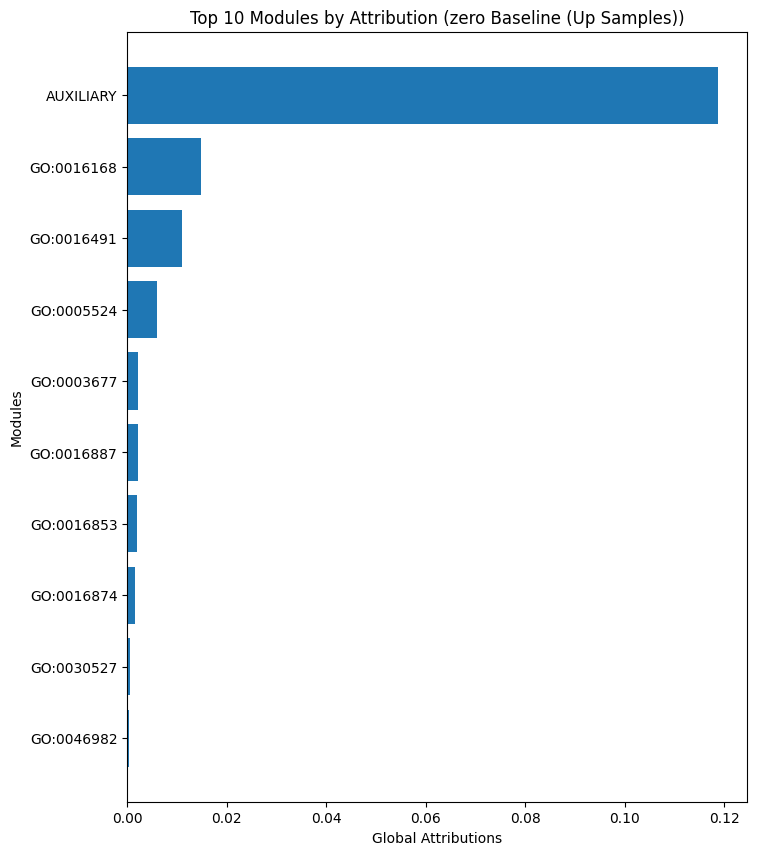

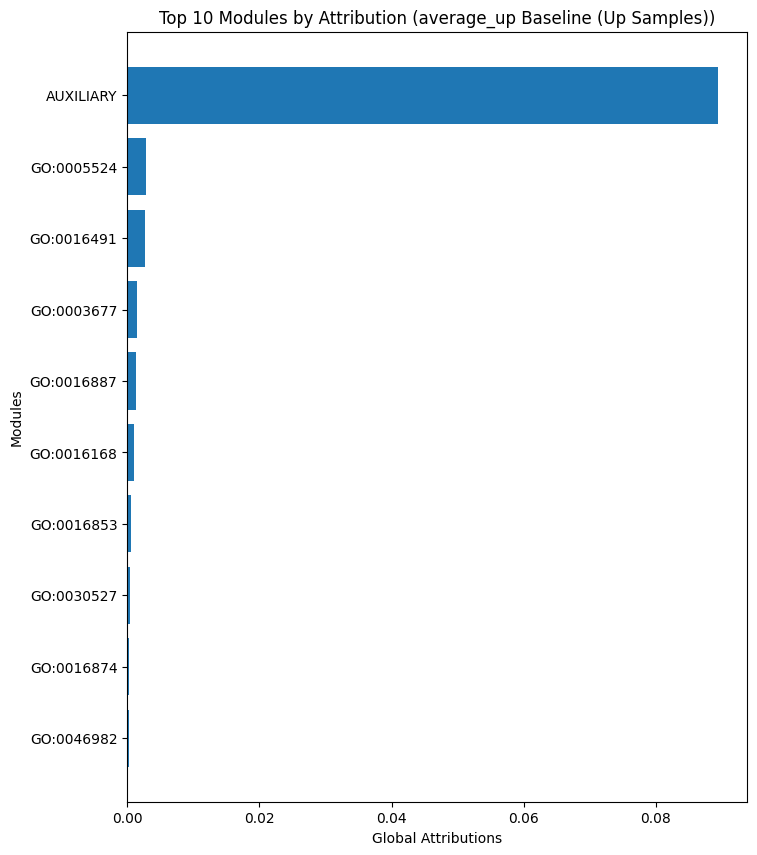

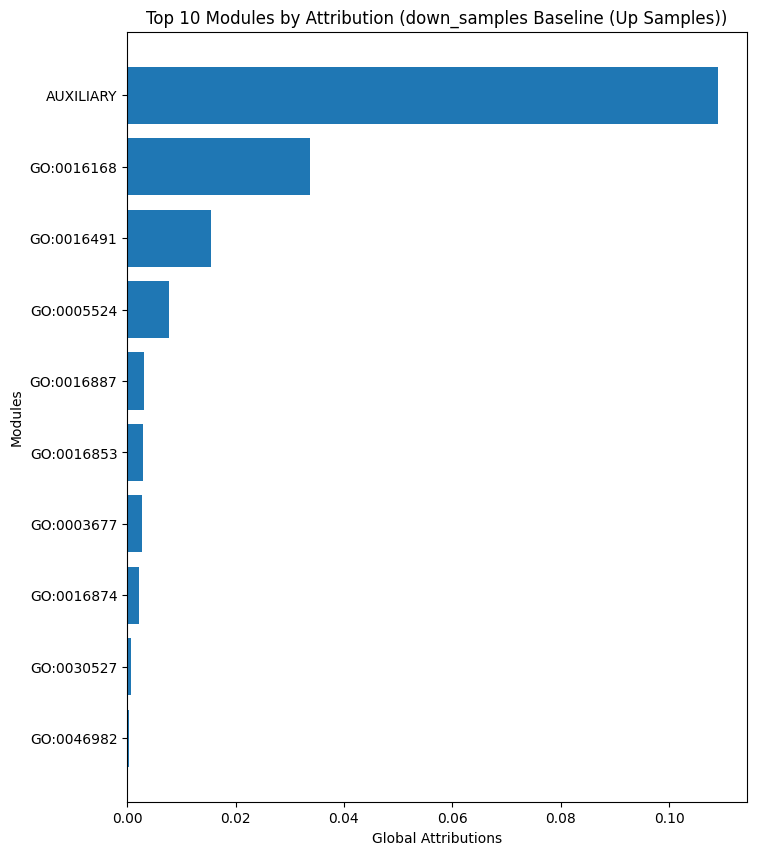

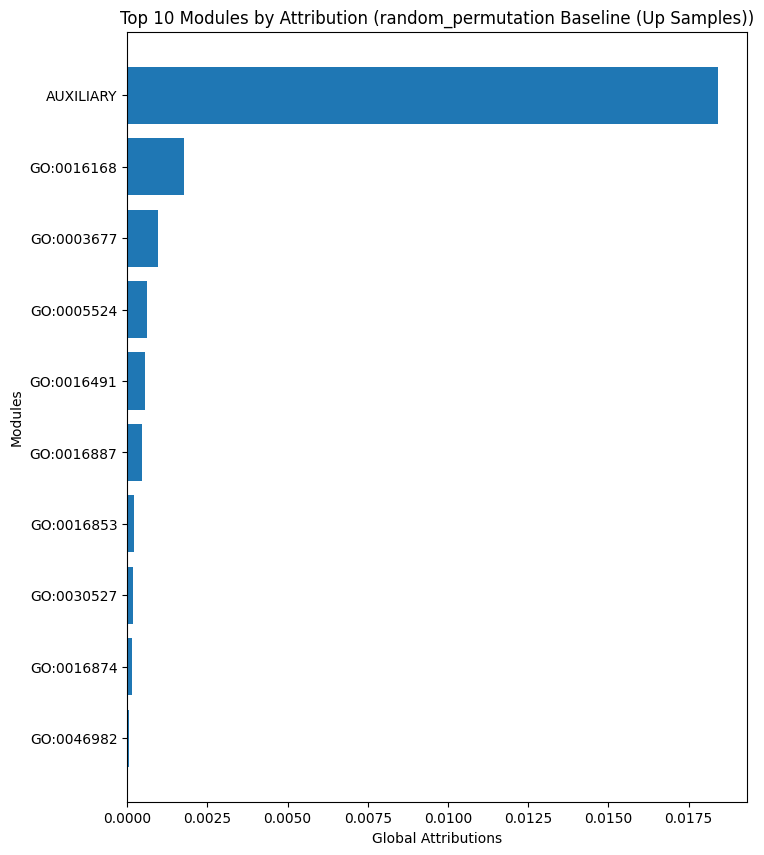

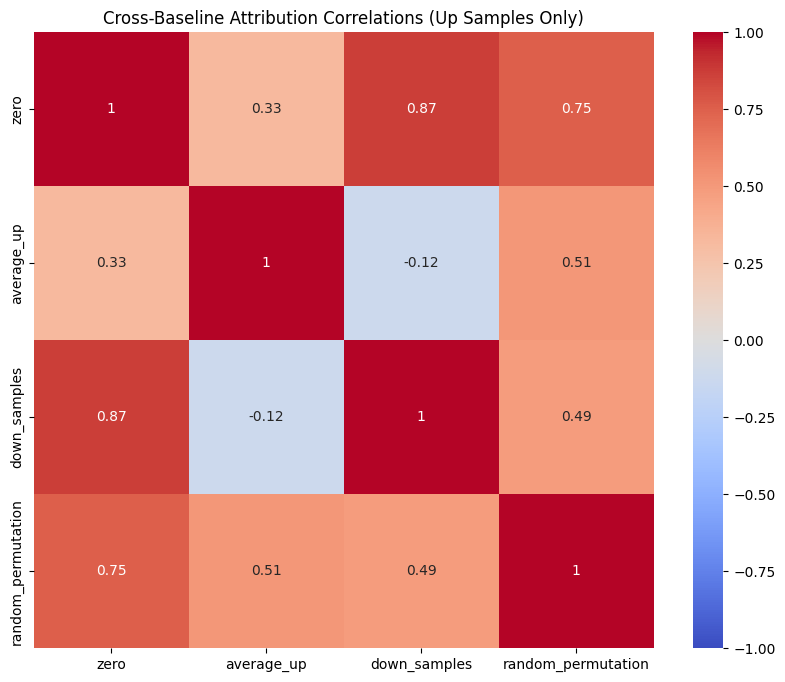

<Figure size 1200x1000 with 0 Axes>

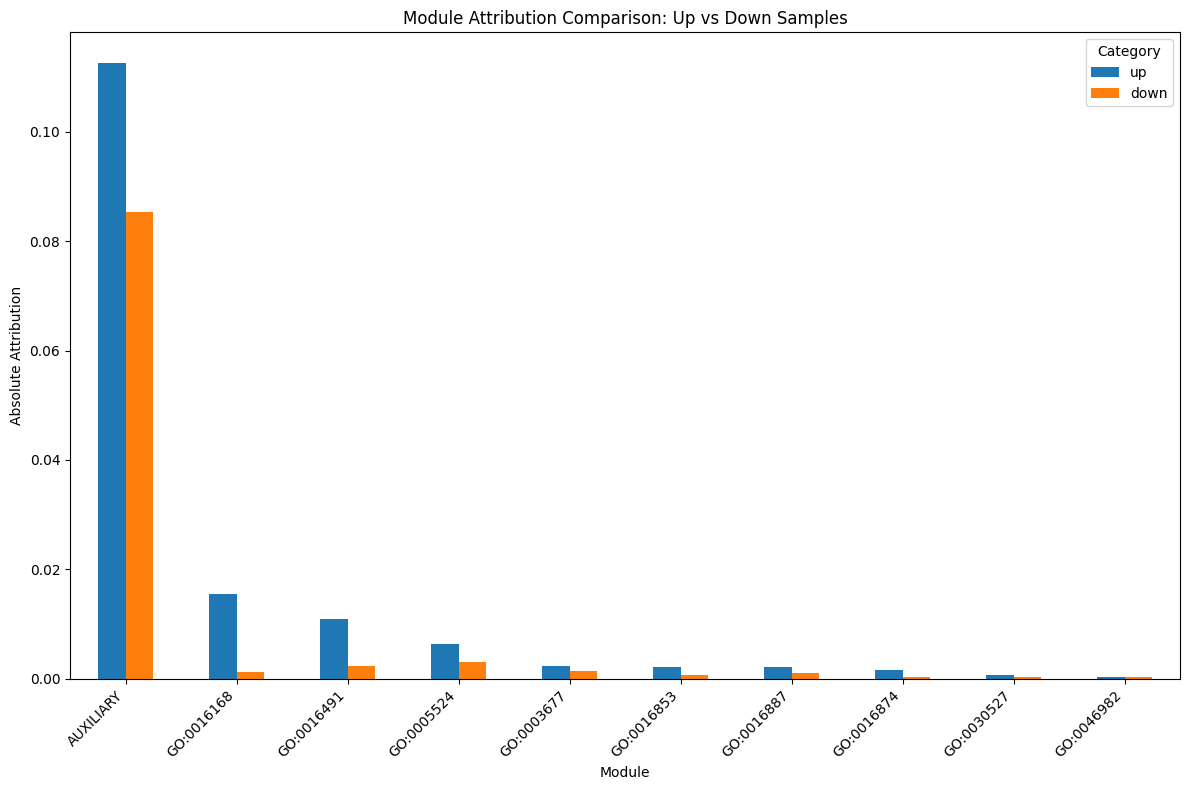

In [19]:
# Configurations
plot_top_mod = membership_mask.shape[1] + 1  # Top modules to plot (+1 for AUXILIARY)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()

# Get all data
combined_X = np.vstack([train_dataset.X.numpy(), val_dataset.X.numpy()])
combined_c = np.vstack([train_dataset.c.numpy(), val_dataset.c.numpy()])
combined_labels = np.concatenate([train_dataset.labels.numpy(), val_dataset.labels.numpy()])

# Filter data to get only "up" and "down" samples
up_indices = combined_labels == 1
down_indices = combined_labels == 0
neutral_indices = combined_labels == 0.5

print(f"Total samples: {len(combined_labels)}")
print(f"Up samples: {np.sum(up_indices)}")
print(f"Down samples: {np.sum(down_indices)}")
print(f"Neutral samples: {np.sum(neutral_indices)}")

# Get up and down samples
up_X = combined_X[up_indices]
up_c = combined_c[up_indices]
down_X = combined_X[down_indices]
down_c = combined_c[down_indices]

# Convert to tensors and send to device
up_X_tensor = torch.tensor(up_X, dtype=torch.float32).to(device)
up_c_tensor = torch.tensor(up_c, dtype=torch.float32).to(device)
down_X_tensor = torch.tensor(down_X, dtype=torch.float32).to(device)
down_c_tensor = torch.tensor(down_c, dtype=torch.float32).to(device)

# Forward pass to get latent space representation (z) for up samples
outs_up = pmvae.model(up_X_tensor, up_c_tensor)
up_latent_z = outs_up.z

# Forward pass for down samples (for comparison baseline)
outs_down = pmvae.model(down_X_tensor, down_c_tensor)
down_latent_z = outs_down.z

# Prepare explicand for up samples
up_explicand = torch.cat([up_latent_z, up_c_tensor], dim=1)

# Define multiple baselines specific to up samples
baselines = {
    "zero": torch.zeros_like(up_explicand).to(device),
    "average_up": torch.mean(up_explicand, dim=0, keepdim=True).expand_as(up_explicand),
    "down_samples": torch.mean(
        torch.cat([down_latent_z, down_c_tensor], dim=1),
        dim=0,
        keepdim=True
    ).expand_as(up_explicand),
    "random_permutation": torch.cat([
        up_explicand.detach()[:, i][torch.randperm(up_explicand.shape[0], device=device)].unsqueeze(1)
        for i in range(up_explicand.shape[1])
    ], dim=1)
}

latent_dim = up_latent_z.shape[1]
num_conditions = up_c_tensor.shape[1]
latent_names = pmvae.latent_space_names()
condition_names = [f'condition_{i}' for i in range(num_conditions)]

# Wrap model loss for PathExplainer for up samples
def model_loss_wrapper(z):
    module_outputs = pmvae.model.decoder_net(z)
    global_recon = pmvae.model.merge(module_outputs)
    return F.mse_loss(global_recon, up_X_tensor, reduction='none').mean(1).view(-1, 1)

explainer_modules = PathExplainerTorch(model_loss_wrapper)

# Modified function to store attributions
attribution_store = {}

def run_and_plot_explainer(baseline_name, baseline):
    attributions_modules = explainer_modules.attributions(
        up_explicand,
        baseline=baseline,
        num_samples=200,
        use_expectation=True
    )

    np_attribs = attributions_modules.detach().cpu().numpy()
    module_attribs = np_attribs[:, :latent_dim]
    module_attribs_mean = module_attribs.mean(axis=0)

    # Store for comparison
    attribution_store[baseline_name] = module_attribs_mean

    top_modules_df = pd.DataFrame({
        'global_attribs': module_attribs_mean
    }, index=latent_names)

    top_modules_df.index = top_modules_df.index.map(lambda x: re.sub(r"-\d+$", "", x))
    top_modules_grouped = top_modules_df.groupby(top_modules_df.index).mean()

    plot_top_modules(top_modules_grouped, f"{baseline_name} Baseline (Up Samples)")

# Plot top modules
def plot_top_modules(top_modules_grouped, title_suffix):
    top_x_modules = np.abs(top_modules_grouped).sort_values('global_attribs', ascending=False).iloc[:20]
    plt.figure(figsize=(8, 10))
    plt.barh(top_x_modules.index, top_x_modules['global_attribs'])
    plt.xlabel('Global Attributions')
    plt.ylabel('Modules')
    plt.title(f'Top {plot_top_mod} Modules by Attribution ({title_suffix})')
    plt.gca().invert_yaxis()
    plt.show()

# Run and plot for each baseline
for baseline_name, baseline in baselines.items():
    run_and_plot_explainer(baseline_name, baseline)

# Compare baseline correlations
correlation_matrix = pd.DataFrame({
    baseline: attribution_store[baseline]
    for baseline in baselines.keys()
}).corr(method='pearson')

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Cross-Baseline Attribution Correlations (Up Samples Only)")
plt.show()

# Compare attributions between up and down samples
category_attributions = {}

# Process each category separately to compare
for category, cat_X_tensor, cat_c_tensor in [
    ("up", up_X_tensor, up_c_tensor),
    ("down", down_X_tensor, down_c_tensor)
]:
    # Forward pass
    cat_outs = pmvae.model(cat_X_tensor, cat_c_tensor)
    cat_z = cat_outs.z

    cat_explicand = torch.cat([cat_z, cat_c_tensor], dim=1)

    # Define category loss wrapper
    def cat_loss_wrapper(z):
        module_outputs = pmvae.model.decoder_net(z)
        global_recon = pmvae.model.merge(module_outputs)
        return F.mse_loss(global_recon, cat_X_tensor, reduction='none').mean(1).view(-1, 1)

    cat_explainer = PathExplainerTorch(cat_loss_wrapper)

    # Get attributions with zero baseline
    cat_attributions = cat_explainer.attributions(
        cat_explicand,
        baseline=torch.zeros_like(cat_explicand).to(device),
        num_samples=200,
        use_expectation=True
    )

    # Process and store
    cat_np_attribs = cat_attributions.detach().cpu().numpy()
    cat_module_attribs = cat_np_attribs[:, :latent_dim]
    cat_module_attribs_mean = cat_module_attribs.mean(axis=0)

    category_attributions[category] = cat_module_attribs_mean

# Compare attributions across categories
if len(category_attributions) > 1:
    # Create comparison dataframe
    comparison_df = pd.DataFrame({
        cat: attrs for cat, attrs in category_attributions.items()
    }, index=latent_names)

    # Clean up module names
    comparison_df.index = comparison_df.index.map(lambda x: re.sub(r"-\d+$", "", x))
    comparison_grouped = comparison_df.groupby(comparison_df.index).mean()

    # Plot comparison
    plt.figure(figsize=(12, 10))
    comparison_grouped.abs().sort_values(by='up', ascending=False).head(20).plot(kind='bar', figsize=(12, 8))
    plt.title('Module Attribution Comparison: Up vs Down Samples')
    plt.ylabel('Absolute Attribution')
    plt.xlabel('Module')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Category')
    plt.tight_layout()
    plt.show()


Top genes contributing to 'up' samples relative to 'down': ['Phatr3_EG00468', 'Phatr3_EG00411', 'Phatr3_EG00470', 'Phatr3_EG00471', 'Phatr3_EG00553', 'Phatr3_EG00539', 'Phatr3_EG00540', 'Phatr3_EG00404', 'Phatr3_EG00526', 'Phatr3_EG00543', 'Phatr3_EG00544', 'Phatr3_EG00545', 'Phatr3_EG00547', 'Phatr3_EG00417', 'Phatr3_EG00549', 'Phatr3_EG00550', 'Phatr3_EG00551', 'Phatr3_EG00552', 'Phatr3_EG00541', 'Fucoxanthin chlorophyll a/c protein, deviant', 'Phatr3_EG00554', 'Phatr3_EG00555', 'Phatr3_EG00556', 'Phatr3_EG00557', 'Phatr3_EG00558', 'Phatr3_EG00559', 'Phatr3_EG00560', 'Phatr3_EG00561', 'Phatr3_EG00562', 'Phatr3_EG00563', 'Phatr3_EG00564', 'Phatr3_EG00565', 'Phatr3_EG00538', 'Phatr3_EG00536', 'Phatr3_EG00407', 'Phatr3_EG00535', 'Phatr3_EG00534', 'Phatr3_EG00533', 'Phatr3_EG00408', 'Phatr3_EG00532', 'Phatr3_EG00405', 'Phatr3_EG00531', 'Phatr3_EG00530', 'Phatr3_EG00528', 'Phatr3_EG00527', 'Phatr3_EG00537', 'Phatr3_EG01071', 'Phatr3_EG01375', 'Phatr3_EG01180', 'Phatr3_EG00389', 'Phatr3_EG

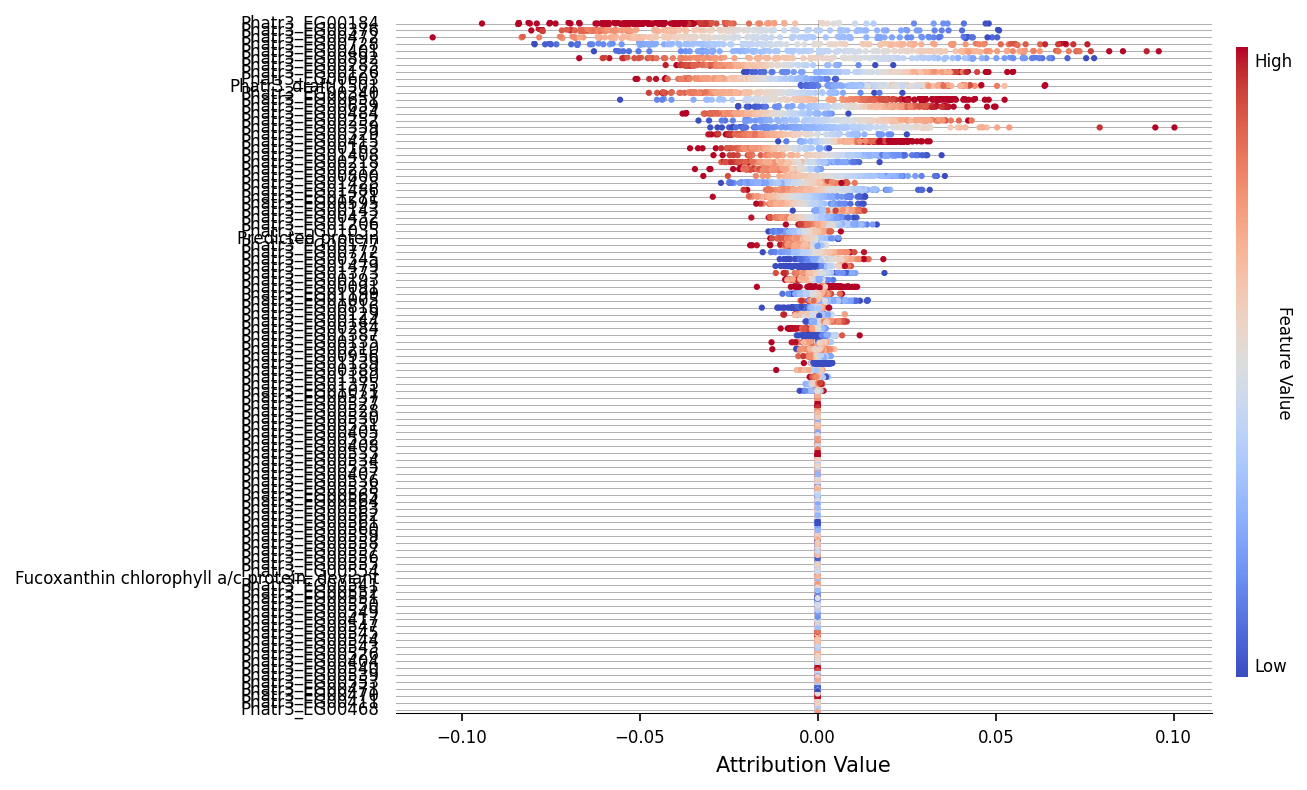

In [33]:
# Configurations
plot_top_mod = membership_mask.shape[1] + 1  # Top modules to plot (+1 for AUXILIARY)

# Select a pathway/module by description
target_pathway_description = 'GO:0016491'

top_n_genes = 100

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()

# Forward passes with proper conditioning
with torch.no_grad():
    outs_up = pmvae.model(up_X_tensor, up_c_tensor)
    outs_down = pmvae.model(down_X_tensor, down_c_tensor)

# Prepare explicand and baseline with matching dimensions
up_explicand = up_X_tensor.clone().requires_grad_(True)
baseline_down = down_X_tensor.mean(dim=0, keepdim=True).expand_as(up_explicand)

# Get target indices for AUXILIARY pathway
latent_names =  pmvae.latent_space_names()
target_indices = [i for i, name in enumerate(latent_names) if target_pathway_description in name]

# Corrected model wrapper using batch-aligned conditions
def model_latent_wrapper(x):
    # Create matching condition tensor for current batch
    batch_size = x.shape[0]
    c_batch = up_c_tensor[:batch_size]  # Align with current batch size
    return pmvae.model(x, c_batch).mu[:, target_indices].mean(1).view(-1, 1)


# Prepare explicand for up samples and baseline using down samples
up_explicand = up_X_tensor.clone().detach().requires_grad_(True)  # Use only gene expression data for explicand
baseline_down_samples = torch.mean(down_X_tensor, dim=0, keepdim=True).expand_as(up_explicand).clone().detach().requires_grad_(True)

# Initialize PathExplainer
explainer = PathExplainerTorch(model_latent_wrapper)

# Compute attributions for "up" samples using "down" baseline
attributions_up_vs_down = explainer.attributions(
    up_explicand,
    baseline=baseline_down_samples,
    num_samples=500,
    use_expectation=True
)

# Convert attributions to numpy
np_attribs_up_vs_down = attributions_up_vs_down.detach().cpu().numpy()
input_data_np_up_vs_down = up_explicand.detach().cpu().numpy()

# Get top most important genes based on attribution scores
top_indices_up_vs_down = np.argsort(np.abs(np_attribs_up_vs_down).mean(axis=0))[-top_n_genes:]
descriptions_with_fallback_up_vs_down = [
    desc if desc != '' else gene_id for desc, gene_id in zip(gene_descriptions, final_genes)
]
top_gene_names_up_vs_down = [descriptions_with_fallback_up_vs_down[i] for i in top_indices_up_vs_down]

# Summary plot for the top genes contributing to "up" samples relative to "down"
summary_plot(
    np_attribs_up_vs_down[:, top_indices_up_vs_down],
    input_data_np_up_vs_down[:, top_indices_up_vs_down],
    feature_names=top_gene_names_up_vs_down,
    plot_top_k=top_n_genes,
    standardize_features=False,
    scale_x_ind=False,
    scale_y_ind=False,
    figsize=(8, 6),
    dpi=150,
    cmap='coolwarm'
)

print(f"Top genes contributing to 'up' samples relative to 'down': {top_gene_names_up_vs_down}")

# ...

## Functional Prediction